In [1]:
# Initialize a new VAME project
import vame
import functions_bondjango as bd
# import functions_vame as fv
import paths
import random
import os
import shutil

Using CUDA
GPU active: True
GPU used: GeForce RTX 2080 Ti


In [2]:
# Manually define the config path if project has already been created
config = r"D:\VAME_projects\VAME_prey_5-Apr21-2021\config.yaml"

In [3]:
# get the file paths

# define the number of files to use
number_files = 0
# define the search string
search_string = ['rig:miniscope, result:succ', 'rig:miniscope, result:fail']

# define the target model
target_model = 'video_experiment'

# allocate memory for the files
files = []

# for all the queries
for query in search_string:
    # get the queryset
    files.append(bd.query_database(target_model, query))

# concatenate the list
files = [item for sublist in files for item in sublist]

if number_files > 0:
    # pick a random subset of number_files
    files = random.sample(files, number_files)

# get the video paths in a list
video_paths = [el['avi_path'] for el in files]

# define the working directory
working_directory = paths.vame_path

In [4]:
print(files[0]['preproc_files'][0])

dlc_path = files[0]['avi_path']
dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')
print(dlc_path)

04_02_2021_10_34_47_miniscope_dg_210202_a_succ_preprocessing
J:\Drago Guggiana Nilo\Prey_capture\AnalyzedData\04_02_2021_10_34_47_miniscope_DG_210202_a_succ_preproc.hdf5


In [4]:
# initialize the project
config = vame.init_new_project(project='VAME_prey_5', videos=video_paths, working_directory=working_directory, videotype='.avi')

Created "D:\VAME_projects\VAME_prey_5-Apr21-2021\videos"
Created "D:\VAME_projects\VAME_prey_5-Apr21-2021\data"
Created "D:\VAME_projects\VAME_prey_5-Apr21-2021\results"
Created "D:\VAME_projects\VAME_prey_5-Apr21-2021\model"
Copying the videos 

A VAME project has been created. 

Now its time to prepare your data for VAME. The first step is to move your pose .csv file (e.g. DeepLabCut .csv) into the //YOUR//VAME//PROJECT//videos//pose_estimation folder. From here you can call either the function vame.egocentric_alignment() or if your data is by design egocentric call vame.csv_to_numpy(). This will prepare the data in .csv into the right format to start working with VAME.


In [ ]:
# Align video trajectories

# get the project folder
project_folder, _ = os.path.split(config)

# for all the videos
for el in files[:1]:
    print(f'Current file: {el["slug"]}')
    
    # if there is no preprocessing file, skip and warn
    if len(el['preproc_files']) == 0:
        print('no preprocessing file found')
        continue
    # load the avi file path
    dlc_path = el['avi_path']
    # edit it for the preprocessing path
    dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
    dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
    dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')

    # define the cropping
    crop_size = (1, 1)
    # egocentrically align the data and save
    fv.run_alignment(dlc_path, project_folder, '.avi', crop_size)

In [25]:
# Create the training set

vame.create_trainset(config)

Creating training dataset...
Using robust setting to eliminate outliers! IQR factor: 4
z-scoring of file 08_29_2020_16_17_59_miniscope_DG_200701_a_succ
IQR value: 0.41, IQR cutoff: 1.66
z-scoring of file 08_29_2020_16_15_31_miniscope_DG_200701_a_succ
IQR value: 0.48, IQR cutoff: 1.91
z-scoring of file 08_29_2020_16_12_42_miniscope_DG_200701_a_succ
IQR value: 0.72, IQR cutoff: 2.87
z-scoring of file 08_29_2020_16_08_29_miniscope_DG_200701_a_succ
IQR value: 0.68, IQR cutoff: 2.74
z-scoring of file 08_29_2020_16_04_30_miniscope_DG_200701_a_succ
IQR value: 0.54, IQR cutoff: 2.16
z-scoring of file 08_29_2020_16_01_17_miniscope_DG_200701_a_succ
IQR value: 0.63, IQR cutoff: 2.53
z-scoring of file 08_29_2020_15_58_33_miniscope_DG_200701_a_succ
IQR value: 0.37, IQR cutoff: 1.48
z-scoring of file 08_29_2020_15_55_24_miniscope_DG_200701_a_succ
IQR value: 0.52, IQR cutoff: 2.10
z-scoring of file 08_21_2020_16_33_02_miniscope_DG_200617_b_succ
IQR value: 0.87, IQR cutoff: 3.47
z-scoring of file 08_2

z-scoring of file 08_17_2020_15_50_49_miniscope_DG_200701_a_succ_injured
IQR value: 1.03, IQR cutoff: 4.13
z-scoring of file 08_17_2020_15_47_55_miniscope_DG_200701_a_succ
IQR value: 0.72, IQR cutoff: 2.88
z-scoring of file 08_17_2020_15_45_26_miniscope_DG_200701_a_succ
IQR value: 0.38, IQR cutoff: 1.50
z-scoring of file 08_17_2020_15_43_31_miniscope_DG_200701_a_succ
IQR value: 0.46, IQR cutoff: 1.84
z-scoring of file 08_17_2020_15_40_54_miniscope_DG_200701_a_succ
IQR value: 0.37, IQR cutoff: 1.48
z-scoring of file 08_17_2020_15_38_44_miniscope_DG_200701_a_succ
IQR value: 0.41, IQR cutoff: 1.63
z-scoring of file 08_17_2020_15_36_48_miniscope_DG_200701_a_succ
IQR value: 0.40, IQR cutoff: 1.59
z-scoring of file 08_17_2020_15_34_07_miniscope_DG_200701_a_succ_injured
IQR value: 0.61, IQR cutoff: 2.46
z-scoring of file 08_16_2020_16_27_15_miniscope_DG_200617_b_succ
IQR value: 0.67, IQR cutoff: 2.67
z-scoring of file 08_16_2020_16_23_16_miniscope_DG_200617_b_succ_injured
IQR value: 0.84, IQR

z-scoring of file 08_12_2020_15_44_23_miniscope_DG_200701_a_succ_noncon
IQR value: 0.41, IQR cutoff: 1.66
z-scoring of file 08_12_2020_15_39_17_miniscope_DG_200701_a_succ
IQR value: 0.48, IQR cutoff: 1.93
z-scoring of file 08_12_2020_15_35_36_miniscope_DG_200701_a_succ
IQR value: 0.51, IQR cutoff: 2.03
z-scoring of file 08_12_2020_15_32_21_miniscope_DG_200701_a_succ_injured
IQR value: 0.48, IQR cutoff: 1.92
z-scoring of file 08_12_2020_15_29_25_miniscope_DG_200701_a_succ
IQR value: 0.45, IQR cutoff: 1.78
z-scoring of file 08_11_2020_16_10_57_miniscope_DG_200617_b_succ
IQR value: 0.39, IQR cutoff: 1.57
z-scoring of file 08_11_2020_16_06_06_miniscope_DG_200617_b_succ
IQR value: 0.53, IQR cutoff: 2.14
z-scoring of file 08_11_2020_16_03_21_miniscope_DG_200617_b_succ
IQR value: 0.74, IQR cutoff: 2.94
z-scoring of file 08_11_2020_16_00_10_miniscope_DG_200617_b_succ
IQR value: 0.64, IQR cutoff: 2.58
z-scoring of file 08_11_2020_15_56_40_miniscope_DG_200617_b_succ
IQR value: 0.37, IQR cutoff: 

z-scoring of file 08_07_2020_16_08_55_miniscope_DG_200701_a_succ
IQR value: 0.34, IQR cutoff: 1.38
z-scoring of file 08_07_2020_16_05_16_miniscope_DG_200701_a_succ
IQR value: 0.32, IQR cutoff: 1.28
z-scoring of file 08_07_2020_16_01_27_miniscope_DG_200701_a_succ
IQR value: 0.40, IQR cutoff: 1.59
z-scoring of file 08_06_2020_18_53_34_miniscope_DG_200617_b_succ
IQR value: 0.37, IQR cutoff: 1.49
z-scoring of file 08_06_2020_18_50_24_miniscope_DG_200617_b_succ
IQR value: 1.05, IQR cutoff: 4.19
z-scoring of file 08_06_2020_18_46_29_miniscope_DG_200617_b_succ
IQR value: 0.41, IQR cutoff: 1.65
z-scoring of file 08_06_2020_18_42_09_miniscope_DG_200617_b_succ
IQR value: 0.60, IQR cutoff: 2.40
z-scoring of file 08_06_2020_18_35_22_miniscope_DG_200617_b_succ
IQR value: 0.30, IQR cutoff: 1.21
z-scoring of file 08_06_2020_18_30_31_miniscope_DG_200617_b_succ
IQR value: 0.51, IQR cutoff: 2.05
z-scoring of file 08_06_2020_18_24_41_miniscope_DG_200617_b_succ
IQR value: 0.40, IQR cutoff: 1.61
z-scoring 

IQR value: 0.42, IQR cutoff: 1.67
z-scoring of file 03_02_2020_15_45_20_miniscope_MM_200129_a_succ_nomini
IQR value: 0.55, IQR cutoff: 2.21
z-scoring of file 03_02_2020_15_41_21_miniscope_MM_200129_a_succ_nomini
IQR value: 0.28, IQR cutoff: 1.12
z-scoring of file 03_02_2020_15_35_18_miniscope_MM_200129_a_succ_nomini
IQR value: 0.29, IQR cutoff: 1.16
z-scoring of file 12_16_2019_16_31_08_miniscope_MM_191108_a_succ
IQR value: 0.42, IQR cutoff: 1.69
z-scoring of file 12_16_2019_16_27_17_miniscope_MM_191108_a_succ
IQR value: 0.48, IQR cutoff: 1.94
z-scoring of file 12_12_2019_15_32_29_miniscope_MM_191108_a_succ
IQR value: 0.40, IQR cutoff: 1.59
z-scoring of file 12_12_2019_15_27_48_miniscope_MM_191108_a_succ
IQR value: 0.36, IQR cutoff: 1.42
z-scoring of file 12_12_2019_15_16_04_miniscope_MM_191108_a_succ
IQR value: 0.47, IQR cutoff: 1.88
z-scoring of file 12_12_2019_15_08_15_miniscope_MM_191108_a_succ
IQR value: 0.35, IQR cutoff: 1.38
z-scoring of file 12_12_2019_15_04_45_miniscope_MM_191

z-scoring of file 12_04_2019_16_44_23_miniscope_MM_191105_a_succ_nomini
IQR value: 0.43, IQR cutoff: 1.72
z-scoring of file 12_04_2019_16_39_29_miniscope_MM_191105_a_succ_nomini
IQR value: 0.55, IQR cutoff: 2.19
z-scoring of file 12_04_2019_16_27_21_miniscope_MM_191108_a_succ_nomini
IQR value: 0.31, IQR cutoff: 1.23
z-scoring of file 12_04_2019_16_18_37_miniscope_MM_191108_a_succ_nomini
IQR value: 0.31, IQR cutoff: 1.23
z-scoring of file 12_04_2019_16_13_30_miniscope_MM_191108_a_succ_nomini
IQR value: 0.40, IQR cutoff: 1.58
z-scoring of file 12_04_2019_16_07_38_miniscope_MM_191108_a_succ_nomini
IQR value: 0.34, IQR cutoff: 1.37
z-scoring of file 12_04_2019_16_01_30_miniscope_MM_191107_a_succ_nomini
IQR value: 0.39, IQR cutoff: 1.56
z-scoring of file 12_04_2019_15_56_34_miniscope_MM_191107_a_succ_nomini
IQR value: 0.37, IQR cutoff: 1.46
z-scoring of file 12_04_2019_15_52_05_miniscope_MM_191107_a_succ_nomini
IQR value: 0.44, IQR cutoff: 1.75
z-scoring of file 12_04_2019_15_45_59_miniscop

z-scoring of file 12_10_2019_15_43_20_miniscope_MM_191108_a_fail
IQR value: 0.31, IQR cutoff: 1.23
z-scoring of file 12_10_2019_15_23_16_miniscope_MM_191108_a_fail
IQR value: 0.33, IQR cutoff: 1.31
z-scoring of file 12_07_2019_15_56_10_miniscope_MM_191108_a_fail
IQR value: 0.30, IQR cutoff: 1.20
z-scoring of file 12_03_2019_16_42_00_miniscope_MM_191108_a_fail_nomini
IQR value: 0.22, IQR cutoff: 0.90
z-scoring of file 12_03_2019_16_34_28_miniscope_MM_191108_a_fail_nomini
IQR value: 0.24, IQR cutoff: 0.98
z-scoring of file 12_03_2019_16_20_45_miniscope_MM_191106_a_fail_nomini
IQR value: 0.29, IQR cutoff: 1.15
z-scoring of file 12_03_2019_15_38_58_miniscope_MM_191106_a_fail_nomini
IQR value: 0.31, IQR cutoff: 1.23
z-scoring of file 12_03_2019_15_31_21_miniscope_MM_191106_a_fail_nomini
IQR value: 0.27, IQR cutoff: 1.09
z-scoring of file 12_03_2019_15_00_53_miniscope_MM_191105_a_fail_nomini
IQR value: 0.24, IQR cutoff: 0.96
z-scoring of file 12_02_2019_17_52_21_miniscope_MM_191108_a_fail_no

In [7]:
# Train the network

# remember to set the parameters in the bonfig.yaml

vame.train_model(config)

Train Variational Autoencoder - model name: VAME_prey_5_model 

Using CUDA
GPU active: True
GPU used:  GeForce RTX 2080 Ti
Latent Dimensions: 30, Time window: 30, Batch Size: 256, Beta: 1, lr: 0.0005

Compute mean and std for temporal dataset.
Initialize train data. Datapoints 537481
Initialize test data. Datapoints 59720
Scheduler step size: 100, Scheduler gamma: 0.20

Start training... 
Epoch: 1
Train loss: 88103.898, MSE-Loss: 35596.818, MSE-Future-Loss 52507.080, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 8448.099, MSE-Loss: 8448.099, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 2
Train loss: 68572.960, MSE-Loss: 18093.136, MSE-Future-Loss 50479.824, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 7261.195, MSE-Loss: 7261.195, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 3
Train loss: 66045.968, MSE-Loss: 16347.009, MSE-Future-Loss 49696.183, KL-Loss: 1.958, Kmeans-Loss: 0.818, weight: 0.25
Test loss: 7044.402, MSE-Loss: 7041.577, KL-Loss: 1.950, Kmeans-L

Test loss: 6292.565, MSE-Loss: 6282.082, KL-Loss: 7.017, Kmeans-Loss: 3.466


Epoch: 38
Train loss: 38054.500, MSE-Loss: 11368.643, MSE-Future-Loss 26675.753, KL-Loss: 6.764, Kmeans-Loss: 3.340, weight: 1.00
Test loss: 6203.542, MSE-Loss: 6193.113, KL-Loss: 6.997, Kmeans-Loss: 3.432


Epoch: 39
Train loss: 37646.345, MSE-Loss: 11285.171, MSE-Future-Loss 26351.081, KL-Loss: 6.765, Kmeans-Loss: 3.329, weight: 1.00
Test loss: 6194.174, MSE-Loss: 6183.758, KL-Loss: 6.983, Kmeans-Loss: 3.433


Epoch: 40
Train loss: 37566.993, MSE-Loss: 11318.196, MSE-Future-Loss 26238.722, KL-Loss: 6.752, Kmeans-Loss: 3.323, weight: 1.00
Test loss: 6123.528, MSE-Loss: 6113.132, KL-Loss: 6.977, Kmeans-Loss: 3.419


Epoch: 41
Train loss: 37302.237, MSE-Loss: 11268.000, MSE-Future-Loss 26024.156, KL-Loss: 6.760, Kmeans-Loss: 3.322, weight: 1.00
Test loss: 6102.763, MSE-Loss: 6092.337, KL-Loss: 7.012, Kmeans-Loss: 3.414


Epoch: 42
Train loss: 37016.103, MSE-Loss: 11219.582, MSE-Future-Loss 25786.432, KL-Loss: 

Train loss: 31637.914, MSE-Loss: 10103.253, MSE-Future-Loss 21524.743, KL-Loss: 6.769, Kmeans-Loss: 3.149, weight: 1.00
Test loss: 6206.340, MSE-Loss: 6196.110, KL-Loss: 7.005, Kmeans-Loss: 3.226


Epoch: 78
Train loss: 31468.549, MSE-Loss: 10066.432, MSE-Future-Loss 21392.204, KL-Loss: 6.757, Kmeans-Loss: 3.156, weight: 1.00
Test loss: 6159.807, MSE-Loss: 6149.599, KL-Loss: 6.981, Kmeans-Loss: 3.227


Epoch: 79
Train loss: 31608.035, MSE-Loss: 10137.698, MSE-Future-Loss 21460.426, KL-Loss: 6.754, Kmeans-Loss: 3.156, weight: 1.00
Test loss: 6212.301, MSE-Loss: 6202.078, KL-Loss: 6.981, Kmeans-Loss: 3.242


Epoch: 80
Train loss: 31493.199, MSE-Loss: 10135.240, MSE-Future-Loss 21348.031, KL-Loss: 6.778, Kmeans-Loss: 3.151, weight: 1.00
Test loss: 6158.192, MSE-Loss: 6147.916, KL-Loss: 7.045, Kmeans-Loss: 3.231


Epoch: 81
Train loss: 31226.617, MSE-Loss: 10008.606, MSE-Future-Loss 21208.081, KL-Loss: 6.784, Kmeans-Loss: 3.146, weight: 1.00
Test loss: 6095.350, MSE-Loss: 6085.109, KL-Loss

Using CUDA
GPU active: True
GPU used: GeForce RTX 2080 Ti


Evaluation of VAME_prey_5_model model. 

Initialize test data. Datapoints 53105
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.behavior_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


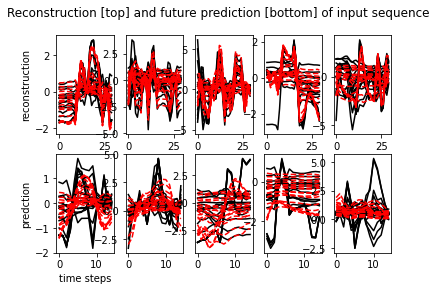

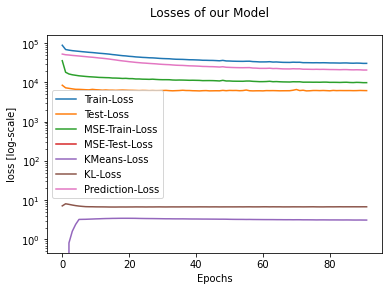

In [26]:
# Evaluate the network

vame.evaluate_model(config)

In [45]:
# Segment behavior

# vame.behavior_segmentation(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=[30])
vame.pose_segmentation(config)

  7%|██████████████▌                                                                                                                                                                                      | 43/580 [00:00<00:01, 410.63it/s]

Pose segmentation for VAME model: VAME_prey_5_model 

Using CUDA
GPU active: True
GPU used: GeForce RTX 2080 Ti
Load model... 
Embedd latent vector for file 04_02_2021_10_34_47_miniscope_DG_210202_a_succ


  7%|██████████████▎                                                                                                                                                                                      | 46/632 [00:00<00:01, 456.62it/s]

Embedd latent vector for file 04_02_2021_10_30_38_miniscope_DG_210202_a_succ


 20%|██████████████████████████████████████▋                                                                                                                                                              | 52/265 [00:00<00:00, 511.17it/s]

Embedd latent vector for file 04_02_2021_10_25_41_miniscope_DG_210202_a_succ


  8%|████████████████                                                                                                                                                                                     | 42/515 [00:00<00:01, 408.86it/s]

Embedd latent vector for file 04_02_2021_10_21_22_miniscope_DG_210202_a_succ


  7%|█████████████▎                                                                                                                                                                                       | 48/708 [00:00<00:01, 471.85it/s]

Embedd latent vector for file 04_02_2021_10_16_10_miniscope_DG_210202_a_succ


  4%|███████▋                                                                                                                                                                                            | 58/1480 [00:00<00:02, 570.15it/s]

Embedd latent vector for file 04_02_2021_10_10_35_miniscope_DG_210202_a_succ


 29%|████████████████████████████████████████████████████████▉                                                                                                                                            | 46/159 [00:00<00:00, 456.66it/s]

Embedd latent vector for file 04_02_2021_10_06_47_miniscope_DG_210202_a_succ


 51%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 119/235 [00:00<00:00, 589.16it/s]

Embedd latent vector for file 04_02_2021_10_03_36_miniscope_DG_210202_a_succ


  9%|██████████████████▋                                                                                                                                                                                  | 46/485 [00:00<00:00, 456.67it/s]

Embedd latent vector for file 04_01_2021_09_59_45_miniscope_DG_210202_a_succ_injured


 19%|█████████████████████████████████████▊                                                                                                                                                               | 56/292 [00:00<00:00, 550.48it/s]

Embedd latent vector for file 04_01_2021_09_55_30_miniscope_DG_210202_a_succ


 11%|████████████████████▉                                                                                                                                                                                | 50/470 [00:00<00:00, 482.03it/s]

Embedd latent vector for file 04_01_2021_09_51_46_miniscope_DG_210202_a_succ


 12%|████████████████████████                                                                                                                                                                             | 55/451 [00:00<00:00, 546.00it/s]

Embedd latent vector for file 04_01_2021_09_47_53_miniscope_DG_210202_a_succ


  9%|█████████████████▋                                                                                                                                                                                   | 43/480 [00:00<00:01, 422.37it/s]

Embedd latent vector for file 04_01_2021_09_43_29_miniscope_DG_210202_a_succ


  4%|████████▎                                                                                                                                                                                           | 47/1106 [00:00<00:02, 466.59it/s]

Embedd latent vector for file 04_01_2021_09_38_38_miniscope_DG_210202_a_succ


 32%|██████████████████████████████████████████████████████████████▋                                                                                                                                      | 42/132 [00:00<00:00, 412.59it/s]

Embedd latent vector for file 04_01_2021_09_35_49_miniscope_DG_210202_a_succ


 12%|███████████████████████▎                                                                                                                                                                             | 55/464 [00:00<00:00, 546.02it/s]

Embedd latent vector for file 04_01_2021_09_31_49_miniscope_DG_210202_a_succ_grabbedcable


  9%|█████████████████▊                                                                                                                                                                                   | 44/486 [00:00<00:01, 436.82it/s]

Embedd latent vector for file 03_31_2021_09_49_31_miniscope_DG_210202_a_succ


 10%|████████████████████                                                                                                                                                                                 | 43/423 [00:00<00:00, 426.89it/s]

Embedd latent vector for file 03_31_2021_09_45_11_miniscope_DG_210202_a_succ


  0%|                                                                                                                                                                                                               | 0/189 [00:00<?, ?it/s]

Embedd latent vector for file 03_31_2021_09_38_46_miniscope_DG_210202_a_succ
Embedd latent vector for file 03_31_2021_09_35_52_miniscope_DG_210202_a_succ


  7%|████████████▉                                                                                                                                                                                        | 51/775 [00:00<00:01, 501.34it/s]

Embedd latent vector for file 03_31_2021_09_32_31_miniscope_DG_210202_a_succ


  8%|██████████████▉                                                                                                                                                                                      | 51/675 [00:00<00:01, 508.78it/s]

Embedd latent vector for file 03_31_2021_09_26_57_miniscope_DG_210202_a_succ


  7%|██████████████▋                                                                                                                                                                                      | 52/696 [00:00<00:01, 511.17it/s]

Embedd latent vector for file 03_31_2021_09_23_53_miniscope_DG_210202_a_succ


 12%|███████████████████████                                                                                                                                                                              | 58/495 [00:00<00:00, 575.79it/s]

Embedd latent vector for file 03_31_2021_09_19_18_miniscope_DG_210202_a_succ


  1%|██▊                                                                                                                                                                                                 | 42/2913 [00:00<00:06, 416.95it/s]

Embedd latent vector for file 03_30_2021_09_51_19_miniscope_DG_210202_a_succ


  2%|███▍                                                                                                                                                                                                | 34/1945 [00:00<00:05, 334.23it/s]

Embedd latent vector for file 03_30_2021_09_46_33_miniscope_DG_210202_a_succ_injured


  3%|████▉                                                                                                                                                                                               | 46/1804 [00:00<00:03, 456.67it/s]

Embedd latent vector for file 03_30_2021_09_41_12_miniscope_DG_210202_a_succ


  3%|██████▏                                                                                                                                                                                             | 38/1205 [00:00<00:03, 377.02it/s]

Embedd latent vector for file 03_30_2021_09_36_54_miniscope_DG_210202_a_succ


 24%|███████████████████████████████████████████████▋                                                                                                                                                     | 46/190 [00:00<00:00, 452.19it/s]

Embedd latent vector for file 03_30_2021_09_33_30_miniscope_DG_210202_a_succ_injured


  7%|█████████████▏                                                                                                                                                                                      | 88/1309 [00:00<00:02, 443.82it/s]

Embedd latent vector for file 03_30_2021_09_27_31_miniscope_DG_210202_a_succ_cutearly


  4%|███████▍                                                                                                                                                                                             | 34/908 [00:00<00:02, 337.54it/s]

Embedd latent vector for file 03_30_2021_09_21_05_miniscope_DG_210202_a_succ_injured


  6%|███████████▊                                                                                                                                                                                         | 48/799 [00:00<00:01, 474.12it/s]

Embedd latent vector for file 03_30_2021_09_16_35_miniscope_DG_210202_a_succ_injured


  2%|███▊                                                                                                                                                                                                | 42/2163 [00:00<00:05, 412.87it/s]

Embedd latent vector for file 03_29_2021_10_13_07_miniscope_DG_210202_a_succ


  1%|█▉                                                                                                                                                                                                  | 38/3848 [00:00<00:10, 369.93it/s]

Embedd latent vector for file 03_29_2021_10_04_21_miniscope_DG_210202_a_succ


  2%|███▌                                                                                                                                                                                                | 44/2434 [00:00<00:05, 436.81it/s]

Embedd latent vector for file 03_29_2021_09_56_46_miniscope_DG_210202_a_succ


  2%|███▏                                                                                                                                                                                                | 47/2857 [00:00<00:06, 462.02it/s]

Embedd latent vector for file 03_29_2021_09_49_44_miniscope_DG_210202_a_succ


  4%|███████▌                                                                                                                                                                                            | 47/1214 [00:00<00:02, 466.59it/s]

Embedd latent vector for file 03_29_2021_09_43_54_miniscope_DG_210202_a_succ


  1%|██▊                                                                                                                                                                                                 | 42/2872 [00:00<00:06, 416.96it/s]

Embedd latent vector for file 03_29_2021_09_37_03_miniscope_DG_210202_a_succ


  1%|█▊                                                                                                                                                                                                  | 43/4605 [00:00<00:10, 422.69it/s]

Embedd latent vector for file 03_29_2021_09_25_44_miniscope_DG_210202_a_succ


 39%|████████████████████████████████████████████████████████████████████████████▉                                                                                                                        | 59/151 [00:00<00:00, 585.72it/s]

Embedd latent vector for file 03_29_2021_09_17_07_miniscope_DG_210202_a_succ


  0%|                                                                                                                                                                                                                | 0/64 [00:00<?, ?it/s]

Embedd latent vector for file 09_08_2020_15_56_34_miniscope_DG_200617_b_succ_injured_nofluo
Embedd latent vector for file 09_08_2020_15_54_36_miniscope_DG_200617_b_succ


 37%|████████████████████████████████████████████████████████████████████████                                                                                                                             | 56/153 [00:00<00:00, 555.94it/s]

Embedd latent vector for file 09_08_2020_15_50_32_miniscope_DG_200617_b_succ


 39%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 47/119 [00:00<00:00, 457.54it/s]

Embedd latent vector for file 09_08_2020_15_47_44_miniscope_DG_200617_b_succ


 35%|████████████████████████████████████████████████████████████████████▍                                                                                                                                | 58/167 [00:00<00:00, 570.15it/s]

Embedd latent vector for file 09_08_2020_15_43_03_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_08_2020_15_39_45_miniscope_DG_200617_b_succ


 39%|████████████████████████████████████████████████████████████████████████████▌                                                                                                                        | 42/108 [00:00<00:00, 418.17it/s]

Embedd latent vector for file 09_08_2020_15_36_13_miniscope_DG_200617_b_succ_injured


  0%|                                                                                                                                                                                                                | 0/26 [00:00<?, ?it/s]

Embedd latent vector for file 09_08_2020_15_32_30_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_08_2020_15_26_21_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                                | 0/52 [00:00<?, ?it/s]

Embedd latent vector for file 09_08_2020_15_23_32_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_08_2020_15_20_34_miniscope_DG_200701_a_succ


 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 55/102 [00:00<00:00, 543.64it/s]

Embedd latent vector for file 09_08_2020_15_16_25_miniscope_DG_200701_a_succ


 40%|██████████████████████████████████████████████████████████████████████████████▍                                                                                                                      | 43/108 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 09_08_2020_15_13_51_miniscope_DG_200701_a_succ


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 92/126 [00:00<00:00, 443.74it/s]

Embedd latent vector for file 09_08_2020_15_10_07_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                                | 0/56 [00:00<?, ?it/s]

Embedd latent vector for file 09_08_2020_15_06_13_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_08_2020_15_03_49_miniscope_DG_200701_a_succ_nomini


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 58/115 [00:00<00:00, 570.15it/s]

Embedd latent vector for file 09_08_2020_15_00_07_miniscope_DG_200701_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 360.96it/s]

Embedd latent vector for file 09_07_2020_15_41_46_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_07_2020_15_38_41_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_07_2020_15_32_36_miniscope_DG_200617_b_succ_injured



  0%|                                                                                                                                                                                                                | 0/41 [00:00<?, ?it/s]

Embedd latent vector for file 09_07_2020_15_29_47_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_07_2020_15_26_46_miniscope_DG_200617_b_succ


 35%|█████████████████████████████████████████████████████████████████████▎                                                                                                                               | 57/162 [00:00<00:00, 565.87it/s]

Embedd latent vector for file 09_07_2020_15_23_07_miniscope_DG_200617_b_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<00:00, 493.03it/s]

Embedd latent vector for file 09_07_2020_15_18_17_miniscope_DG_200617_b_succ



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109/109 [00:00<00:00, 581.33it/s]

Embedd latent vector for file 09_07_2020_15_02_53_miniscope_DG_200701_a_succ



  0%|                                                                                                                                                                                                                | 0/77 [00:00<?, ?it/s]

Embedd latent vector for file 09_07_2020_14_59_11_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_07_2020_14_53_42_miniscope_DG_200701_a_succ


 47%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 109/230 [00:00<00:00, 541.47it/s]

Embedd latent vector for file 09_07_2020_14_51_32_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/162 [00:00<?, ?it/s]

Embedd latent vector for file 09_07_2020_14_48_19_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_07_2020_14_45_29_miniscope_DG_200701_a_succ


 51%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 62/122 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 09_07_2020_14_42_14_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 09_06_2020_15_51_43_miniscope_DG_200617_b_succ


 46%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                         | 50/108 [00:00<00:00, 496.37it/s]

Embedd latent vector for file 09_06_2020_15_47_33_miniscope_DG_200617_b_succ_injured


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 589.81it/s]

Embedd latent vector for file 09_06_2020_15_43_13_miniscope_DG_200617_b_succ



  0%|                                                                                                                                                                                                                | 0/64 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_15_35_22_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_06_2020_15_31_55_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_06_2020_15_28_50_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                                | 0/36 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_15_25_10_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_06_2020_15_18_22_miniscope_DG_200701_a_succ


 41%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                                   | 62/150 [00:00<00:00, 615.51it/s]

Embedd latent vector for file 09_06_2020_15_14_12_miniscope_DG_200701_a_succ


 48%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                     | 62/128 [00:00<00:00, 609.46it/s]

Embedd latent vector for file 09_06_2020_15_11_37_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_06_2020_15_09_11_miniscope_DG_200701_a_succ


 23%|████████████████████████████████████████████▋                                                                                                                                                        | 46/203 [00:00<00:00, 456.66it/s]

Embedd latent vector for file 09_06_2020_15_05_22_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                                | 0/99 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_15_02_17_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_06_2020_14_58_24_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_06_2020_14_55_10_miniscope_DG_200701_a_succ_injured


 32%|██████████████████████████████████████████████████████████████▎                                                                                                                                      | 62/196 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 09_05_2020_16_30_05_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 09_05_2020_16_26_47_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/119 [00:00<?, ?it/s]

Embedd latent vector for file 09_05_2020_16_23_03_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_05_2020_16_19_09_miniscope_DG_200617_b_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 495.01it/s]

Embedd latent vector for file 09_05_2020_16_16_21_miniscope_DG_200617_b_succ



 39%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                                       | 55/140 [00:00<00:00, 540.65it/s]

Embedd latent vector for file 09_05_2020_16_12_58_miniscope_DG_200617_b_succ


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 122/191 [00:00<00:00, 601.37it/s]

Embedd latent vector for file 09_05_2020_16_09_14_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                                | 0/88 [00:00<?, ?it/s]

Embedd latent vector for file 09_05_2020_16_06_30_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_05_2020_15_59_18_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_05_2020_15_56_40_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/192 [00:00<?, ?it/s]

Embedd latent vector for file 09_05_2020_15_52_46_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_05_2020_15_50_02_miniscope_DG_200701_a_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87/87 [00:00<00:00, 501.34it/s]


Embedd latent vector for file 09_05_2020_15_47_48_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/185 [00:00<?, ?it/s]

Embedd latent vector for file 09_05_2020_15_45_35_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 09_05_2020_15_42_56_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_05_2020_15_40_48_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 09_04_2020_17_26_53_miniscope_DG_200617_b_succ


 39%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                        | 62/159 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 09_04_2020_17_23_03_miniscope_DG_200617_b_succ


 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 62/117 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 09_04_2020_17_17_48_miniscope_DG_200617_b_succ


 22%|███████████████████████████████████████████▋                                                                                                                                                         | 53/239 [00:00<00:00, 520.99it/s]

Embedd latent vector for file 09_04_2020_17_14_08_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_04_2020_17_07_37_miniscope_DG_200617_b_succ_injured


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 598.19it/s]

Embedd latent vector for file 09_04_2020_17_03_57_miniscope_DG_200617_b_succ



 49%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 54/111 [00:00<00:00, 536.08it/s]

Embedd latent vector for file 09_04_2020_17_00_52_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_04_2020_16_52_56_miniscope_DG_200701_a_succ


 32%|███████████████████████████████████████████████████████████████▋                                                                                                                                     | 43/133 [00:00<00:00, 422.70it/s]

Embedd latent vector for file 09_04_2020_16_46_11_miniscope_DG_200701_a_succ_distractedbytrash


 34%|██████████████████████████████████████████████████████████████████▍                                                                                                                                  | 62/184 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 09_04_2020_16_43_01_miniscope_DG_200701_a_succ


 39%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 62/157 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 09_04_2020_16_39_31_miniscope_DG_200701_a_succ


 52%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 46/89 [00:00<00:00, 456.66it/s]

Embedd latent vector for file 09_04_2020_16_35_52_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                                | 0/53 [00:00<?, ?it/s]

Embedd latent vector for file 09_04_2020_16_33_29_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_04_2020_16_30_05_miniscope_DG_200701_a_succ_injured


 42%|███████████████████████████████████████████████████████████████████████████████████                                                                                                                   | 39/93 [00:00<00:00, 383.18it/s]

Embedd latent vector for file 09_03_2020_16_47_03_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_03_2020_16_43_43_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_03_2020_16_40_53_miniscope_DG_200617_b_succ


 39%|███████████████████████████████████████████████████████████████████████████▌                                                                                                                        | 101/262 [00:00<00:00, 512.90it/s]

Embedd latent vector for file 09_03_2020_16_36_15_miniscope_DG_200617_b_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 429.71it/s]

Embedd latent vector for file 09_03_2020_16_31_10_miniscope_DG_200617_b_succ



  0%|                                                                                                                                                                                                                | 0/88 [00:00<?, ?it/s]

Embedd latent vector for file 09_03_2020_16_28_25_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_03_2020_16_24_34_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_03_2020_16_21_39_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/162 [00:00<?, ?it/s]

Embedd latent vector for file 09_03_2020_16_15_16_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_03_2020_16_12_49_miniscope_DG_200701_a_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<00:00, 433.44it/s]

Embedd latent vector for file 09_03_2020_16_09_44_miniscope_DG_200701_a_succ



  0%|                                                                                                                                                                                                                | 0/92 [00:00<?, ?it/s]

Embedd latent vector for file 09_03_2020_16_06_54_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 09_03_2020_16_03_07_miniscope_DG_200701_a_succ


 38%|██████████████████████████████████████████████████████████████████████████▌                                                                                                                          | 56/148 [00:00<00:00, 550.49it/s]

Embedd latent vector for file 09_03_2020_15_59_43_miniscope_DG_200701_a_succ


 46%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                         | 58/125 [00:00<00:00, 573.46it/s]

Embedd latent vector for file 09_03_2020_15_57_43_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/102 [00:00<?, ?it/s]

Embedd latent vector for file 09_03_2020_15_54_14_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_02_2020_17_38_56_miniscope_DG_200617_b_succ


 19%|█████████████████████████████████████▊                                                                                                                                                               | 43/224 [00:00<00:00, 422.71it/s]

Embedd latent vector for file 09_02_2020_17_35_23_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_02_2020_17_27_37_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/221 [00:00<?, ?it/s]

Embedd latent vector for file 09_02_2020_17_24_54_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_02_2020_17_21_30_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_02_2020_17_17_37_miniscope_DG_200617_b_succ


 31%|████████████████████████████████████████████████████████████▋                                                                                                                                        | 57/185 [00:00<00:00, 560.32it/s]

Embedd latent vector for file 09_02_2020_17_13_08_miniscope_DG_200617_b_succ


 22%|██████████████████████████████████████████▍                                                                                                                                                          | 48/223 [00:00<00:00, 467.26it/s]

Embedd latent vector for file 09_02_2020_16_55_43_miniscope_DG_200701_a_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 483.53it/s]

Embedd latent vector for file 09_02_2020_16_53_10_miniscope_DG_200701_a_succ



 13%|██████████████████████████▏                                                                                                                                                                          | 45/338 [00:00<00:00, 442.36it/s]

Embedd latent vector for file 09_02_2020_16_50_16_miniscope_DG_200701_a_succ


 14%|███████████████████████████▉                                                                                                                                                                         | 49/345 [00:00<00:00, 486.44it/s]

Embedd latent vector for file 09_02_2020_16_45_55_miniscope_DG_200701_a_succ


 26%|███████████████████████████████████████████████████▎                                                                                                                                                 | 57/219 [00:00<00:00, 565.87it/s]

Embedd latent vector for file 09_02_2020_16_41_25_miniscope_DG_200701_a_succ


 39%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 45/114 [00:00<00:00, 446.73it/s]

Embedd latent vector for file 09_02_2020_16_37_35_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/117 [00:00<?, ?it/s]

Embedd latent vector for file 09_02_2020_16_34_36_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_02_2020_16_30_27_miniscope_DG_200701_a_succ_injured


  0%|                                                                                                                                                                                                               | 0/159 [00:00<?, ?it/s]

Embedd latent vector for file 09_01_2020_16_58_35_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 09_01_2020_16_55_25_miniscope_DG_200617_b_succ


 12%|███████████████████████▊                                                                                                                                                                             | 39/322 [00:00<00:00, 387.16it/s]

Embedd latent vector for file 09_01_2020_16_52_15_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 09_01_2020_16_47_10_miniscope_DG_200617_b_succ


 39%|█████████████████████████████████████████████████████████████████████████████▎                                                                                                                       | 62/158 [00:00<00:00, 609.46it/s]

Embedd latent vector for file 09_01_2020_16_43_46_miniscope_DG_200617_b_succ


 48%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                     | 60/124 [00:00<00:00, 589.80it/s]

Embedd latent vector for file 09_01_2020_16_39_52_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 09_01_2020_16_34_42_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/148 [00:00<?, ?it/s]

Embedd latent vector for file 09_01_2020_16_29_24_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_01_2020_16_20_52_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_01_2020_16_17_14_miniscope_DG_200701_a_succ


 33%|█████████████████████████████████████████████████████████████████▏                                                                                                                                   | 47/142 [00:00<00:00, 466.59it/s]

Embedd latent vector for file 09_01_2020_16_14_05_miniscope_DG_200701_a_succ


 43%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                                                 | 55/129 [00:00<00:00, 546.01it/s]

Embedd latent vector for file 09_01_2020_16_10_27_miniscope_DG_200701_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 582.95it/s]

Embedd latent vector for file 09_01_2020_16_07_13_miniscope_DG_200701_a_succ



  0%|                                                                                                                                                                                                               | 0/124 [00:00<?, ?it/s]

Embedd latent vector for file 09_01_2020_16_03_24_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_01_2020_15_59_31_miniscope_DG_200701_a_succ


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 62/101 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 09_01_2020_15_56_27_miniscope_DG_200701_a_succ


 34%|██████████████████████████████████████████████████████████████████▎                                                                                                                                  | 37/110 [00:00<00:00, 367.32it/s]

Embedd latent vector for file 08_31_2020_16_42_25_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 08_31_2020_16_39_00_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                                | 0/77 [00:00<?, ?it/s]

Embedd latent vector for file 08_31_2020_16_36_15_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_31_2020_16_32_34_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                                | 0/57 [00:00<?, ?it/s]

Embedd latent vector for file 08_31_2020_16_29_59_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_31_2020_16_26_28_miniscope_DG_200617_b_succ


 42%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                                                  | 47/112 [00:00<00:00, 462.02it/s]

Embedd latent vector for file 08_31_2020_16_22_19_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/153 [00:00<?, ?it/s]

Embedd latent vector for file 08_31_2020_16_10_12_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_31_2020_16_05_52_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_31_2020_16_01_53_miniscope_DG_200701_a_succ


 26%|███████████████████████████████████████████████████                                                                                                                                                  | 55/212 [00:00<00:00, 546.01it/s]

Embedd latent vector for file 08_31_2020_15_59_34_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_31_2020_15_54_51_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                                | 0/99 [00:00<?, ?it/s]

Embedd latent vector for file 08_31_2020_15_50_06_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_31_2020_15_46_43_miniscope_DG_200701_a_succ


 31%|█████████████████████████████████████████████████████████████▍                                                                                                                                       | 62/199 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 08_31_2020_15_41_54_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/139 [00:00<?, ?it/s]

Embedd latent vector for file 08_30_2020_16_35_54_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_30_2020_16_31_45_miniscope_DG_200617_b_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 614.04it/s]

Embedd latent vector for file 08_30_2020_16_28_07_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_30_2020_16_24_08_miniscope_DG_200617_b_succ



 46%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 61/132 [00:00<00:00, 605.58it/s]

Embedd latent vector for file 08_30_2020_16_20_40_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_30_2020_16_17_16_miniscope_DG_200617_b_succ


 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                             | 62/139 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_30_2020_16_14_23_miniscope_DG_200617_b_succ


 20%|███████████████████████████████████████▍                                                                                                                                                             | 44/220 [00:00<00:00, 436.81it/s]

Embedd latent vector for file 08_30_2020_16_10_58_miniscope_DG_200617_b_succ_injured


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 48/51 [00:00<00:00, 471.59it/s]

Embedd latent vector for file 08_30_2020_16_03_21_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_30_2020_15_59_37_miniscope_DG_200701_a_succ_injured


 15%|████████████████████████████▋                                                                                                                                                                        | 43/295 [00:00<00:00, 422.68it/s]

Embedd latent vector for file 08_30_2020_15_56_29_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                                | 0/65 [00:00<?, ?it/s]

Embedd latent vector for file 08_30_2020_15_53_35_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_30_2020_15_50_51_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_30_2020_15_47_33_miniscope_DG_200701_a_succ_injured


 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 61/115 [00:00<00:00, 605.58it/s]

Embedd latent vector for file 08_30_2020_15_44_44_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                                | 0/62 [00:00<?, ?it/s]

Embedd latent vector for file 08_30_2020_15_40_53_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_29_2020_16_54_07_miniscope_DG_200617_b_succ_nofluo


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 574.63it/s]

Embedd latent vector for file 08_29_2020_16_50_48_miniscope_DG_200617_b_succ



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 606.88it/s]

Embedd latent vector for file 08_29_2020_16_46_00_miniscope_DG_200617_b_succ



 20%|███████████████████████████████████████▋                                                                                                                                                             | 62/308 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 08_29_2020_16_42_06_miniscope_DG_200617_b_succ


 30%|███████████████████████████████████████████████████████████▊                                                                                                                                         | 54/178 [00:00<00:00, 536.09it/s]

Embedd latent vector for file 08_29_2020_16_38_23_miniscope_DG_200617_b_succ


 45%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                             | 43/96 [00:00<00:00, 426.87it/s]

Embedd latent vector for file 08_29_2020_16_33_45_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                                | 0/58 [00:00<?, ?it/s]

Embedd latent vector for file 08_29_2020_16_31_16_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 08_29_2020_16_17_59_miniscope_DG_200701_a_succ


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 96/99 [00:00<00:00, 483.52it/s]

Embedd latent vector for file 08_29_2020_16_15_31_miniscope_DG_200701_a_succ


 24%|███████████████████████████████████████████████▌                                                                                                                                                     | 41/170 [00:00<00:00, 403.03it/s]

Embedd latent vector for file 08_29_2020_16_12_42_miniscope_DG_200701_a_succ


 21%|█████████████████████████████████████████▍                                                                                                                                                           | 54/257 [00:00<00:00, 530.83it/s]

Embedd latent vector for file 08_29_2020_16_08_29_miniscope_DG_200701_a_succ


 18%|███████████████████████████████████▌                                                                                                                                                                 | 44/244 [00:00<00:00, 436.81it/s]

Embedd latent vector for file 08_29_2020_16_04_30_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/128 [00:00<?, ?it/s]

Embedd latent vector for file 08_29_2020_16_01_17_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_29_2020_15_58_33_miniscope_DG_200701_a_succ


 18%|███████████████████████████████████▋                                                                                                                                                                 | 47/259 [00:00<00:00, 466.59it/s]

Embedd latent vector for file 08_29_2020_15_55_24_miniscope_DG_200701_a_succ


 47%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                        | 50/106 [00:00<00:00, 496.38it/s]

Embedd latent vector for file 08_21_2020_16_33_02_miniscope_DG_200617_b_succ


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 92/103 [00:00<00:00, 455.66it/s]

Embedd latent vector for file 08_21_2020_16_28_13_miniscope_DG_200617_b_succ


 22%|██████████████████████████████████████████▎                                                                                                                                                          | 43/200 [00:00<00:00, 422.70it/s]

Embedd latent vector for file 08_21_2020_16_24_35_miniscope_DG_200617_b_succ


 27%|█████████████████████████████████████████████████████▌                                                                                                                                               | 59/217 [00:00<00:00, 585.72it/s]

Embedd latent vector for file 08_21_2020_16_18_56_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                                | 0/85 [00:00<?, ?it/s]

Embedd latent vector for file 08_21_2020_16_12_47_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_21_2020_16_08_48_miniscope_DG_200617_b_succ


 13%|████████████████████████▉                                                                                                                                                                            | 58/458 [00:00<00:00, 570.15it/s]

Embedd latent vector for file 08_21_2020_16_03_54_miniscope_DG_200617_b_succ


 22%|███████████████████████████████████████████▊                                                                                                                                                         | 57/256 [00:00<00:00, 565.87it/s]

Embedd latent vector for file 08_21_2020_15_58_04_miniscope_DG_200617_b_succ_injured


 31%|██████████████████████████████████████████████████████████████                                                                                                                                       | 57/181 [00:00<00:00, 565.86it/s]

Embedd latent vector for file 08_21_2020_15_48_23_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/180 [00:00<?, ?it/s]

Embedd latent vector for file 08_21_2020_15_45_14_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_21_2020_15_42_56_miniscope_DG_200701_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 576.96it/s]

Embedd latent vector for file 08_21_2020_15_39_23_miniscope_DG_200701_a_succ



  0%|                                                                                                                                                                                                               | 0/137 [00:00<?, ?it/s]

Embedd latent vector for file 08_21_2020_15_36_39_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_21_2020_15_34_25_miniscope_DG_200701_a_succ_injured


 21%|█████████████████████████████████████████▏                                                                                                                                                           | 45/215 [00:00<00:00, 442.36it/s]

Embedd latent vector for file 08_21_2020_15_32_26_miniscope_DG_200701_a_succ


 25%|█████████████████████████████████████████████████▋                                                                                                                                                   | 58/230 [00:00<00:00, 575.79it/s]

Embedd latent vector for file 08_21_2020_15_29_32_miniscope_DG_200701_a_succ


 24%|███████████████████████████████████████████████▍                                                                                                                                                     | 54/224 [00:00<00:00, 530.83it/s]

Embedd latent vector for file 08_20_2020_16_43_39_miniscope_DG_200617_b_succ_injured


  0%|                                                                                                                                                                                                               | 0/125 [00:00<?, ?it/s]

Embedd latent vector for file 08_20_2020_16_40_35_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_20_2020_16_36_12_miniscope_DG_200617_b_succ


 32%|██████████████████████████████████████████████████████████████▌                                                                                                                                      | 54/170 [00:00<00:00, 536.08it/s]

Embedd latent vector for file 08_20_2020_16_31_59_miniscope_DG_200617_b_succ


 40%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                                      | 62/156 [00:00<00:00, 615.51it/s]

Embedd latent vector for file 08_20_2020_16_27_00_miniscope_DG_200617_b_succ


 34%|███████████████████████████████████████████████████████████████████                                                                                                                                  | 62/182 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_20_2020_16_23_32_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_20_2020_16_18_53_miniscope_DG_200617_b_succ


 22%|██████████████████████████████████████████▋                                                                                                                                                          | 50/231 [00:00<00:00, 496.38it/s]

Embedd latent vector for file 08_20_2020_16_13_59_miniscope_DG_200617_b_succ


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 124/131 [00:00<00:00, 604.94it/s]

Embedd latent vector for file 08_20_2020_16_06_26_miniscope_DG_200701_a_succ


  9%|█████████████████▉                                                                                                                                                                                   | 44/484 [00:00<00:01, 428.33it/s]

Embedd latent vector for file 08_20_2020_16_03_02_miniscope_DG_200701_a_succ


 10%|███████████████████▊                                                                                                                                                                                 | 62/616 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_20_2020_15_57_27_miniscope_DG_200701_a_succ_grabbedcable


  0%|                                                                                                                                                                                                                | 0/91 [00:00<?, ?it/s]

Embedd latent vector for file 08_20_2020_15_54_48_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_20_2020_15_51_33_miniscope_DG_200701_a_succ


 49%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 54/111 [00:00<00:00, 536.08it/s]

Embedd latent vector for file 08_20_2020_15_48_39_miniscope_DG_200701_a_succ


 19%|████████████████████████████████████▊                                                                                                                                                                | 34/182 [00:00<00:00, 330.98it/s]

Embedd latent vector for file 08_20_2020_15_43_36_miniscope_DG_200701_a_succ


 27%|████████████████████████████████████████████████████▏                                                                                                                                                | 48/181 [00:00<00:00, 471.85it/s]

Embedd latent vector for file 08_20_2020_15_40_41_miniscope_DG_200701_a_succ


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                      | 124/222 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 08_19_2020_16_55_33_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/155 [00:00<?, ?it/s]

Embedd latent vector for file 08_19_2020_16_52_39_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_19_2020_16_50_11_miniscope_DG_200617_b_succ


 27%|████████████████████████████████████████████████████▍                                                                                                                                                | 62/233 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 08_19_2020_16_44_52_miniscope_DG_200617_b_succ


 20%|███████████████████████████████████████▏                                                                                                                                                             | 62/312 [00:00<00:00, 615.51it/s]

Embedd latent vector for file 08_19_2020_16_39_04_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/274 [00:00<?, ?it/s]

Embedd latent vector for file 08_19_2020_16_35_29_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 08_19_2020_16_33_11_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 08_19_2020_16_27_02_miniscope_DG_200617_b_succ


  2%|███                                                                                                                                                                                                 | 62/4014 [00:00<00:06, 609.47it/s]

Embedd latent vector for file 08_19_2020_16_16_55_miniscope_DG_200701_a_succ_noncon


 28%|███████████████████████████████████████████████████████▌                                                                                                                                             | 46/163 [00:00<00:00, 452.18it/s]

Embedd latent vector for file 08_19_2020_16_11_32_miniscope_DG_200701_a_succ_injured


  0%|                                                                                                                                                                                                               | 0/454 [00:00<?, ?it/s]

Embedd latent vector for file 08_19_2020_16_09_08_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_19_2020_16_05_59_miniscope_DG_200701_a_succ_grabbedcable


 27%|█████████████████████████████████████████████████████▏                                                                                                                                               | 44/163 [00:00<00:00, 438.36it/s]

Embedd latent vector for file 08_19_2020_16_01_41_miniscope_DG_200701_a_succ


 26%|███████████████████████████████████████████████████▍                                                                                                                                                 | 58/222 [00:00<00:00, 570.15it/s]

Embedd latent vector for file 08_19_2020_15_58_22_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/135 [00:00<?, ?it/s]

Embedd latent vector for file 08_19_2020_15_55_28_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_19_2020_15_51_39_miniscope_DG_200701_a_succ_injured


 20%|███████████████████████████████████████▎                                                                                                                                                            | 100/499 [00:00<00:00, 509.16it/s]

Embedd latent vector for file 08_18_2020_16_45_57_miniscope_DG_200617_b_succ


 31%|████████████████████████████████████████████████████████████▍                                                                                                                                        | 62/202 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 08_18_2020_16_41_33_miniscope_DG_200617_b_succ


 46%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 49/106 [00:00<00:00, 486.45it/s]

Embedd latent vector for file 08_18_2020_16_38_40_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_18_2020_16_34_54_miniscope_DG_200617_b_succ


 10%|███████████████████                                                                                                                                                                                  | 56/579 [00:00<00:00, 555.94it/s]

Embedd latent vector for file 08_18_2020_16_31_06_miniscope_DG_200617_b_succ


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 62/107 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 08_18_2020_16_28_42_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_18_2020_16_25_33_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/155 [00:00<?, ?it/s]

Embedd latent vector for file 08_18_2020_16_23_10_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_18_2020_16_15_09_miniscope_DG_200701_a_succ


 17%|████████████████████████████████▉                                                                                                                                                                    | 61/365 [00:00<00:00, 605.30it/s]

Embedd latent vector for file 08_18_2020_16_11_41_miniscope_DG_200701_a_succ_grabbedcable


 34%|██████████████████████████████████████████████████████████████████                                                                                                                                   | 62/185 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_18_2020_16_08_29_miniscope_DG_200701_a_succ


 44%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                              | 80/181 [00:00<00:00, 400.72it/s]

Embedd latent vector for file 08_18_2020_16_04_51_miniscope_DG_200701_a_succ


 15%|████████████████████████████▋                                                                                                                                                                        | 62/426 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_18_2020_16_01_32_miniscope_DG_200701_a_succ_injured


 34%|██████████████████████████████████████████████████████████████████▏                                                                                                                                  | 47/140 [00:00<00:00, 466.59it/s]

Embedd latent vector for file 08_18_2020_15_59_09_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/123 [00:00<?, ?it/s]

Embedd latent vector for file 08_18_2020_15_54_55_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_18_2020_15_51_16_miniscope_DG_200701_a_succ


 38%|███████████████████████████████████████████████████████████████████████████▍                                                                                                                         | 62/162 [00:00<00:00, 615.49it/s]

Embedd latent vector for file 08_17_2020_16_25_53_miniscope_DG_200617_b_succ_injured


 41%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                                   | 62/150 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 08_17_2020_16_22_44_miniscope_DG_200617_b_succ_injured


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 52/67 [00:00<00:00, 511.16it/s]

Embedd latent vector for file 08_17_2020_16_19_31_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_17_2020_16_16_18_miniscope_DG_200617_b_succ


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 115/147 [00:00<00:00, 579.10it/s]

Embedd latent vector for file 08_17_2020_16_12_24_miniscope_DG_200617_b_succ


 51%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 62/121 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_17_2020_16_10_15_miniscope_DG_200617_b_succ


 29%|█████████████████████████████████████████████████████████▏                                                                                                                                           | 61/210 [00:00<00:00, 605.58it/s]

Embedd latent vector for file 08_17_2020_16_06_06_miniscope_DG_200617_b_succ


 36%|███████████████████████████████████████████████████████████████████████                                                                                                                              | 62/172 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_17_2020_16_01_03_miniscope_DG_200617_b_succ


 40%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                                      | 62/155 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_17_2020_15_50_49_miniscope_DG_200701_a_succ_injured


 36%|███████████████████████████████████████████████████████████████████████▌                                                                                                                             | 61/168 [00:00<00:00, 605.58it/s]

Embedd latent vector for file 08_17_2020_15_47_55_miniscope_DG_200701_a_succ


 52%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 62/119 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_17_2020_15_45_26_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_17_2020_15_43_31_miniscope_DG_200701_a_succ


 21%|█████████████████████████████████████████▉                                                                                                                                                           | 49/230 [00:00<00:00, 467.91it/s]

Embedd latent vector for file 08_17_2020_15_40_54_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                                | 0/80 [00:00<?, ?it/s]

Embedd latent vector for file 08_17_2020_15_38_44_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_17_2020_15_36_48_miniscope_DG_200701_a_succ


 23%|██████████████████████████████████████████████                                                                                                                                                       | 62/265 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_17_2020_15_34_07_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_16_2020_16_27_15_miniscope_DG_200617_b_succ


 36%|██████████████████████████████████████████████████████████████████████▌                                                                                                                              | 43/120 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 08_16_2020_16_23_16_miniscope_DG_200617_b_succ_injured


 31%|█████████████████████████████████████████████████████████████▍                                                                                                                                       | 43/138 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 08_16_2020_16_18_28_miniscope_DG_200617_b_succ


 22%|██████████████████████████████████████████▋                                                                                                                                                          | 37/171 [00:00<00:00, 367.32it/s]

Embedd latent vector for file 08_16_2020_16_15_42_miniscope_DG_200617_b_succ


 20%|███████████████████████████████████████                                                                                                                                                              | 47/237 [00:00<00:00, 462.02it/s]

Embedd latent vector for file 08_16_2020_16_13_04_miniscope_DG_200617_b_succ


 17%|██████████████████████████████████▍                                                                                                                                                                  | 36/206 [00:00<00:00, 353.88it/s]

Embedd latent vector for file 08_16_2020_16_09_31_miniscope_DG_200617_b_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 423.35it/s]

Embedd latent vector for file 08_16_2020_16_07_07_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_16_2020_16_04_28_miniscope_DG_200617_b_succ



 29%|██████████████████████████████████████████████████████████                                                                                                                                           | 41/139 [00:00<00:00, 407.03it/s]

Embedd latent vector for file 08_16_2020_15_56_30_miniscope_DG_200701_a_succ


 47%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                        | 42/89 [00:00<00:00, 418.57it/s]

Embedd latent vector for file 08_16_2020_15_52_46_miniscope_DG_200701_a_succ


 19%|██████████████████████████████████████▎                                                                                                                                                              | 43/221 [00:00<00:00, 422.62it/s]

Embedd latent vector for file 08_16_2020_15_50_17_miniscope_DG_200701_a_succ


 19%|█████████████████████████████████████                                                                                                                                                                | 47/250 [00:00<00:00, 462.02it/s]

Embedd latent vector for file 08_16_2020_15_46_53_miniscope_DG_200701_a_succ


 38%|██████████████████████████████████████████████████████████████████████████▌                                                                                                                          | 42/111 [00:00<00:00, 416.95it/s]

Embedd latent vector for file 08_16_2020_15_43_35_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/136 [00:00<?, ?it/s]

Embedd latent vector for file 08_16_2020_15_41_26_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_16_2020_15_39_22_miniscope_DG_200701_a_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 437.00it/s]

Embedd latent vector for file 08_16_2020_15_35_26_miniscope_DG_200701_a_succ



 24%|███████████████████████████████████████████████▎                                                                                                                                                     | 54/225 [00:00<00:00, 525.63it/s]

Embedd latent vector for file 08_15_2020_16_36_57_miniscope_DG_200617_b_succ


 18%|███████████████████████████████████▎                                                                                                                                                                 | 51/285 [00:00<00:00, 491.11it/s]

Embedd latent vector for file 08_15_2020_16_34_53_miniscope_DG_200617_b_succ


 33%|████████████████████████████████████████████████████████████████▏                                                                                                                                    | 58/178 [00:00<00:00, 575.80it/s]

Embedd latent vector for file 08_15_2020_16_31_30_miniscope_DG_200617_b_succ_nofluo


  0%|                                                                                                                                                                                                               | 0/147 [00:00<?, ?it/s]

Embedd latent vector for file 08_15_2020_16_28_36_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 08_15_2020_16_25_08_miniscope_DG_200617_b_succ_injured


 30%|██████████████████████████████████████████████████████████▉                                                                                                                                          | 58/194 [00:00<00:00, 575.79it/s]

Embedd latent vector for file 08_15_2020_16_22_29_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/161 [00:00<?, ?it/s]

Embedd latent vector for file 08_15_2020_16_18_50_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_15_2020_16_16_11_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_15_2020_16_12_31_miniscope_DG_200617_b_succ


 23%|██████████████████████████████████████████████▎                                                                                                                                                      | 58/247 [00:00<00:00, 575.79it/s]

Embedd latent vector for file 08_15_2020_16_05_59_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/181 [00:00<?, ?it/s]

Embedd latent vector for file 08_15_2020_16_02_16_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_15_2020_15_58_47_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                                | 0/76 [00:00<?, ?it/s]

Embedd latent vector for file 08_15_2020_15_54_28_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_15_2020_15_52_25_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/187 [00:00<?, ?it/s]

Embedd latent vector for file 08_15_2020_15_49_06_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_15_2020_15_45_13_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/204 [00:00<?, ?it/s]

Embedd latent vector for file 08_15_2020_15_41_21_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_14_2020_15_57_32_miniscope_DG_200617_b_succ


 24%|███████████████████████████████████████████████▏                                                                                                                                                     | 45/188 [00:00<00:00, 438.06it/s]

Embedd latent vector for file 08_14_2020_15_54_58_miniscope_DG_200617_b_succ


 23%|█████████████████████████████████████████████▏                                                                                                                                                       | 62/270 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_14_2020_15_50_50_miniscope_DG_200617_b_succ


 45%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                                            | 124/277 [00:00<00:00, 611.94it/s]

Embedd latent vector for file 08_14_2020_15_47_26_miniscope_DG_200617_b_succ_injured


  8%|████████████████▏                                                                                                                                                                                    | 51/619 [00:00<00:01, 506.30it/s]

Embedd latent vector for file 08_14_2020_15_44_42_miniscope_DG_200617_b_succ


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 106/182 [00:00<00:00, 534.92it/s]

Embedd latent vector for file 08_14_2020_15_40_19_miniscope_DG_200617_b_succ


 27%|████████████████████████████████████████████████████▏                                                                                                                                                | 48/181 [00:00<00:00, 471.85it/s]

Embedd latent vector for file 08_14_2020_15_37_49_miniscope_DG_200617_b_succ_injured


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 611.53it/s]

Embedd latent vector for file 08_14_2020_15_34_20_miniscope_DG_200617_b_succ_injured



 17%|██████████████████████████████████▏                                                                                                                                                                  | 42/242 [00:00<00:00, 412.88it/s]

Embedd latent vector for file 08_14_2020_15_28_27_miniscope_DG_200701_a_succ


 25%|█████████████████████████████████████████████████▋                                                                                                                                                   | 62/246 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_14_2020_15_23_43_miniscope_DG_200701_a_succ


 32%|███████████████████████████████████████████████████████████████▉                                                                                                                                     | 62/191 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_14_2020_15_21_09_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/258 [00:00<?, ?it/s]

Embedd latent vector for file 08_14_2020_15_17_30_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_14_2020_15_09_52_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/159 [00:00<?, ?it/s]

Embedd latent vector for file 08_14_2020_15_07_03_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_14_2020_15_04_44_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/280 [00:00<?, ?it/s]

Embedd latent vector for file 08_14_2020_15_02_32_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_13_2020_16_35_25_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/163 [00:00<?, ?it/s]

Embedd latent vector for file 08_13_2020_16_32_11_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_13_2020_16_26_36_miniscope_DG_200617_b_succ


 41%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                                   | 62/150 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_13_2020_16_21_12_miniscope_DG_200617_b_succ_injured


 43%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                | 62/144 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_13_2020_16_12_01_miniscope_DG_200617_b_succ


 27%|█████████████████████████████████████████████████████▎                                                                                                                                               | 46/170 [00:00<00:00, 452.22it/s]

Embedd latent vector for file 08_13_2020_16_09_18_miniscope_DG_200617_b_succ_injured


 31%|█████████████████████████████████████████████████████████████▍                                                                                                                                       | 62/199 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_13_2020_16_05_09_miniscope_DG_200617_b_succ


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 126/128 [00:00<00:00, 623.91it/s]

Embedd latent vector for file 08_13_2020_15_59_37_miniscope_DG_200701_a_succ


 25%|█████████████████████████████████████████████████▎                                                                                                                                                   | 58/232 [00:00<00:00, 575.80it/s]

Embedd latent vector for file 08_13_2020_15_55_14_miniscope_DG_200701_a_succ


 17%|█████████████████████████████████                                                                                                                                                                    | 57/340 [00:00<00:00, 565.87it/s]

Embedd latent vector for file 08_13_2020_15_52_37_miniscope_DG_200701_a_succ


 14%|████████████████████████████                                                                                                                                                                         | 49/344 [00:00<00:00, 481.68it/s]

Embedd latent vector for file 08_13_2020_15_49_59_miniscope_DG_200701_a_succ_injured


  0%|                                                                                                                                                                                                                | 0/92 [00:00<?, ?it/s]

Embedd latent vector for file 08_13_2020_15_45_14_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_13_2020_15_42_16_miniscope_DG_200701_a_succ


 43%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                               | 50/115 [00:00<00:00, 486.74it/s]

Embedd latent vector for file 08_13_2020_15_39_43_miniscope_DG_200701_a_succ_movecam


 37%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                           | 49/132 [00:00<00:00, 487.85it/s]

Embedd latent vector for file 08_13_2020_15_36_29_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/237 [00:00<?, ?it/s]

Embedd latent vector for file 08_12_2020_16_30_56_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_12_2020_16_24_56_miniscope_DG_200617_b_succ


 29%|████████████████████████████████████████████████████████▋                                                                                                                                            | 46/160 [00:00<00:00, 456.67it/s]

Embedd latent vector for file 08_12_2020_16_21_45_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_12_2020_16_17_05_miniscope_DG_200617_b_succ


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 47/80 [00:00<00:00, 453.13it/s]

Embedd latent vector for file 08_12_2020_16_14_41_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_12_2020_16_12_08_miniscope_DG_200617_b_succ


 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 97/183 [00:00<00:00, 475.71it/s]

Embedd latent vector for file 08_12_2020_16_06_17_miniscope_DG_200617_b_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 386.45it/s]

Embedd latent vector for file 08_12_2020_16_02_32_miniscope_DG_200617_b_succ



 22%|███████████████████████████████████████████▊                                                                                                                                                         | 40/180 [00:00<00:00, 393.21it/s]

Embedd latent vector for file 08_12_2020_15_56_49_miniscope_DG_200701_a_succ


 44%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                               | 41/94 [00:00<00:00, 407.03it/s]

Embedd latent vector for file 08_12_2020_15_51_54_miniscope_DG_200701_a_succ


 32%|███████████████████████████████████████████████████████████████                                                                                                                                      | 82/256 [00:00<00:00, 400.04it/s]

Embedd latent vector for file 08_12_2020_15_47_44_miniscope_DG_200701_a_succ


 23%|█████████████████████████████████████████████▋                                                                                                                                                       | 48/207 [00:00<00:00, 467.26it/s]

Embedd latent vector for file 08_12_2020_15_44_23_miniscope_DG_200701_a_succ_noncon


 39%|████████████████████████████████████████████████████████████████████████████▌                                                                                                                        | 54/139 [00:00<00:00, 520.61it/s]

Embedd latent vector for file 08_12_2020_15_39_17_miniscope_DG_200701_a_succ


  8%|████████████████▏                                                                                                                                                                                    | 58/704 [00:00<00:01, 575.79it/s]

Embedd latent vector for file 08_12_2020_15_35_36_miniscope_DG_200701_a_succ


 39%|█████████████████████████████████████████████████████████████████████████████▏                                                                                                                       | 58/148 [00:00<00:00, 575.80it/s]

Embedd latent vector for file 08_12_2020_15_32_21_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_12_2020_15_29_25_miniscope_DG_200701_a_succ


 40%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                                     | 57/141 [00:00<00:00, 565.86it/s]

Embedd latent vector for file 08_11_2020_16_10_57_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                                | 0/51 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_16_06_06_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_11_2020_16_03_21_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/130 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_16_00_10_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_11_2020_15_56_40_miniscope_DG_200617_b_succ


 46%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 57/125 [00:00<00:00, 565.87it/s]

Embedd latent vector for file 08_11_2020_15_51_51_miniscope_DG_200617_b_succ


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 57/113 [00:00<00:00, 565.87it/s]

Embedd latent vector for file 08_11_2020_15_47_26_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                                | 0/57 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_15_44_45_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_11_2020_15_33_47_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/130 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_15_31_17_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_11_2020_15_27_09_miniscope_DG_200701_a_succ_injured


  0%|                                                                                                                                                                                                               | 0/104 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_15_25_00_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_11_2020_15_22_04_miniscope_DG_200701_a_succ


 29%|█████████████████████████████████████████████████████████                                                                                                                                            | 62/214 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 08_11_2020_15_17_38_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/237 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_15_15_22_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_11_2020_15_12_33_miniscope_DG_200701_a_succ


 47%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                       | 62/131 [00:00<00:00, 615.51it/s]

Embedd latent vector for file 08_10_2020_17_33_00_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_10_2020_17_27_54_miniscope_DG_200617_b_succ


 29%|█████████████████████████████████████████████████████████▎                                                                                                                                           | 50/172 [00:00<00:00, 496.37it/s]

Embedd latent vector for file 08_10_2020_17_24_14_miniscope_DG_200617_b_succ


 31%|█████████████████████████████████████████████████████████████▍                                                                                                                                       | 62/199 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_10_2020_17_20_19_miniscope_DG_200617_b_succ


 38%|███████████████████████████████████████████████████████████████████████████▋                                                                                                                         | 63/164 [00:00<00:00, 619.30it/s]

Embedd latent vector for file 08_10_2020_17_16_40_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_10_2020_17_13_00_miniscope_DG_200617_b_succ


 39%|█████████████████████████████████████████████████████████████████████████████▎                                                                                                                       | 62/158 [00:00<00:00, 609.47it/s]

Embedd latent vector for file 08_10_2020_17_07_51_miniscope_DG_200617_b_succ_injured


 20%|███████████████████████████████████████▏                                                                                                                                                             | 44/221 [00:00<00:00, 436.81it/s]

Embedd latent vector for file 08_10_2020_17_04_35_miniscope_DG_200617_b_succ


 29%|█████████████████████████████████████████████████████████▎                                                                                                                                           | 53/182 [00:00<00:00, 526.15it/s]

Embedd latent vector for file 08_10_2020_16_56_35_miniscope_DG_200701_a_succ_injured


 32%|██████████████████████████████████████████████████████████████▋                                                                                                                                      | 50/157 [00:00<00:00, 496.38it/s]

Embedd latent vector for file 08_10_2020_16_52_15_miniscope_DG_200701_a_succ


 29%|█████████████████████████████████████████████████████████                                                                                                                                            | 62/214 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_10_2020_16_48_58_miniscope_DG_200701_a_succ


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 124/172 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_10_2020_16_44_58_miniscope_DG_200701_a_succ


 20%|███████████████████████████████████████▉                                                                                                                                                             | 58/286 [00:00<00:00, 570.15it/s]

Embedd latent vector for file 08_10_2020_16_41_32_miniscope_DG_200701_a_succ


 24%|███████████████████████████████████████████████▋                                                                                                                                                     | 62/256 [00:00<00:00, 615.51it/s]

Embedd latent vector for file 08_10_2020_16_38_11_miniscope_DG_200701_a_succ


 41%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                                    | 62/151 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_10_2020_16_34_57_miniscope_DG_200701_a_succ


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 124/195 [00:00<00:00, 613.00it/s]

Embedd latent vector for file 08_10_2020_16_31_43_miniscope_DG_200701_a_succ


 39%|████████████████████████████████████████████████████████████████████████████▉                                                                                                                       | 124/316 [00:00<00:00, 611.94it/s]

Embedd latent vector for file 08_09_2020_16_26_36_miniscope_DG_200617_b_succ


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 60/119 [00:00<00:00, 589.81it/s]

Embedd latent vector for file 08_09_2020_16_23_45_miniscope_DG_200617_b_succ


 28%|██████████████████████████████████████████████████████▎                                                                                                                                              | 62/225 [00:00<00:00, 615.51it/s]

Embedd latent vector for file 08_09_2020_16_17_40_miniscope_DG_200617_b_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 608.00it/s]

Embedd latent vector for file 08_09_2020_16_13_20_miniscope_DG_200617_b_succ



 16%|██████████████████████████████▋                                                                                                                                                                      | 45/289 [00:00<00:00, 449.43it/s]

Embedd latent vector for file 08_09_2020_16_08_16_miniscope_DG_200617_b_succ


 28%|████████████████████████████████████████████████████████▏                                                                                                                                            | 53/186 [00:00<00:00, 506.11it/s]

Embedd latent vector for file 08_09_2020_16_03_39_miniscope_DG_200617_b_succ


 32%|███████████████████████████████████████████████████████████████▉                                                                                                                                     | 63/194 [00:00<00:00, 619.30it/s]

Embedd latent vector for file 08_09_2020_16_01_33_miniscope_DG_200617_b_succ


 34%|██████████████████████████████████████████████████████████████████▍                                                                                                                                 | 122/360 [00:00<00:00, 604.86it/s]

Embedd latent vector for file 08_09_2020_15_57_15_miniscope_DG_200617_b_succ


 29%|█████████████████████████████████████████████████████████▉                                                                                                                                           | 62/211 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_09_2020_15_51_40_miniscope_DG_200701_a_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 472.46it/s]

Embedd latent vector for file 08_09_2020_15_48_25_miniscope_DG_200701_a_succ_nomini



 33%|████████████████████████████████████████████████████████████████▉                                                                                                                                    | 55/167 [00:00<00:00, 546.02it/s]

Embedd latent vector for file 08_09_2020_15_44_35_miniscope_DG_200701_a_succ


 18%|████████████████████████████████████▍                                                                                                                                                                | 41/222 [00:00<00:00, 403.03it/s]

Embedd latent vector for file 08_09_2020_15_05_48_miniscope_DG_200701_a_succ


 21%|█████████████████████████████████████████▋                                                                                                                                                           | 85/402 [00:00<00:00, 422.79it/s]

Embedd latent vector for file 08_09_2020_15_03_09_miniscope_DG_200701_a_succ


 26%|███████████████████████████████████████████████████▍                                                                                                                                                 | 53/203 [00:00<00:00, 520.99it/s]

Embedd latent vector for file 08_09_2020_14_59_34_miniscope_DG_200701_a_succ_injured


 13%|██████████████████████████                                                                                                                                                                           | 41/310 [00:00<00:00, 407.03it/s]

Embedd latent vector for file 08_09_2020_14_55_56_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                               | 0/579 [00:00<?, ?it/s]

Embedd latent vector for file 08_09_2020_14_53_16_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_08_2020_16_29_56_miniscope_DG_200617_b_succ


 17%|█████████████████████████████████▋                                                                                                                                                                   | 57/333 [00:00<00:00, 565.86it/s]

Embedd latent vector for file 08_08_2020_16_26_31_miniscope_DG_200617_b_succ


 11%|█████████████████████▊                                                                                                                                                                               | 58/525 [00:00<00:00, 570.15it/s]

Embedd latent vector for file 08_08_2020_16_18_51_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/284 [00:00<?, ?it/s]

Embedd latent vector for file 08_08_2020_16_15_39_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_08_2020_16_12_42_miniscope_DG_200617_b_succ_noncon


  7%|██████████████▏                                                                                                                                                                                      | 58/808 [00:00<00:01, 570.15it/s]

Embedd latent vector for file 08_08_2020_16_08_14_miniscope_DG_200617_b_succ


 11%|█████████████████████▉                                                                                                                                                                               | 58/522 [00:00<00:00, 570.16it/s]

Embedd latent vector for file 08_08_2020_16_00_22_miniscope_DG_200617_b_succ


 20%|██████████████████████████████████████▌                                                                                                                                                              | 62/317 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_08_2020_15_57_37_miniscope_DG_200617_b_succ


 37%|█████████████████████████████████████████████████████████████████████████▌                                                                                                                           | 62/166 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_08_2020_15_50_40_miniscope_DG_200701_a_succ_noncon


 14%|████████████████████████████                                                                                                                                                                         | 61/429 [00:00<00:00, 605.58it/s]

Embedd latent vector for file 08_08_2020_15_47_53_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                              | 0/1972 [00:00<?, ?it/s]

Embedd latent vector for file 08_08_2020_15_44_28_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_08_2020_15_38_09_miniscope_DG_200701_a_succ_injured


  4%|███████▏                                                                                                                                                                                            | 47/1285 [00:00<00:02, 461.77it/s]

Embedd latent vector for file 08_08_2020_15_33_57_miniscope_DG_200701_a_succ_injured_noncon


 20%|███████████████████████████████████████▏                                                                                                                                                             | 62/312 [00:00<00:00, 609.48it/s]

Embedd latent vector for file 08_08_2020_15_30_48_miniscope_DG_200701_a_succ


 47%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                        | 124/265 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_08_2020_15_27_33_miniscope_DG_200701_a_succ


 16%|███████████████████████████████▋                                                                                                                                                                     | 62/385 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_08_2020_15_24_06_miniscope_DG_200701_a_succ


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 62/111 [00:00<00:00, 609.46it/s]

Embedd latent vector for file 08_07_2020_17_13_15_miniscope_DG_200617_b_succ


 12%|███████████████████████                                                                                                                                                                              | 43/367 [00:00<00:00, 422.69it/s]

Embedd latent vector for file 08_07_2020_17_08_34_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                               | 0/456 [00:00<?, ?it/s]

Embedd latent vector for file 08_07_2020_17_03_26_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_07_2020_16_57_16_miniscope_DG_200617_b_succ


 37%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                           | 40/107 [00:00<00:00, 393.19it/s]

Embedd latent vector for file 08_07_2020_16_52_22_miniscope_DG_200617_b_succ


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 86/155 [00:00<00:00, 424.41it/s]

Embedd latent vector for file 08_07_2020_16_48_37_miniscope_DG_200617_b_succ


 14%|████████████████████████████▌                                                                                                                                                                        | 49/338 [00:00<00:00, 486.43it/s]

Embedd latent vector for file 08_07_2020_16_43_52_miniscope_DG_200617_b_succ


 26%|███████████████████████████████████████████████████                                                                                                                                                  | 36/139 [00:00<00:00, 359.67it/s]

Embedd latent vector for file 08_07_2020_16_39_29_miniscope_DG_200617_b_succ


 21%|██████████████████████████████████████████▏                                                                                                                                                          | 52/243 [00:00<00:00, 511.17it/s]

Embedd latent vector for file 08_07_2020_16_28_48_miniscope_DG_200701_a_succ


  8%|████████████████▋                                                                                                                                                                                    | 43/508 [00:00<00:01, 426.66it/s]

Embedd latent vector for file 08_07_2020_16_24_44_miniscope_DG_200701_a_succ_noncon


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 564.35it/s]

Embedd latent vector for file 08_07_2020_16_21_53_miniscope_DG_200701_a_succ



 26%|███████████████████████████████████████████████████▌                                                                                                                                                 | 57/218 [00:00<00:00, 565.87it/s]

Embedd latent vector for file 08_07_2020_16_16_35_miniscope_DG_200701_a_succ


 47%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                       | 114/241 [00:00<00:00, 556.15it/s]

Embedd latent vector for file 08_07_2020_16_13_27_miniscope_DG_200701_a_succ


 27%|████████████████████████████████████████████████████▉                                                                                                                                               | 116/429 [00:00<00:00, 570.15it/s]

Embedd latent vector for file 08_07_2020_16_08_55_miniscope_DG_200701_a_succ


  6%|████████████▏                                                                                                                                                                                        | 58/934 [00:00<00:01, 570.15it/s]

Embedd latent vector for file 08_07_2020_16_05_16_miniscope_DG_200701_a_succ


 20%|██████████████████████████████████████▌                                                                                                                                                              | 58/296 [00:00<00:00, 570.16it/s]

Embedd latent vector for file 08_07_2020_16_01_27_miniscope_DG_200701_a_succ


 18%|███████████████████████████████████▌                                                                                                                                                                 | 58/321 [00:00<00:00, 570.15it/s]

Embedd latent vector for file 08_06_2020_18_53_34_miniscope_DG_200617_b_succ


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 124/230 [00:00<00:00, 611.94it/s]

Embedd latent vector for file 08_06_2020_18_50_24_miniscope_DG_200617_b_succ


 16%|██████████████████████████████▊                                                                                                                                                                      | 62/397 [00:00<00:00, 615.51it/s]

Embedd latent vector for file 08_06_2020_18_46_29_miniscope_DG_200617_b_succ


  8%|████████████████▎                                                                                                                                                                                    | 62/751 [00:00<00:01, 609.47it/s]

Embedd latent vector for file 08_06_2020_18_42_09_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_06_2020_18_35_22_miniscope_DG_200617_b_succ


 12%|███████████████████████▌                                                                                                                                                                             | 62/517 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_06_2020_18_30_31_miniscope_DG_200617_b_succ


  8%|████████████████                                                                                                                                                                                     | 60/737 [00:00<00:01, 595.65it/s]

Embedd latent vector for file 08_06_2020_18_24_41_miniscope_DG_200617_b_succ


  6%|████████████                                                                                                                                                                                        | 62/1012 [00:00<00:01, 615.51it/s]

Embedd latent vector for file 08_06_2020_18_15_22_miniscope_DG_200617_b_succ


 21%|████████████████████████████████████████▉                                                                                                                                                            | 62/298 [00:00<00:00, 615.49it/s]

Embedd latent vector for file 08_06_2020_18_07_32_miniscope_DG_200701_a_succ


 30%|██████████████████████████████████████████████████████████▏                                                                                                                                          | 62/210 [00:00<00:00, 615.46it/s]

Embedd latent vector for file 08_06_2020_18_02_17_miniscope_DG_200701_a_succ


  7%|█████████████▏                                                                                                                                                                                       | 62/924 [00:00<00:01, 615.50it/s]

Embedd latent vector for file 08_06_2020_17_58_44_miniscope_DG_200701_a_succ


 11%|█████████████████████▊                                                                                                                                                                               | 62/560 [00:00<00:00, 615.50it/s]

Embedd latent vector for file 08_06_2020_17_54_57_miniscope_DG_200701_a_succ


  6%|████████████▏                                                                                                                                                                                        | 39/632 [00:00<00:01, 387.18it/s]

Embedd latent vector for file 08_06_2020_17_41_32_miniscope_DG_200701_a_succ


  7%|██████████████▊                                                                                                                                                                                      | 52/694 [00:00<00:01, 516.24it/s]

Embedd latent vector for file 08_06_2020_17_37_15_miniscope_DG_200701_a_succ


  7%|██████████████▏                                                                                                                                                                                      | 45/623 [00:00<00:01, 446.54it/s]

Embedd latent vector for file 08_06_2020_17_33_37_miniscope_DG_200701_a_succ


  3%|█████▋                                                                                                                                                                                              | 56/1921 [00:00<00:03, 550.49it/s]

Embedd latent vector for file 08_05_2020_16_20_09_miniscope_DG_200617_b_succ


  3%|█████▌                                                                                                                                                                                              | 58/2028 [00:00<00:03, 575.80it/s]

Embedd latent vector for file 08_05_2020_16_11_00_miniscope_DG_200617_b_succ


  5%|██████████▎                                                                                                                                                                                         | 62/1182 [00:00<00:01, 609.47it/s]

Embedd latent vector for file 08_05_2020_16_06_18_miniscope_DG_200617_b_succ_earlystop


  3%|█████                                                                                                                                                                                              | 124/4750 [00:00<00:07, 615.50it/s]

Embedd latent vector for file 08_05_2020_15_55_12_miniscope_DG_200617_b_succ


  4%|████████▊                                                                                                                                                                                            | 42/940 [00:00<00:02, 404.94it/s]

Embedd latent vector for file 08_05_2020_15_43_21_miniscope_DG_200701_a_succ


  6%|███████████▋                                                                                                                                                                                         | 44/743 [00:00<00:01, 432.52it/s]

Embedd latent vector for file 08_05_2020_15_36_29_miniscope_DG_200701_a_succ


  2%|████▍                                                                                                                                                                                               | 31/1360 [00:00<00:04, 309.71it/s]

Embedd latent vector for file 08_05_2020_15_29_56_miniscope_DG_200701_a_succ


  2%|████                                                                                                                                                                                                | 52/2510 [00:00<00:04, 516.23it/s]

Embedd latent vector for file 08_05_2020_15_22_44_miniscope_DG_200701_a_succ


  9%|██████████████████▎                                                                                                                                                                                  | 45/483 [00:00<00:00, 446.73it/s]

Embedd latent vector for file 03_13_2020_14_00_19_miniscope_MM_200129_b_succ


 14%|██████████████████████████▊                                                                                                                                                                          | 41/301 [00:00<00:00, 407.03it/s]

Embedd latent vector for file 03_13_2020_13_53_47_miniscope_MM_200129_b_succ


 31%|████████████████████████████████████████████████████████████▋                                                                                                                                        | 57/185 [00:00<00:00, 560.31it/s]

Embedd latent vector for file 03_13_2020_13_49_34_miniscope_MM_200129_b_succ


 14%|███████████████████████████▉                                                                                                                                                                         | 46/325 [00:00<00:00, 452.19it/s]

Embedd latent vector for file 03_13_2020_13_44_46_miniscope_MM_200129_b_succ


 28%|██████████████████████████████████████████████████████▍                                                                                                                                              | 47/170 [00:00<00:00, 462.02it/s]

Embedd latent vector for file 03_13_2020_13_25_36_miniscope_MM_200129_a_succ


 11%|█████████████████████▏                                                                                                                                                                               | 40/371 [00:00<00:00, 399.01it/s]

Embedd latent vector for file 03_13_2020_13_20_21_miniscope_MM_200129_a_succ


  5%|█████████                                                                                                                                                                                           | 54/1169 [00:00<00:02, 530.82it/s]

Embedd latent vector for file 03_13_2020_13_14_07_miniscope_MM_200129_a_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<00:00, 479.77it/s]

Embedd latent vector for file 03_13_2020_13_10_44_miniscope_MM_200129_a_succ



 40%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 49/124 [00:00<00:00, 488.48it/s]

Embedd latent vector for file 03_12_2020_16_56_04_miniscope_MM_200129_b_succ


 32%|██████████████████████████████████████████████████████████████▎                                                                                                                                      | 44/139 [00:00<00:00, 432.52it/s]

Embedd latent vector for file 03_12_2020_16_52_33_miniscope_MM_200129_b_succ


 28%|██████████████████████████████████████████████████████▎                                                                                                                                              | 43/156 [00:00<00:00, 426.89it/s]

Embedd latent vector for file 03_12_2020_16_49_07_miniscope_MM_200129_b_succ
Embedd latent vector for file 03_12_2020_16_44_47_miniscope_MM_200129_b_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 476.41it/s]


Embedd latent vector for file 03_12_2020_16_32_46_miniscope_MM_200129_a_succ


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 88/125 [00:00<00:00, 442.07it/s]

Embedd latent vector for file 03_12_2020_16_30_37_miniscope_MM_200129_a_succ
Embedd latent vector for file 03_12_2020_16_25_39_miniscope_MM_200129_a_succ


 35%|████████████████████████████████████████████████████████████████████▎                                                                                                                                | 43/124 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 03_12_2020_16_23_09_miniscope_MM_200129_a_succ


 28%|███████████████████████████████████████████████████████▎                                                                                                                                             | 50/178 [00:00<00:00, 496.37it/s]

Embedd latent vector for file 03_11_2020_16_52_20_miniscope_MM_200129_b_succ


  0%|                                                                                                                                                                                                               | 0/239 [00:00<?, ?it/s]

Embedd latent vector for file 03_11_2020_16_47_49_miniscope_MM_200129_b_succ
Embedd latent vector for file 03_11_2020_16_42_47_miniscope_MM_200129_b_succ


 35%|████████████████████████████████████████████████████████████████████▌                                                                                                                                | 40/115 [00:00<00:00, 393.21it/s]

Embedd latent vector for file 03_11_2020_16_37_26_miniscope_MM_200129_b_succ


 16%|███████████████████████████████▌                                                                                                                                                                     | 48/300 [00:00<00:00, 469.51it/s]

Embedd latent vector for file 03_11_2020_16_14_11_miniscope_MM_200129_a_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 436.25it/s]

Embedd latent vector for file 03_11_2020_16_10_08_miniscope_MM_200129_a_succ



 39%|████████████████████████████████████████████████████████████████████████████                                                                                                                         | 44/114 [00:00<00:00, 436.81it/s]

Embedd latent vector for file 03_11_2020_16_02_24_miniscope_MM_200129_a_succ


 19%|█████████████████████████████████████▎                                                                                                                                                               | 43/227 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 03_11_2020_15_58_51_miniscope_MM_200129_a_succ


 14%|████████████████████████████                                                                                                                                                                         | 54/379 [00:00<00:00, 515.66it/s]

Embedd latent vector for file 03_10_2020_16_21_31_miniscope_MM_200129_b_succ


 28%|██████████████████████████████████████████████████████▌                                                                                                                                              | 46/166 [00:00<00:00, 452.19it/s]

Embedd latent vector for file 03_10_2020_16_17_45_miniscope_MM_200129_b_succ


 37%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                           | 46/123 [00:00<00:00, 452.54it/s]

Embedd latent vector for file 03_10_2020_16_13_35_miniscope_MM_200129_b_succ


 25%|████████████████████████████████████████████████▋                                                                                                                                                    | 47/190 [00:00<00:00, 466.58it/s]

Embedd latent vector for file 03_10_2020_16_09_06_miniscope_MM_200129_b_succ


 16%|██████████████████████████████▊                                                                                                                                                                      | 35/224 [00:00<00:00, 347.47it/s]

Embedd latent vector for file 03_10_2020_16_00_39_miniscope_MM_200129_a_succ


 24%|███████████████████████████████████████████████                                                                                                                                                      | 42/176 [00:00<00:00, 412.87it/s]

Embedd latent vector for file 03_10_2020_15_56_24_miniscope_MM_200129_a_succ


 20%|██████████████████████████████████████▋                                                                                                                                                              | 52/265 [00:00<00:00, 516.25it/s]

Embedd latent vector for file 03_10_2020_15_52_35_miniscope_MM_200129_a_succ


 24%|███████████████████████████████████████████████                                                                                                                                                      | 49/205 [00:00<00:00, 486.45it/s]

Embedd latent vector for file 03_10_2020_15_48_48_miniscope_MM_200129_a_succ


 21%|█████████████████████████████████████████                                                                                                                                                            | 48/230 [00:00<00:00, 471.84it/s]

Embedd latent vector for file 03_06_2020_16_30_52_miniscope_MM_200129_b_succ


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 49/92 [00:00<00:00, 486.45it/s]

Embedd latent vector for file 03_06_2020_16_25_04_miniscope_MM_200129_b_succ


 19%|█████████████████████████████████████▎                                                                                                                                                               | 44/232 [00:00<00:00, 424.22it/s]

Embedd latent vector for file 03_06_2020_16_20_40_miniscope_MM_200129_b_succ


 14%|███████████████████████████▉                                                                                                                                                                         | 48/338 [00:00<00:00, 471.85it/s]

Embedd latent vector for file 03_06_2020_16_17_02_miniscope_MM_200129_b_succ


 38%|███████████████████████████████████████████████████████████████████████████▌                                                                                                                         | 46/120 [00:00<00:00, 456.67it/s]

Embedd latent vector for file 03_06_2020_16_04_24_miniscope_MM_200129_a_succ


 38%|███████████████████████████████████████████████████████████████████████████                                                                                                                          | 98/257 [00:00<00:00, 496.96it/s]

Embedd latent vector for file 03_06_2020_16_00_37_miniscope_MM_200129_a_succ


 13%|█████████████████████████                                                                                                                                                                            | 40/314 [00:00<00:00, 393.20it/s]

Embedd latent vector for file 03_06_2020_15_53_37_miniscope_MM_200129_a_succ


 40%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 49/124 [00:00<00:00, 486.44it/s]

Embedd latent vector for file 03_06_2020_15_49_03_miniscope_MM_200129_a_succ


 10%|██████████████████▊                                                                                                                                                                                  | 56/587 [00:00<00:00, 555.94it/s]

Embedd latent vector for file 03_05_2020_16_13_46_miniscope_MM_200129_b_succ


 11%|████████████████████▉                                                                                                                                                                                | 46/433 [00:00<00:00, 447.29it/s]

Embedd latent vector for file 03_05_2020_16_07_59_miniscope_MM_200129_b_succ


  5%|████████▉                                                                                                                                                                                            | 44/971 [00:00<00:02, 434.61it/s]

Embedd latent vector for file 03_05_2020_15_59_48_miniscope_MM_200129_b_succ


 16%|███████████████████████████████▍                                                                                                                                                                     | 48/301 [00:00<00:00, 467.27it/s]

Embedd latent vector for file 03_05_2020_15_56_12_miniscope_MM_200129_b_succ


 14%|████████████████████████████▏                                                                                                                                                                        | 42/293 [00:00<00:00, 412.86it/s]

Embedd latent vector for file 03_05_2020_15_46_40_miniscope_MM_200129_a_succ


  5%|█████████                                                                                                                                                                                            | 42/907 [00:00<00:02, 412.87it/s]

Embedd latent vector for file 03_05_2020_15_39_38_miniscope_MM_200129_a_succ


 21%|█████████████████████████████████████████▎                                                                                                                                                           | 53/253 [00:00<00:00, 526.16it/s]

Embedd latent vector for file 03_05_2020_15_35_45_miniscope_MM_200129_a_succ


 43%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                | 52/121 [00:00<00:00, 515.64it/s]

Embedd latent vector for file 03_05_2020_15_32_18_miniscope_MM_200129_a_succ


  9%|████████████████▉                                                                                                                                                                                    | 40/465 [00:00<00:01, 397.10it/s]

Embedd latent vector for file 03_04_2020_16_18_47_miniscope_MM_200129_b_succ


 12%|███████████████████████▎                                                                                                                                                                             | 45/380 [00:00<00:00, 441.83it/s]

Embedd latent vector for file 03_04_2020_16_16_18_miniscope_MM_200129_b_succ


  9%|█████████████████▎                                                                                                                                                                                   | 44/502 [00:00<00:01, 436.78it/s]

Embedd latent vector for file 03_04_2020_16_12_03_miniscope_MM_200129_b_succ


  4%|███████▌                                                                                                                                                                                            | 43/1113 [00:00<00:02, 426.88it/s]

Embedd latent vector for file 03_04_2020_16_05_47_miniscope_MM_200129_b_succ


 46%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                                         | 104/224 [00:00<00:00, 514.63it/s]

Embedd latent vector for file 03_04_2020_15_54_26_miniscope_MM_200129_a_succ


  5%|█████████▉                                                                                                                                                                                           | 40/795 [00:00<00:01, 389.34it/s]

Embedd latent vector for file 03_04_2020_15_46_47_miniscope_MM_200129_a_succ


  8%|████████████████▏                                                                                                                                                                                    | 40/485 [00:00<00:01, 393.20it/s]

Embedd latent vector for file 03_04_2020_15_42_07_miniscope_MM_200129_a_succ


 13%|█████████████████████████▊                                                                                                                                                                           | 48/367 [00:00<00:00, 471.83it/s]

Embedd latent vector for file 03_04_2020_15_37_26_miniscope_MM_200129_a_succ


  3%|██████▎                                                                                                                                                                                             | 45/1386 [00:00<00:03, 442.35it/s]

Embedd latent vector for file 03_02_2020_16_29_48_miniscope_MM_200129_b_succ


  7%|█████████████▎                                                                                                                                                                                       | 55/817 [00:00<00:01, 547.97it/s]

Embedd latent vector for file 03_02_2020_16_20_39_miniscope_MM_200129_b_succ


 34%|██████████████████████████████████████████████████████████████████▌                                                                                                                                  | 47/139 [00:00<00:00, 466.59it/s]

Embedd latent vector for file 03_02_2020_15_59_15_miniscope_MM_200129_a_succ


  7%|██████████████▎                                                                                                                                                                                      | 44/606 [00:00<00:01, 436.81it/s]

Embedd latent vector for file 03_02_2020_15_54_55_miniscope_MM_200129_a_succ


 17%|█████████████████████████████████▏                                                                                                                                                                   | 50/297 [00:00<00:00, 496.38it/s]

Embedd latent vector for file 03_02_2020_15_50_05_miniscope_MM_200129_a_succ


  9%|████████████████▊                                                                                                                                                                                    | 37/434 [00:00<00:01, 367.32it/s]

Embedd latent vector for file 03_02_2020_15_45_20_miniscope_MM_200129_a_succ_nomini


  5%|██████████▋                                                                                                                                                                                          | 48/883 [00:00<00:01, 478.36it/s]

Embedd latent vector for file 03_02_2020_15_41_21_miniscope_MM_200129_a_succ_nomini


  6%|██████████▊                                                                                                                                                                                          | 52/942 [00:00<00:01, 505.88it/s]

Embedd latent vector for file 03_02_2020_15_35_18_miniscope_MM_200129_a_succ_nomini


 24%|████████████████████████████████████████████████                                                                                                                                                     | 42/172 [00:00<00:00, 404.92it/s]

Embedd latent vector for file 12_16_2019_16_31_08_miniscope_MM_191108_a_succ


 13%|█████████████████████████▏                                                                                                                                                                           | 50/392 [00:00<00:00, 491.51it/s]

Embedd latent vector for file 12_16_2019_16_27_17_miniscope_MM_191108_a_succ


 18%|██████████████████████████████████▌                                                                                                                                                                  | 39/222 [00:00<00:00, 387.16it/s]

Embedd latent vector for file 12_12_2019_15_32_29_miniscope_MM_191108_a_succ


 16%|████████████████████████████████▏                                                                                                                                                                    | 48/294 [00:00<00:00, 467.27it/s]

Embedd latent vector for file 12_12_2019_15_27_48_miniscope_MM_191108_a_succ


 19%|█████████████████████████████████████▌                                                                                                                                                               | 40/210 [00:00<00:00, 397.11it/s]

Embedd latent vector for file 12_12_2019_15_16_04_miniscope_MM_191108_a_succ


 17%|████████████████████████████████▋                                                                                                                                                                    | 51/307 [00:00<00:00, 506.30it/s]

Embedd latent vector for file 12_12_2019_15_08_15_miniscope_MM_191108_a_succ


 20%|███████████████████████████████████████▋                                                                                                                                                             | 56/278 [00:00<00:00, 555.94it/s]

Embedd latent vector for file 12_12_2019_15_04_45_miniscope_MM_191108_a_succ


 15%|█████████████████████████████▎                                                                                                                                                                       | 43/289 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 12_12_2019_15_00_56_miniscope_MM_191108_a_succ


 19%|█████████████████████████████████████▎                                                                                                                                                               | 43/227 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 12_12_2019_14_58_00_miniscope_MM_191108_a_succ_nofluo


 11%|██████████████████████                                                                                                                                                                               | 52/465 [00:00<00:00, 516.21it/s]

Embedd latent vector for file 12_11_2019_17_09_52_miniscope_MM_191108_a_succ


 23%|█████████████████████████████████████████████▍                                                                                                                                                       | 94/408 [00:00<00:00, 463.89it/s]

Embedd latent vector for file 12_11_2019_17_05_25_miniscope_MM_191108_a_succ


 20%|███████████████████████████████████████▋                                                                                                                                                             | 46/228 [00:00<00:00, 452.19it/s]

Embedd latent vector for file 12_11_2019_17_01_21_miniscope_MM_191108_a_succ


 20%|███████████████████████████████████████▉                                                                                                                                                             | 49/242 [00:00<00:00, 481.67it/s]

Embedd latent vector for file 12_11_2019_16_56_38_miniscope_MM_191108_a_succ


 13%|██████████████████████████▍                                                                                                                                                                          | 48/357 [00:00<00:00, 476.52it/s]

Embedd latent vector for file 12_11_2019_16_53_36_miniscope_MM_191108_a_succ


 12%|███████████████████████▉                                                                                                                                                                             | 45/371 [00:00<00:00, 438.06it/s]

Embedd latent vector for file 12_11_2019_16_49_04_miniscope_MM_191108_a_succ_miniscopeafterbonsai


 24%|████████████████████████████████████████████████                                                                                                                                                     | 58/238 [00:00<00:00, 575.79it/s]

Embedd latent vector for file 12_11_2019_16_45_12_miniscope_MM_191108_a_succ


 21%|████████████████████████████████████████▉                                                                                                                                                            | 38/183 [00:00<00:00, 377.24it/s]

Embedd latent vector for file 12_10_2019_16_57_26_miniscope_MM_191107_a_succ_nomini


 36%|██████████████████████████████████████████████████████████████████████▏                                                                                                                              | 36/101 [00:00<00:00, 357.40it/s]

Embedd latent vector for file 12_10_2019_16_53_34_miniscope_MM_191107_a_succ_nomini


 42%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                                                  | 36/85 [00:00<00:00, 353.88it/s]

Embedd latent vector for file 12_10_2019_16_48_14_miniscope_MM_191107_a_succ_nomini


 22%|███████████████████████████████████████████▌                                                                                                                                                         | 36/163 [00:00<00:00, 357.40it/s]

Embedd latent vector for file 12_10_2019_16_44_10_miniscope_MM_191107_a_succ_nomini


 27%|█████████████████████████████████████████████████████▎                                                                                                                                               | 52/192 [00:00<00:00, 501.35it/s]

Embedd latent vector for file 12_10_2019_16_36_38_miniscope_MM_191106_a_succ_nomini


 20%|████████████████████████████████████████                                                                                                                                                             | 46/226 [00:00<00:00, 456.66it/s]

Embedd latent vector for file 12_10_2019_15_39_55_miniscope_MM_191108_a_succ


 19%|████████████████████████████████████▌                                                                                                                                                                | 43/232 [00:00<00:00, 426.89it/s]

Embedd latent vector for file 12_10_2019_15_35_36_miniscope_MM_191108_a_succ


 18%|███████████████████████████████████▏                                                                                                                                                                 | 54/302 [00:00<00:00, 530.83it/s]

Embedd latent vector for file 12_10_2019_15_30_07_miniscope_MM_191108_a_succ


  9%|██████████████████▍                                                                                                                                                                                  | 46/492 [00:00<00:00, 452.19it/s]

Embedd latent vector for file 12_10_2019_15_19_56_miniscope_MM_191108_a_succ


 11%|█████████████████████                                                                                                                                                                                | 51/476 [00:00<00:00, 506.30it/s]

Embedd latent vector for file 12_10_2019_15_15_08_miniscope_MM_191108_a_succ


 10%|████████████████████▍                                                                                                                                                                                | 42/405 [00:00<00:00, 416.97it/s]

Embedd latent vector for file 12_10_2019_15_10_23_miniscope_MM_191108_a_succ


 16%|███████████████████████████████                                                                                                                                                                      | 52/330 [00:00<00:00, 516.23it/s]

Embedd latent vector for file 12_10_2019_15_05_17_miniscope_MM_191108_a_succ


 29%|████████████████████████████████████████████████████████▉                                                                                                                                            | 46/159 [00:00<00:00, 449.44it/s]

Embedd latent vector for file 12_10_2019_15_00_45_miniscope_MM_191108_a_succ


 32%|███████████████████████████████████████████████████████████████▋                                                                                                                                     | 44/136 [00:00<00:00, 436.81it/s]

Embedd latent vector for file 12_09_2019_17_04_36_miniscope_MM_191107_a_succ_nomini


 15%|█████████████████████████████                                                                                                                                                                        | 48/326 [00:00<00:00, 471.83it/s]

Embedd latent vector for file 12_09_2019_17_01_33_miniscope_MM_191107_a_succ_bad_track_nomini


 21%|█████████████████████████████████████████▏                                                                                                                                                           | 47/225 [00:00<00:00, 466.59it/s]

Embedd latent vector for file 12_09_2019_16_58_58_miniscope_MM_191107_a_succ_nomini


 25%|█████████████████████████████████████████████████▊                                                                                                                                                   | 43/170 [00:00<00:00, 424.54it/s]

Embedd latent vector for file 12_09_2019_16_53_42_miniscope_MM_191106_a_succ_nomini


  5%|█████████▍                                                                                                                                                                                           | 41/861 [00:00<00:02, 407.03it/s]

Embedd latent vector for file 12_09_2019_16_49_50_miniscope_MM_191106_a_succ_nomini


 13%|█████████████████████████▉                                                                                                                                                                           | 40/304 [00:00<00:00, 397.10it/s]

Embedd latent vector for file 12_09_2019_16_46_19_miniscope_MM_191106_a_succ_nomini


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<00:00, 439.37it/s]

Embedd latent vector for file 12_09_2019_16_41_05_miniscope_MM_191105_a_succ_nomini



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 506.96it/s]

Embedd latent vector for file 12_09_2019_16_38_36_miniscope_MM_191105_a_succ_nomini



 13%|█████████████████████████▎                                                                                                                                                                           | 52/405 [00:00<00:00, 516.23it/s]

Embedd latent vector for file 12_09_2019_16_34_39_miniscope_MM_191105_a_succ_nomini


 29%|█████████████████████████████████████████████████████████                                                                                                                                            | 51/176 [00:00<00:00, 503.74it/s]

Embedd latent vector for file 12_09_2019_16_30_00_miniscope_MM_191105_a_succ_nomini


 23%|██████████████████████████████████████████████▏                                                                                                                                                      | 49/209 [00:00<00:00, 481.68it/s]

Embedd latent vector for file 12_09_2019_15_34_10_miniscope_MM_191108_a_succ


 30%|██████████████████████████████████████████████████████████▍                                                                                                                                          | 54/182 [00:00<00:00, 530.83it/s]

Embedd latent vector for file 12_09_2019_15_30_13_miniscope_MM_191108_a_succ


 15%|█████████████████████████████▌                                                                                                                                                                       | 52/346 [00:00<00:00, 512.99it/s]

Embedd latent vector for file 12_09_2019_15_25_14_miniscope_MM_191108_a_succ


 17%|█████████████████████████████████                                                                                                                                                                    | 60/357 [00:00<00:00, 595.65it/s]

Embedd latent vector for file 12_09_2019_15_21_10_miniscope_MM_191108_a_succ


 26%|██████████████████████████████████████████████████▍                                                                                                                                                  | 53/207 [00:00<00:00, 515.94it/s]

Embedd latent vector for file 12_09_2019_15_16_05_miniscope_MM_191108_a_succ


 18%|███████████████████████████████████▎                                                                                                                                                                 | 45/251 [00:00<00:00, 442.36it/s]

Embedd latent vector for file 12_09_2019_15_12_24_miniscope_MM_191108_a_succ


 33%|████████████████████████████████████████████████████████████████▊                                                                                                                                    | 52/158 [00:00<00:00, 516.23it/s]

Embedd latent vector for file 12_09_2019_15_08_33_miniscope_MM_191108_a_succ


  9%|█████████████████▊                                                                                                                                                                                   | 37/408 [00:00<00:01, 367.32it/s]

Embedd latent vector for file 12_09_2019_15_04_06_miniscope_MM_191108_a_succ


 30%|██████████████████████████████████████████████████████████▌                                                                                                                                          | 44/148 [00:00<00:00, 436.81it/s]

Embedd latent vector for file 12_07_2019_16_38_08_miniscope_MM_191107_a_succ_nomini


 17%|█████████████████████████████████▉                                                                                                                                                                   | 36/209 [00:00<00:00, 357.39it/s]

Embedd latent vector for file 12_07_2019_16_34_28_miniscope_MM_191107_a_succ_nomini


 18%|███████████████████████████████████▉                                                                                                                                                                 | 35/192 [00:00<00:00, 345.28it/s]

Embedd latent vector for file 12_07_2019_16_29_31_miniscope_MM_191107_a_succ_nomini


 43%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 41/95 [00:00<00:00, 407.02it/s]

Embedd latent vector for file 12_07_2019_16_23_23_miniscope_MM_191106_a_succ_nomini


 16%|██████████████████████████████▉                                                                                                                                                                      | 48/306 [00:00<00:00, 478.83it/s]

Embedd latent vector for file 12_07_2019_16_18_20_miniscope_MM_191106_a_succ_nomini


 25%|█████████████████████████████████████████████████▌                                                                                                                                                   | 38/151 [00:00<00:00, 376.77it/s]

Embedd latent vector for file 12_07_2019_16_09_54_miniscope_MM_191105_a_succ_nomini


 39%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                                       | 94/239 [00:00<00:00, 458.58it/s]

Embedd latent vector for file 12_07_2019_16_05_30_miniscope_MM_191105_a_succ_nomini


  8%|████████████████▋                                                                                                                                                                                    | 51/603 [00:00<00:01, 506.30it/s]

Embedd latent vector for file 12_07_2019_15_52_11_miniscope_MM_191108_a_succ


 12%|███████████████████████▉                                                                                                                                                                             | 50/412 [00:00<00:00, 491.26it/s]

Embedd latent vector for file 12_07_2019_15_47_28_miniscope_MM_191108_a_succ


 20%|██████████████████████████████████████▋                                                                                                                                                              | 45/229 [00:00<00:00, 448.34it/s]

Embedd latent vector for file 12_07_2019_15_43_37_miniscope_MM_191108_a_succ


 22%|████████████████████████████████████████████▏                                                                                                                                                        | 46/205 [00:00<00:00, 452.19it/s]

Embedd latent vector for file 12_07_2019_15_39_33_miniscope_MM_191108_a_succ


  7%|█████████████▍                                                                                                                                                                                       | 42/613 [00:00<00:01, 418.99it/s]

Embedd latent vector for file 12_07_2019_15_34_47_miniscope_MM_191108_a_succ


 10%|████████████████████▍                                                                                                                                                                                | 47/454 [00:00<00:00, 466.60it/s]

Embedd latent vector for file 12_07_2019_15_29_41_miniscope_MM_191108_a_succ


 23%|█████████████████████████████████████████████▋                                                                                                                                                       | 41/177 [00:00<00:00, 403.04it/s]

Embedd latent vector for file 12_07_2019_15_24_53_miniscope_MM_191108_a_succ


 10%|████████████████████▎                                                                                                                                                                                | 43/417 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 12_07_2019_15_20_56_miniscope_MM_191108_a_succ


 14%|███████████████████████████                                                                                                                                                                          | 53/386 [00:00<00:00, 526.16it/s]

Embedd latent vector for file 12_07_2019_15_15_49_miniscope_MM_191108_a_succ


 11%|██████████████████████▍                                                                                                                                                                              | 44/386 [00:00<00:00, 438.33it/s]

Embedd latent vector for file 12_07_2019_15_11_16_miniscope_MM_191108_a_succ


  4%|████████▏                                                                                                                                                                                           | 46/1096 [00:00<00:02, 456.67it/s]

Embedd latent vector for file 12_07_2019_15_06_28_miniscope_MM_191108_a_succ


  8%|██████████████▉                                                                                                                                                                                      | 49/646 [00:00<00:01, 488.33it/s]

Embedd latent vector for file 12_07_2019_15_01_31_miniscope_MM_191108_a_succ


 11%|██████████████████████                                                                                                                                                                               | 48/429 [00:00<00:00, 467.26it/s]

Embedd latent vector for file 12_06_2019_15_18_15_miniscope_MM_191107_a_succ_nomini


 28%|███████████████████████████████████████████████████████▌                                                                                                                                             | 55/195 [00:00<00:00, 546.01it/s]

Embedd latent vector for file 12_06_2019_15_13_44_miniscope_MM_191107_a_succ_nomini


 18%|███████████████████████████████████▋                                                                                                                                                                 | 48/265 [00:00<00:00, 476.51it/s]

Embedd latent vector for file 12_06_2019_15_04_44_miniscope_MM_191107_a_succ_nomini


  2%|███▏                                                                                                                                                                                                | 38/2310 [00:00<00:06, 373.55it/s]

Embedd latent vector for file 12_06_2019_14_55_56_miniscope_MM_191106_a_succ_nomini


 21%|████████████████████████████████████████▍                                                                                                                                                            | 45/219 [00:00<00:00, 449.26it/s]

Embedd latent vector for file 12_06_2019_14_50_58_miniscope_MM_191106_a_succ_nomini


 24%|███████████████████████████████████████████████▊                                                                                                                                                     | 48/198 [00:00<00:00, 466.88it/s]

Embedd latent vector for file 12_06_2019_14_47_35_miniscope_MM_191106_a_succ_nomini


 32%|██████████████████████████████████████████████████████████████▍                                                                                                                                      | 76/240 [00:00<00:00, 378.08it/s]

Embedd latent vector for file 12_06_2019_14_21_20_miniscope_MM_191105_a_succ_nomini


 48%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                                       | 94/197 [00:00<00:00, 468.95it/s]

Embedd latent vector for file 12_06_2019_14_15_39_miniscope_MM_191105_a_succ_nomini


 22%|██████████████████████████████████████████▋                                                                                                                                                          | 42/194 [00:00<00:00, 412.86it/s]

Embedd latent vector for file 12_06_2019_14_07_11_miniscope_MM_191105_a_succ_nomini


 16%|███████████████████████████████▌                                                                                                                                                                     | 50/312 [00:00<00:00, 496.37it/s]

Embedd latent vector for file 12_06_2019_14_00_21_miniscope_MM_191105_a_succ_nomini


  8%|███████████████▏                                                                                                                                                                                     | 45/582 [00:00<00:01, 446.73it/s]

Embedd latent vector for file 12_04_2019_16_53_11_miniscope_MM_191105_a_succ_nomini


 10%|████████████████████▋                                                                                                                                                                                | 41/391 [00:00<00:00, 407.03it/s]

Embedd latent vector for file 12_04_2019_16_48_26_miniscope_MM_191105_a_succ_nomini


 18%|████████████████████████████████████                                                                                                                                                                 | 43/235 [00:00<00:00, 422.71it/s]

Embedd latent vector for file 12_04_2019_16_44_23_miniscope_MM_191105_a_succ_nomini


  8%|████████████████▋                                                                                                                                                                                    | 45/531 [00:00<00:01, 448.29it/s]

Embedd latent vector for file 12_04_2019_16_39_29_miniscope_MM_191105_a_succ_nomini


  2%|████▊                                                                                                                                                                                               | 44/1781 [00:00<00:03, 436.79it/s]

Embedd latent vector for file 12_04_2019_16_27_21_miniscope_MM_191108_a_succ_nomini


  3%|██████                                                                                                                                                                                              | 55/1782 [00:00<00:03, 543.26it/s]

Embedd latent vector for file 12_04_2019_16_18_37_miniscope_MM_191108_a_succ_nomini


  5%|█████████▍                                                                                                                                                                                           | 41/860 [00:00<00:02, 402.81it/s]

Embedd latent vector for file 12_04_2019_16_13_30_miniscope_MM_191108_a_succ_nomini


  8%|███████████████▍                                                                                                                                                                                     | 48/614 [00:00<00:01, 476.52it/s]

Embedd latent vector for file 12_04_2019_16_07_38_miniscope_MM_191108_a_succ_nomini


 44%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                                             | 113/256 [00:00<00:00, 563.53it/s]

Embedd latent vector for file 12_04_2019_16_01_30_miniscope_MM_191107_a_succ_nomini


 17%|█████████████████████████████████▍                                                                                                                                                                   | 59/347 [00:00<00:00, 588.57it/s]

Embedd latent vector for file 12_04_2019_15_56_34_miniscope_MM_191107_a_succ_nomini


 25%|█████████████████████████████████████████████████▌                                                                                                                                                   | 47/187 [00:00<00:00, 462.01it/s]

Embedd latent vector for file 12_04_2019_15_52_05_miniscope_MM_191107_a_succ_nomini


 15%|█████████████████████████████                                                                                                                                                                        | 48/325 [00:00<00:00, 479.34it/s]

Embedd latent vector for file 12_04_2019_15_45_59_miniscope_MM_191107_a_succ_nomini


 13%|████████████████████████▋                                                                                                                                                                            | 44/351 [00:00<00:00, 428.32it/s]

Embedd latent vector for file 12_04_2019_15_29_28_miniscope_MM_191106_a_succ_nomini


 15%|██████████████████████████████▎                                                                                                                                                                      | 43/279 [00:00<00:00, 426.87it/s]

Embedd latent vector for file 12_04_2019_15_23_56_miniscope_MM_191106_a_succ_nomini


 16%|████████████████████████████████▏                                                                                                                                                                    | 46/282 [00:00<00:00, 452.19it/s]

Embedd latent vector for file 12_04_2019_15_19_29_miniscope_MM_191106_a_succ_nomini


 10%|███████████████████▏                                                                                                                                                                                 | 45/462 [00:00<00:00, 442.35it/s]

Embedd latent vector for file 12_03_2019_16_57_25_miniscope_MM_191108_a_succ_nomini


  2%|████▊                                                                                                                                                                                               | 44/1812 [00:00<00:04, 436.81it/s]

Embedd latent vector for file 12_03_2019_16_48_22_miniscope_MM_191108_a_succ_nomini


  6%|███████████▉                                                                                                                                                                                         | 45/744 [00:00<00:01, 446.74it/s]

Embedd latent vector for file 12_03_2019_16_11_31_miniscope_MM_191106_a_succ_nomini


 13%|██████████████████████████▏                                                                                                                                                                          | 44/331 [00:00<00:00, 436.46it/s]

Embedd latent vector for file 12_03_2019_16_03_45_miniscope_MM_191107_a_succ_nomini


 14%|████████████████████████████▍                                                                                                                                                                        | 39/270 [00:00<00:00, 382.92it/s]

Embedd latent vector for file 12_03_2019_15_57_28_miniscope_MM_191107_a_succ_nomini


  9%|██████████████████▎                                                                                                                                                                                  | 46/495 [00:00<00:00, 452.19it/s]

Embedd latent vector for file 12_03_2019_15_52_44_miniscope_MM_191107_a_succ_nomini


  5%|█████████▉                                                                                                                                                                                          | 58/1141 [00:00<00:01, 575.79it/s]

Embedd latent vector for file 12_03_2019_15_47_19_miniscope_MM_191107_a_succ_nomini


  4%|████████▍                                                                                                                                                                                           | 52/1215 [00:00<00:02, 511.16it/s]

Embedd latent vector for file 12_03_2019_15_24_04_miniscope_MM_191105_a_succ_nomini


  1%|█▉                                                                                                                                                                                                  | 36/3651 [00:00<00:10, 355.13it/s]

Embedd latent vector for file 12_03_2019_15_15_55_miniscope_MM_191105_a_succ_nomini


  1%|██▏                                                                                                                                                                                                 | 43/3783 [00:00<00:08, 422.70it/s]

Embedd latent vector for file 12_03_2019_15_08_15_miniscope_MM_191105_a_succ_nomini


  2%|████▋                                                                                                                                                                                               | 53/2207 [00:00<00:04, 526.16it/s]

Embedd latent vector for file 12_02_2019_17_33_47_miniscope_MM_191107_a_succ_nomini


  3%|█████▌                                                                                                                                                                                              | 44/1560 [00:00<00:03, 436.81it/s]

Embedd latent vector for file 12_02_2019_17_26_56_miniscope_MM_191107_a_succ_nomini


  2%|████                                                                                                                                                                                                | 48/2302 [00:00<00:04, 476.53it/s]

Embedd latent vector for file 12_02_2019_17_18_30_miniscope_MM_191107_a_succ_nomini


  2%|████▎                                                                                                                                                                                               | 85/3871 [00:00<00:08, 435.05it/s]

Embedd latent vector for file 12_02_2019_17_08_58_miniscope_MM_191107_a_succ_nomini


 35%|█████████████████████████████████████████████████████████████████████▌                                                                                                                               | 54/153 [00:00<00:00, 536.08it/s]

Embedd latent vector for file 11_14_2019_17_50_12_miniscope_DG_190810_a_succ_nomini


 20%|███████████████████████████████████████▍                                                                                                                                                             | 59/295 [00:00<00:00, 574.36it/s]

Embedd latent vector for file 11_14_2019_17_46_42_miniscope_DG_190810_a_succ_nomini


 39%|███████████████████████████████████████████████████████████████████████████▉                                                                                                                        | 112/289 [00:00<00:00, 555.94it/s]

Embedd latent vector for file 11_14_2019_17_43_07_miniscope_DG_190810_a_succ_nomini


 14%|██████████████████████████▊                                                                                                                                                                          | 41/301 [00:00<00:00, 407.02it/s]

Embedd latent vector for file 11_14_2019_17_39_46_miniscope_DG_190810_a_succ_nomini


  6%|███████████▊                                                                                                                                                                                         | 40/667 [00:00<00:01, 397.09it/s]

Embedd latent vector for file 11_14_2019_17_30_44_miniscope_DG_190806_a_succ_nofluo


  3%|██████▎                                                                                                                                                                                             | 88/2748 [00:00<00:05, 445.49it/s]

Embedd latent vector for file 11_14_2019_17_24_28_miniscope_DG_190806_a_succ_nofluo


  6%|████████████▍                                                                                                                                                                                        | 42/664 [00:00<00:01, 412.81it/s]

Embedd latent vector for file 11_14_2019_17_19_46_miniscope_DG_190806_a_succ_nofluo


  4%|███████▍                                                                                                                                                                                            | 43/1137 [00:00<00:02, 424.17it/s]

Embedd latent vector for file 11_14_2019_17_15_24_miniscope_DG_190806_a_succ_nofluo


 29%|█████████████████████████████████████████████████████████▋                                                                                                                                           | 48/164 [00:00<00:00, 471.86it/s]

Embedd latent vector for file 11_13_2019_18_25_56_miniscope_DG_190810_a_succ_nomini


  6%|████████████▋                                                                                                                                                                                        | 46/714 [00:00<00:01, 456.42it/s]

Embedd latent vector for file 11_13_2019_18_23_01_miniscope_DG_190810_a_succ_nomini


  9%|██████████████████▎                                                                                                                                                                                  | 36/388 [00:00<00:00, 357.39it/s]

Embedd latent vector for file 11_13_2019_18_19_35_miniscope_DG_190810_a_succ_nomini


  3%|██████▍                                                                                                                                                                                             | 50/1526 [00:00<00:03, 491.51it/s]

Embedd latent vector for file 11_13_2019_18_14_36_miniscope_DG_190810_a_succ_nomini


  8%|███████████████                                                                                                                                                                                      | 45/590 [00:00<00:01, 446.73it/s]

Embedd latent vector for file 11_13_2019_18_08_16_miniscope_DG_190806_a_succ_nofluo


  5%|██████████▋                                                                                                                                                                                          | 41/758 [00:00<00:01, 403.04it/s]

Embedd latent vector for file 11_13_2019_18_04_22_miniscope_DG_190806_a_succ_nofluo


 39%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 45/114 [00:00<00:00, 442.36it/s]

Embedd latent vector for file 11_13_2019_18_00_39_miniscope_DG_190806_a_succ_nofluo


 24%|████████████████████████████████████████████████                                                                                                                                                     | 95/389 [00:00<00:00, 476.66it/s]

Embedd latent vector for file 11_13_2019_17_57_10_miniscope_DG_190806_a_succ_nofluobadtrigger


 42%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                                                  | 61/145 [00:00<00:00, 599.64it/s]

Embedd latent vector for file 11_12_2019_17_14_20_miniscope_DG_190810_a_succ_nomini


 22%|███████████████████████████████████████████▊                                                                                                                                                         | 48/216 [00:00<00:00, 471.85it/s]

Embedd latent vector for file 11_12_2019_17_10_51_miniscope_DG_190810_a_succ_nomini


  0%|                                                                                                                                                                                                              | 0/1065 [00:00<?, ?it/s]

Embedd latent vector for file 11_12_2019_17_07_21_miniscope_DG_190810_a_succ_nomini
Embedd latent vector for file 11_12_2019_17_02_59_miniscope_DG_190810_a_succ_nomini


 11%|█████████████████████▏                                                                                                                                                                               | 41/381 [00:00<00:00, 403.04it/s]

Embedd latent vector for file 11_12_2019_16_54_56_miniscope_DG_190806_a_succ_nofluo


  4%|███████▎                                                                                                                                                                                            | 51/1367 [00:00<00:02, 506.30it/s]

Embedd latent vector for file 11_12_2019_16_50_34_miniscope_DG_190806_a_succ_nofluo


  5%|██████████▏                                                                                                                                                                                          | 42/809 [00:00<00:01, 416.95it/s]

Embedd latent vector for file 11_12_2019_16_47_36_miniscope_DG_190806_a_succ_nofluo


  3%|████▉                                                                                                                                                                                               | 43/1690 [00:00<00:03, 426.43it/s]

Embedd latent vector for file 11_12_2019_16_41_32_miniscope_DG_190806_a_succ_nofluobadtrigger


  3%|█████▎                                                                                                                                                                                              | 45/1662 [00:00<00:03, 442.36it/s]

Embedd latent vector for file 11_11_2019_23_43_13_miniscope_DG_190810_a_succ_nomini


  6%|███████████▉                                                                                                                                                                                         | 53/879 [00:00<00:01, 521.00it/s]

Embedd latent vector for file 11_11_2019_23_35_36_miniscope_DG_190810_a_succ_nomini


  3%|██████                                                                                                                                                                                              | 45/1449 [00:00<00:03, 442.36it/s]

Embedd latent vector for file 11_11_2019_23_30_06_miniscope_DG_190810_a_succ_nomini


  3%|██████▏                                                                                                                                                                                             | 56/1778 [00:00<00:03, 545.15it/s]

Embedd latent vector for file 11_11_2019_22_56_57_miniscope_DG_190806_a_succ_nofluo


  1%|██                                                                                                                                                                                                  | 52/4922 [00:00<00:09, 516.23it/s]

Embedd latent vector for file 03_26_2021_09_00_53_miniscope_DG_210202_a_fail_nonres_attempts


  1%|██                                                                                                                                                                                                  | 53/5017 [00:00<00:09, 521.00it/s]

Embedd latent vector for file 03_26_2021_08_53_20_miniscope_DG_210202_a_fail_nonres_attempts


  1%|█▋                                                                                                                                                                                                  | 44/5009 [00:00<00:11, 436.53it/s]

Embedd latent vector for file 03_26_2021_08_45_47_miniscope_DG_210202_a_fail_nonres_attempts


  1%|█▌                                                                                                                                                                                                  | 40/4979 [00:00<00:12, 389.15it/s]

Embedd latent vector for file 03_26_2021_08_38_53_miniscope_DG_210202_a_fail_nonres_attempts


  4%|████████▏                                                                                                                                                                                            | 40/969 [00:00<00:02, 393.20it/s]

Embedd latent vector for file 03_25_2021_09_52_28_miniscope_DG_210202_a_fail_nonres_attempts


  3%|█████▋                                                                                                                                                                                              | 43/1498 [00:00<00:03, 426.89it/s]

Embedd latent vector for file 03_25_2021_09_45_37_miniscope_DG_210202_a_fail_nonres_attempts


  2%|███▋                                                                                                                                                                                                | 49/2618 [00:00<00:05, 481.68it/s]

Embedd latent vector for file 03_25_2021_09_36_59_miniscope_DG_210202_a_fail_nonres_attempts


  1%|██                                                                                                                                                                                                  | 53/5022 [00:00<00:09, 521.00it/s]

Embedd latent vector for file 03_25_2021_09_29_46_miniscope_DG_210202_a_fail_nonres_attempts


 27%|█████████████████████████████████████████████████████                                                                                                                                                | 91/338 [00:00<00:00, 455.84it/s]

Embedd latent vector for file 03_24_2021_13_59_13_miniscope_DG_210202_a_fail_nonres_attempts


  1%|██▌                                                                                                                                                                                                 | 45/3366 [00:00<00:07, 446.73it/s]

Embedd latent vector for file 03_24_2021_13_52_36_miniscope_DG_210202_a_fail_nonres


 11%|████████████████████▊                                                                                                                                                                              | 111/1041 [00:00<00:01, 556.86it/s]

Embedd latent vector for file 03_24_2021_13_45_32_miniscope_DG_210202_a_fail_nonres


  1%|██▎                                                                                                                                                                                                 | 57/4940 [00:00<00:08, 565.87it/s]

Embedd latent vector for file 03_24_2021_13_38_36_miniscope_DG_210202_a_fail_nonres


  1%|█▊                                                                                                                                                                                                  | 44/4703 [00:00<00:10, 426.15it/s]

Embedd latent vector for file 08_09_2020_15_08_18_miniscope_DG_200701_a_fail_alive


  1%|█▉                                                                                                                                                                                                  | 49/4903 [00:00<00:10, 481.67it/s]

Embedd latent vector for file 08_06_2020_17_47_03_miniscope_DG_200701_a_fail


  2%|███▊                                                                                                                                                                                                | 40/2076 [00:00<00:05, 393.21it/s]

Embedd latent vector for file 03_02_2020_16_15_37_miniscope_MM_200129_b_fail


  2%|███▌                                                                                                                                                                                                | 43/2344 [00:00<00:05, 418.59it/s]

Embedd latent vector for file 03_02_2020_16_09_51_miniscope_MM_200129_b_fail
Embedd latent vector for file 12_16_2019_16_34_45_miniscope_MM_191108_a_fail


  1%|██▍                                                                                                                                                                                                 | 46/3691 [00:00<00:07, 456.66it/s]

Embedd latent vector for file 12_16_2019_16_21_34_miniscope_MM_191108_a_fail


  7%|█████████████▊                                                                                                                                                                                      | 84/1194 [00:00<00:02, 420.08it/s]

Embedd latent vector for file 12_12_2019_15_23_10_miniscope_MM_191108_a_fail


  3%|██████▋                                                                                                                                                                                             | 55/1622 [00:00<00:02, 535.41it/s]

Embedd latent vector for file 12_12_2019_15_18_57_miniscope_MM_191108_a_fail


 11%|█████████████████████▏                                                                                                                                                                               | 92/855 [00:00<00:01, 460.17it/s]

Embedd latent vector for file 12_12_2019_15_11_45_miniscope_MM_191108_a_fail


  3%|█████▌                                                                                                                                                                                              | 43/1514 [00:00<00:03, 414.57it/s]

Embedd latent vector for file 12_11_2019_17_14_34_miniscope_MM_191108_a_fail_miniscopeafterbonsai


  6%|████████████▌                                                                                                                                                                                        | 44/687 [00:00<00:01, 434.46it/s]

Embedd latent vector for file 12_10_2019_15_43_20_miniscope_MM_191108_a_fail


  2%|████▏                                                                                                                                                                                               | 43/2020 [00:00<00:04, 414.56it/s]

Embedd latent vector for file 12_10_2019_15_23_16_miniscope_MM_191108_a_fail


  3%|█████▌                                                                                                                                                                                              | 47/1656 [00:00<00:03, 462.03it/s]

Embedd latent vector for file 12_07_2019_15_56_10_miniscope_MM_191108_a_fail


 18%|███████████████████████████████████▉                                                                                                                                                                 | 45/247 [00:00<00:00, 448.92it/s]

Embedd latent vector for file 12_03_2019_16_42_00_miniscope_MM_191108_a_fail_nomini


  1%|█▌                                                                                                                                                                                                  | 45/5478 [00:00<00:12, 446.72it/s]

Embedd latent vector for file 12_03_2019_16_34_28_miniscope_MM_191108_a_fail_nomini


  1%|█▎                                                                                                                                                                                                  | 35/5389 [00:00<00:15, 345.36it/s]

Embedd latent vector for file 12_03_2019_16_20_45_miniscope_MM_191106_a_fail_nomini


  1%|██▏                                                                                                                                                                                                 | 41/3657 [00:00<00:09, 399.11it/s]

Embedd latent vector for file 12_03_2019_15_38_58_miniscope_MM_191106_a_fail_nomini


  1%|█▌                                                                                                                                                                                                  | 39/4716 [00:00<00:12, 383.38it/s]

Embedd latent vector for file 12_03_2019_15_31_21_miniscope_MM_191106_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 52/5046 [00:00<00:09, 511.18it/s]

Embedd latent vector for file 12_03_2019_15_00_53_miniscope_MM_191105_a_fail_nomini


  1%|█▋                                                                                                                                                                                                  | 43/4838 [00:00<00:11, 426.88it/s]

Embedd latent vector for file 12_02_2019_17_52_21_miniscope_MM_191108_a_fail_nomini


  1%|█                                                                                                                                                                                                   | 29/5177 [00:00<00:17, 287.90it/s]

Embedd latent vector for file 12_02_2019_17_44_49_miniscope_MM_191108_a_fail_nomini


  1%|█▋                                                                                                                                                                                                  | 46/5511 [00:00<00:12, 451.51it/s]

Embedd latent vector for file 12_02_2019_16_58_55_miniscope_MM_191106_a_fail_nomini


  1%|██▎                                                                                                                                                                                                 | 56/4694 [00:00<00:08, 539.88it/s]

Embedd latent vector for file 12_02_2019_16_52_33_miniscope_MM_191106_a_fail_nomini


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                             | 52/98 [00:00<00:00, 516.23it/s]

Embedd latent vector for file 12_02_2019_16_45_51_miniscope_MM_191106_a_fail_nomini


  2%|████▊                                                                                                                                                                                               | 50/2057 [00:00<00:04, 496.08it/s]

Embedd latent vector for file 12_02_2019_16_37_29_miniscope_MM_191106_a_fail_nomini


  1%|█▊                                                                                                                                                                                                  | 46/4832 [00:00<00:10, 456.67it/s]

Embedd latent vector for file 12_02_2019_16_27_33_miniscope_MM_191105_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 48/4613 [00:00<00:09, 476.52it/s]

Embedd latent vector for file 12_02_2019_16_21_09_miniscope_MM_191105_a_fail_nomini


  1%|█▉                                                                                                                                                                                                  | 48/4923 [00:00<00:10, 471.82it/s]

Embedd latent vector for file 12_02_2019_16_13_23_miniscope_MM_191105_a_fail_nomini
Embedd latent vector for file 12_02_2019_16_05_42_miniscope_MM_191105_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 51/4845 [00:00<00:09, 509.66it/s]

Embedd latent vector for file 11_29_2019_16_02_26_miniscope_MM_191108_a_fail_nomini


  1%|██▋                                                                                                                                                                                                 | 38/2751 [00:00<00:07, 373.55it/s]

Embedd latent vector for file 11_29_2019_15_56_39_miniscope_MM_191108_a_fail_nomini


  1%|██▌                                                                                                                                                                                                 | 47/3678 [00:00<00:07, 457.53it/s]

Embedd latent vector for file 11_29_2019_15_49_40_miniscope_MM_191108_a_fail_nomini


  1%|█▌                                                                                                                                                                                                  | 39/4706 [00:00<00:12, 387.18it/s]

Embedd latent vector for file 11_29_2019_15_42_19_miniscope_MM_191108_a_fail_nomini


  1%|█▋                                                                                                                                                                                                  | 46/5396 [00:00<00:11, 455.51it/s]

Embedd latent vector for file 11_29_2019_15_30_55_miniscope_MM_191107_a_fail_nomini


  1%|█▉                                                                                                                                                                                                  | 46/4622 [00:00<00:10, 456.66it/s]

Embedd latent vector for file 11_29_2019_15_23_26_miniscope_MM_191107_a_fail_nomini


  1%|██▏                                                                                                                                                                                                 | 48/4397 [00:00<00:09, 476.52it/s]

Embedd latent vector for file 11_29_2019_15_16_19_miniscope_MM_191107_a_fail_nomini


  1%|█▋                                                                                                                                                                                                  | 45/5153 [00:00<00:11, 446.74it/s]

Embedd latent vector for file 11_29_2019_15_08_11_miniscope_MM_191107_a_fail_nomini


  1%|█▌                                                                                                                                                                                                  | 35/4372 [00:00<00:12, 344.05it/s]

Embedd latent vector for file 11_29_2019_14_57_47_miniscope_MM_191106_a_fail_nomini


  1%|█▋                                                                                                                                                                                                  | 43/5113 [00:00<00:11, 426.89it/s]

Embedd latent vector for file 11_29_2019_14_50_39_miniscope_MM_191106_a_fail_nomini


  1%|█▉                                                                                                                                                                                                  | 43/4462 [00:00<00:10, 426.88it/s]

Embedd latent vector for file 11_29_2019_14_43_47_miniscope_MM_191106_a_fail_nomini


  1%|██▏                                                                                                                                                                                                 | 48/4253 [00:00<00:08, 476.52it/s]

Embedd latent vector for file 11_29_2019_14_36_52_miniscope_MM_191106_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 51/4820 [00:00<00:09, 506.30it/s]

Embedd latent vector for file 11_29_2019_14_25_32_miniscope_MM_191105_a_fail_nomini


  1%|██▍                                                                                                                                                                                                 | 48/3881 [00:00<00:08, 471.86it/s]

Embedd latent vector for file 11_29_2019_14_16_30_miniscope_MM_191105_a_fail_nomini


  1%|█▋                                                                                                                                                                                                  | 40/4560 [00:00<00:11, 397.10it/s]

Embedd latent vector for file 11_29_2019_14_09_23_miniscope_MM_191105_a_fail_nomini


  1%|█▋                                                                                                                                                                                                  | 35/4019 [00:00<00:11, 337.43it/s]

Embedd latent vector for file 11_29_2019_14_03_19_miniscope_MM_191105_a_fail_nomini


  1%|█▉                                                                                                                                                                                                  | 44/4489 [00:00<00:10, 436.81it/s]

Embedd latent vector for file 11_26_2019_17_06_44_miniscope_MM_191108_a_fail_nomini


  1%|█▎                                                                                                                                                                                                  | 33/4869 [00:00<00:14, 324.40it/s]

Embedd latent vector for file 11_26_2019_17_00_05_miniscope_MM_191108_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 46/4252 [00:00<00:09, 456.48it/s]

Embedd latent vector for file 11_26_2019_16_54_02_miniscope_MM_191108_a_fail_nomini


  2%|███▏                                                                                                                                                                                                | 54/3283 [00:00<00:06, 530.83it/s]

Embedd latent vector for file 11_26_2019_16_48_28_miniscope_MM_191108_a_fail_nomini


  1%|██▎                                                                                                                                                                                                 | 53/4379 [00:00<00:08, 521.00it/s]

Embedd latent vector for file 11_26_2019_16_39_57_miniscope_MM_191107_a_fail_nomini


  1%|█▌                                                                                                                                                                                                  | 37/4631 [00:00<00:12, 367.05it/s]

Embedd latent vector for file 11_26_2019_16_32_30_miniscope_MM_191107_a_fail_nomini


  1%|██▏                                                                                                                                                                                                 | 41/3655 [00:00<00:08, 407.02it/s]

Embedd latent vector for file 11_26_2019_16_26_36_miniscope_MM_191107_a_fail_nomini


  2%|████                                                                                                                                                                                                | 89/4309 [00:00<00:09, 440.76it/s]

Embedd latent vector for file 11_26_2019_16_20_21_miniscope_MM_191107_a_fail_nomini


  1%|█▌                                                                                                                                                                                                  | 36/4562 [00:00<00:12, 353.87it/s]

Embedd latent vector for file 11_26_2019_16_10_04_miniscope_MM_191106_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 46/4377 [00:00<00:09, 456.67it/s]

Embedd latent vector for file 11_26_2019_15_59_23_miniscope_MM_191106_a_fail_nomini


  1%|██▋                                                                                                                                                                                                 | 48/3500 [00:00<00:07, 476.53it/s]

Embedd latent vector for file 11_26_2019_15_52_26_miniscope_MM_191106_a_fail_nomini


  1%|█▊                                                                                                                                                                                                  | 44/4767 [00:00<00:10, 436.80it/s]

Embedd latent vector for file 11_26_2019_15_44_01_miniscope_MM_191106_a_fail_nomini


  2%|███▎                                                                                                                                                                                                | 56/3253 [00:00<00:05, 555.94it/s]

Embedd latent vector for file 11_25_2019_16_36_00_miniscope_MM_191108_a_fail_nomini


 33%|█████████████████████████████████████████████████████████████████▏                                                                                                                                   | 42/127 [00:00<00:00, 416.95it/s]

Embedd latent vector for file 11_25_2019_16_28_56_miniscope_MM_191108_a_fail_nomini


  2%|██▉                                                                                                                                                                                                 | 52/3446 [00:00<00:06, 500.99it/s]

Embedd latent vector for file 11_25_2019_16_22_23_miniscope_MM_191108_a_fail_nomini


  1%|█▌                                                                                                                                                                                                  | 31/4005 [00:00<00:13, 304.74it/s]

Embedd latent vector for file 11_25_2019_16_15_54_miniscope_MM_191108_a_fail_nomini


  1%|█▋                                                                                                                                                                                                  | 39/4517 [00:00<00:11, 381.44it/s]

Embedd latent vector for file 11_25_2019_16_04_36_miniscope_MM_191107_a_fail_nomini


  1%|██▏                                                                                                                                                                                                 | 44/3858 [00:00<00:08, 432.53it/s]

Embedd latent vector for file 11_25_2019_15_58_05_miniscope_MM_191107_a_fail_nomini


  2%|███▏                                                                                                                                                                                                | 54/3325 [00:00<00:06, 536.09it/s]

Embedd latent vector for file 11_25_2019_15_49_41_miniscope_MM_191107_a_fail_nomini


  1%|██▍                                                                                                                                                                                                 | 45/3613 [00:00<00:07, 446.74it/s]

Embedd latent vector for file 11_25_2019_15_43_30_miniscope_MM_191107_a_fail_nomini


  1%|██▌                                                                                                                                                                                                 | 45/3454 [00:00<00:07, 448.89it/s]

Embedd latent vector for file 11_25_2019_15_28_57_miniscope_MM_191106_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 45/4191 [00:00<00:09, 446.00it/s]

Embedd latent vector for file 11_25_2019_15_22_31_miniscope_MM_191106_a_fail_nomini


  1%|██▌                                                                                                                                                                                                 | 55/4167 [00:00<00:07, 535.38it/s]

Embedd latent vector for file 11_25_2019_15_15_55_miniscope_MM_191106_a_fail_nomini


  1%|█▋                                                                                                                                                                                                  | 34/3885 [00:00<00:11, 333.86it/s]

Embedd latent vector for file 11_25_2019_15_09_04_miniscope_MM_191106_a_fail_nomini


  1%|█▊                                                                                                                                                                                                  | 42/4624 [00:00<00:11, 412.87it/s]

Embedd latent vector for file 11_25_2019_14_55_06_miniscope_MM_191105_a_fail_nomini


  1%|██▉                                                                                                                                                                                                 | 55/3724 [00:00<00:06, 546.01it/s]

Embedd latent vector for file 11_25_2019_14_47_40_miniscope_MM_191105_a_fail_nomini


  1%|██▏                                                                                                                                                                                                 | 46/4044 [00:00<00:08, 451.99it/s]

Embedd latent vector for file 11_25_2019_14_38_45_miniscope_MM_191105_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 46/4464 [00:00<00:09, 447.80it/s]

Embedd latent vector for file 11_25_2019_14_30_43_miniscope_MM_191105_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 43/3973 [00:00<00:09, 410.16it/s]

Embedd latent vector for file 11_11_2019_23_23_16_miniscope_DG_190810_a_fail_nomini


  1%|██                                                                                                                                                                                                  | 46/4356 [00:00<00:09, 443.47it/s]

Embedd latent vector for file 11_11_2019_23_07_55_miniscope_DG_190806_a_fail_nofluo


  1%|█▋                                                                                                                                                                                                  | 41/4723 [00:00<00:11, 408.47it/s]

Embedd latent vector for file 11_11_2019_22_48_32_miniscope_DG_190806_a_fail_nofluo


  1%|██▍                                                                                                                                                                                                 | 44/3541 [00:00<00:08, 436.77it/s]

Embedd latent vector for file 11_11_2019_22_43_04_miniscope_DG_190806_a_fail_nofluo


  1%|██                                                                                                                                                                                                  | 50/4876 [00:00<00:09, 496.37it/s]

Embedd latent vector for file 11_11_2019_01_21_58_miniscope_DG_190806_a_fail_nofluo


  1%|██▊                                                                                                                                                                                                 | 55/3756 [00:00<00:06, 530.26it/s]

Embedd latent vector for file 11_11_2019_00_54_37_miniscope_DG_190806_a_fail_nomini


 19%|████████████████████████████████████▉                                                                                                                                                                | 49/261 [00:00<00:00, 486.44it/s]

Embedd latent vector for file 11_11_2019_00_49_07_miniscope_DG_190806_a_fail_nomini


  5%|████████▉                                                                                                                                                                                           | 51/1112 [00:00<00:02, 491.70it/s]

Embedd latent vector for file 11_11_2019_00_41_27_miniscope_DG_190806_a_fail_nomini


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [00:02<00:00, 483.57it/s]


For all animals the same k-Means parameterization of latent vectors is applied for 30 cluster
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\04_02_2021_10_34_47_miniscope_DG_210202_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\04_02_2021_10_30_38_miniscope_DG_210202_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\04_02_2021_10_25_41_miniscope_DG_210202_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\04_02_2021_10_21_22_miniscope_DG_210202_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\04_02_2021_10_16_10_miniscope_DG_210202_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\04_02_2021_10_10_35_miniscope_DG_210202_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\04_02_2021_10_06_47_miniscope_DG_210202_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-202

D:\VAME_projects\VAME_prey_5-Apr21-2021\results\09_06_2020_15_14_12_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\09_06_2020_15_11_37_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\09_06_2020_15_09_11_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\09_06_2020_15_05_22_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\09_06_2020_15_02_17_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\09_06_2020_14_58_24_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\09_06_2020_14_55_10_miniscope_DG_200701_a_succ_injured\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\09_05_2020_16_30_05_miniscope_DG_200617_b_succ_injured\VAME_prey_5_model\kme

D:\VAME_projects\VAME_prey_5-Apr21-2021\results\09_01_2020_15_56_27_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_31_2020_16_42_25_miniscope_DG_200617_b_succ_injured\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_31_2020_16_39_00_miniscope_DG_200617_b_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_31_2020_16_36_15_miniscope_DG_200617_b_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_31_2020_16_32_34_miniscope_DG_200617_b_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_31_2020_16_29_59_miniscope_DG_200617_b_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_31_2020_16_26_28_miniscope_DG_200617_b_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_31_2020_16_22_19_miniscope_DG_200617_b_succ\VAME_prey_5_model\kmeans-30\


D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_17_2020_15_50_49_miniscope_DG_200701_a_succ_injured\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_17_2020_15_47_55_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_17_2020_15_45_26_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_17_2020_15_43_31_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_17_2020_15_40_54_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_17_2020_15_38_44_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_17_2020_15_36_48_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_17_2020_15_34_07_miniscope_DG_200701_a_succ_injured\VAME_prey_5_model\kme

D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_12_2020_16_02_32_miniscope_DG_200617_b_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_12_2020_15_56_49_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_12_2020_15_51_54_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_12_2020_15_47_44_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_12_2020_15_44_23_miniscope_DG_200701_a_succ_noncon\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_12_2020_15_39_17_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_12_2020_15_35_36_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_12_2020_15_32_21_miniscope_DG_200701_a_succ_injured\VAME_prey_5_model\kmea

D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_05_2020_16_06_18_miniscope_DG_200617_b_succ_earlystop\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_05_2020_15_55_12_miniscope_DG_200617_b_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_05_2020_15_43_21_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_05_2020_15_36_29_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_05_2020_15_29_56_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\08_05_2020_15_22_44_miniscope_DG_200701_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\03_13_2020_14_00_19_miniscope_MM_200129_b_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\03_13_2020_13_53_47_miniscope_MM_200129_b_succ\VAME_prey_5_model\kmeans-30

D:\VAME_projects\VAME_prey_5-Apr21-2021\results\12_09_2019_15_30_13_miniscope_MM_191108_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\12_09_2019_15_25_14_miniscope_MM_191108_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\12_09_2019_15_21_10_miniscope_MM_191108_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\12_09_2019_15_16_05_miniscope_MM_191108_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\12_09_2019_15_12_24_miniscope_MM_191108_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\12_09_2019_15_08_33_miniscope_MM_191108_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\12_09_2019_15_04_06_miniscope_MM_191108_a_succ\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\12_07_2019_16_38_08_miniscope_MM_191107_a_succ_nomini\VAME_prey_5_model\kmeans-30\
D

D:\VAME_projects\VAME_prey_5-Apr21-2021\results\11_11_2019_22_56_57_miniscope_DG_190806_a_succ_nofluo\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\03_26_2021_09_00_53_miniscope_DG_210202_a_fail_nonres_attempts\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\03_26_2021_08_53_20_miniscope_DG_210202_a_fail_nonres_attempts\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\03_26_2021_08_45_47_miniscope_DG_210202_a_fail_nonres_attempts\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\03_26_2021_08_38_53_miniscope_DG_210202_a_fail_nonres_attempts\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\03_25_2021_09_52_28_miniscope_DG_210202_a_fail_nonres_attempts\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\03_25_2021_09_45_37_miniscope_DG_210202_a_fail_nonres_attempts\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-

D:\VAME_projects\VAME_prey_5-Apr21-2021\results\11_26_2019_15_59_23_miniscope_MM_191106_a_fail_nomini\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\11_26_2019_15_52_26_miniscope_MM_191106_a_fail_nomini\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\11_26_2019_15_44_01_miniscope_MM_191106_a_fail_nomini\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\11_25_2019_16_36_00_miniscope_MM_191108_a_fail_nomini\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\11_25_2019_16_28_56_miniscope_MM_191108_a_fail_nomini\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\11_25_2019_16_22_23_miniscope_MM_191108_a_fail_nomini\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\11_25_2019_16_15_54_miniscope_MM_191108_a_fail_nomini\VAME_prey_5_model\kmeans-30\
D:\VAME_projects\VAME_prey_5-Apr21-2021\results\11_25_2019_16_04_36_miniscope_MM_19

Visualizing 580 data points.. 
Visualizing 632 data points.. 
Visualizing 265 data points.. 
Visualizing 515 data points.. 
Visualizing 708 data points.. 
Visualizing 1480 data points.. 
Visualizing 159 data points.. 
Visualizing 235 data points.. 
Visualizing 485 data points.. 
Visualizing 292 data points.. 
Visualizing 470 data points.. 
Visualizing 451 data points.. 
Visualizing 480 data points.. 
Visualizing 1106 data points.. 
Visualizing 132 data points.. 
Visualizing 464 data points.. 
Visualizing 486 data points.. 
Visualizing 423 data points.. 
Visualizing 69 data points.. 
Visualizing 189 data points.. 
Visualizing 775 data points.. 
Visualizing 675 data points.. 
Visualizing 696 data points.. 
Visualizing 495 data points.. 
Visualizing 2913 data points.. 
Visualizing 1945 data points.. 
Visualizing 1804 data points.. 
Visualizing 1205 data points.. 
Visualizing 190 data points.. 
Visualizing 1309 data points.. 
Visualizing 908 data points.. 
Visualizing 799 data points.. 
Vi

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 77 data points.. 
Compute embedding for file 08_31_2020_16_29_59_miniscope_DG_200617_b_succ
Embedding 104 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 104 data points.. 
Compute embedding for file 08_31_2020_16_26_28_miniscope_DG_200617_b_succ
Embedding 57 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 57 data points.. 
Compute embedding for file 08_31_2020_16_22_19_miniscope_DG_200617_b_succ
Embedding 112 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 112 data points.. 
Compute embedding for file 08_31_2020_16_10_12_miniscope_DG_200701_a_succ
Embedding 45 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 45 data points.. 
Compute embedding for file 08_31_2020_16_05_52_miniscope_DG_200701_a_succ
Embedding 46 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 46 data points.. 
Compute embedding for file 08_31_2020_16_01_53_miniscope_DG_200701_a_succ
Embedding 153 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 153 data points.. 
Compute embedding for file 08_31_2020_15_59_34_miniscope_DG_200701_a_succ
Embedding 19 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 19 data points.. 
Compute embedding for file 08_31_2020_15_54_51_miniscope_DG_200701_a_succ
Embedding 212 data points..
Visualizing 212 data points.. 
Compute embedding for file 08_31_2020_15_50_06_miniscope_DG_200701_a_succ
Embedding 73 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 73 data points.. 
Compute embedding for file 08_31_2020_15_46_43_miniscope_DG_200701_a_succ
Embedding 99 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 99 data points.. 
Compute embedding for file 08_31_2020_15_41_54_miniscope_DG_200701_a_succ
Embedding 199 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 199 data points.. 
Compute embedding for file 08_30_2020_16_35_54_miniscope_DG_200617_b_succ
Embedding 93 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 93 data points.. 
Compute embedding for file 08_30_2020_16_31_45_miniscope_DG_200617_b_succ
Embedding 139 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 139 data points.. 
Compute embedding for file 08_30_2020_16_28_07_miniscope_DG_200617_b_succ
Embedding 25 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 25 data points.. 
Compute embedding for file 08_30_2020_16_24_08_miniscope_DG_200617_b_succ
Embedding 79 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 79 data points.. 
Compute embedding for file 08_30_2020_16_20_40_miniscope_DG_200617_b_succ
Embedding 37 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 37 data points.. 
Compute embedding for file 08_30_2020_16_17_16_miniscope_DG_200617_b_succ
Embedding 132 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 132 data points.. 
Compute embedding for file 08_30_2020_16_14_23_miniscope_DG_200617_b_succ
Embedding 139 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 139 data points.. 
Compute embedding for file 08_30_2020_16_10_58_miniscope_DG_200617_b_succ_injured
Embedding 220 data points..
Visualizing 220 data points.. 
Compute embedding for file 08_30_2020_16_03_21_miniscope_DG_200701_a_succ
Embedding 32 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 32 data points.. 
Compute embedding for file 08_30_2020_15_59_37_miniscope_DG_200701_a_succ_injured
Embedding 51 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 51 data points.. 
Compute embedding for file 08_30_2020_15_56_29_miniscope_DG_200701_a_succ
Embedding 295 data points..
Visualizing 295 data points.. 
Compute embedding for file 08_30_2020_15_53_35_miniscope_DG_200701_a_succ_injured
Embedding 52 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 52 data points.. 
Compute embedding for file 08_30_2020_15_50_51_miniscope_DG_200701_a_succ
Embedding 48 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 48 data points.. 
Compute embedding for file 08_30_2020_15_47_33_miniscope_DG_200701_a_succ_injured
Embedding 65 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 65 data points.. 
Compute embedding for file 08_30_2020_15_44_44_miniscope_DG_200701_a_succ
Embedding 115 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 115 data points.. 
Compute embedding for file 08_30_2020_15_40_53_miniscope_DG_200701_a_succ
Embedding 71 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 71 data points.. 
Compute embedding for file 08_29_2020_16_54_07_miniscope_DG_200617_b_succ_nofluo
Embedding 62 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 62 data points.. 
Compute embedding for file 08_29_2020_16_50_48_miniscope_DG_200617_b_succ
Embedding 98 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 98 data points.. 
Compute embedding for file 08_29_2020_16_46_00_miniscope_DG_200617_b_succ
Embedding 115 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 115 data points.. 
Compute embedding for file 08_29_2020_16_42_06_miniscope_DG_200617_b_succ
Embedding 308 data points..
Visualizing 308 data points.. 
Compute embedding for file 08_29_2020_16_38_23_miniscope_DG_200617_b_succ
Embedding 178 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 178 data points.. 
Compute embedding for file 08_29_2020_16_33_45_miniscope_DG_200617_b_succ
Embedding 96 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 96 data points.. 
Compute embedding for file 08_29_2020_16_31_16_miniscope_DG_200617_b_succ_injured
Embedding 63 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 63 data points.. 
Compute embedding for file 08_29_2020_16_17_59_miniscope_DG_200701_a_succ
Embedding 58 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 58 data points.. 
Compute embedding for file 08_29_2020_16_15_31_miniscope_DG_200701_a_succ
Embedding 99 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 99 data points.. 
Compute embedding for file 08_29_2020_16_12_42_miniscope_DG_200701_a_succ
Embedding 170 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 170 data points.. 
Compute embedding for file 08_29_2020_16_08_29_miniscope_DG_200701_a_succ
Embedding 257 data points..
Visualizing 257 data points.. 
Compute embedding for file 08_29_2020_16_04_30_miniscope_DG_200701_a_succ
Embedding 244 data points..
Visualizing 244 data points.. 
Compute embedding for file 08_29_2020_16_01_17_miniscope_DG_200701_a_succ
Embedding 66 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 66 data points.. 
Compute embedding for file 08_29_2020_15_58_33_miniscope_DG_200701_a_succ
Embedding 128 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 128 data points.. 
Compute embedding for file 08_29_2020_15_55_24_miniscope_DG_200701_a_succ
Embedding 259 data points..
Visualizing 259 data points.. 
Compute embedding for file 08_21_2020_16_33_02_miniscope_DG_200617_b_succ
Embedding 106 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 106 data points.. 
Compute embedding for file 08_21_2020_16_28_13_miniscope_DG_200617_b_succ
Embedding 103 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 103 data points.. 
Compute embedding for file 08_21_2020_16_24_35_miniscope_DG_200617_b_succ
Embedding 200 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 200 data points.. 
Compute embedding for file 08_21_2020_16_18_56_miniscope_DG_200617_b_succ
Embedding 217 data points..
Visualizing 217 data points.. 
Compute embedding for file 08_21_2020_16_12_47_miniscope_DG_200617_b_succ
Embedding 88 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 88 data points.. 
Compute embedding for file 08_21_2020_16_08_48_miniscope_DG_200617_b_succ
Embedding 85 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 85 data points.. 
Compute embedding for file 08_21_2020_16_03_54_miniscope_DG_200617_b_succ
Embedding 458 data points..
Visualizing 458 data points.. 
Compute embedding for file 08_21_2020_15_58_04_miniscope_DG_200617_b_succ_injured
Embedding 256 data points..
Visualizing 256 data points.. 
Compute embedding for file 08_21_2020_15_48_23_miniscope_DG_200701_a_succ
Embedding 181 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 181 data points.. 
Compute embedding for file 08_21_2020_15_45_14_miniscope_DG_200701_a_succ
Embedding 58 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 58 data points.. 
Compute embedding for file 08_21_2020_15_42_56_miniscope_DG_200701_a_succ
Embedding 180 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 180 data points.. 
Compute embedding for file 08_21_2020_15_39_23_miniscope_DG_200701_a_succ
Embedding 103 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 103 data points.. 
Compute embedding for file 08_21_2020_15_36_39_miniscope_DG_200701_a_succ
Embedding 73 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 73 data points.. 
Compute embedding for file 08_21_2020_15_34_25_miniscope_DG_200701_a_succ_injured
Embedding 137 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 137 data points.. 
Compute embedding for file 08_21_2020_15_32_26_miniscope_DG_200701_a_succ
Embedding 215 data points..
Visualizing 215 data points.. 
Compute embedding for file 08_21_2020_15_29_32_miniscope_DG_200701_a_succ
Embedding 230 data points..
Visualizing 230 data points.. 
Compute embedding for file 08_20_2020_16_43_39_miniscope_DG_200617_b_succ_injured
Embedding 224 data points..
Visualizing 224 data points.. 
Compute embedding for file 08_20_2020_16_40_35_miniscope_DG_200617_b_succ
Embedding 76 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 76 data points.. 
Compute embedding for file 08_20_2020_16_36_12_miniscope_DG_200617_b_succ
Embedding 125 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 125 data points.. 
Compute embedding for file 08_20_2020_16_31_59_miniscope_DG_200617_b_succ
Embedding 170 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 170 data points.. 
Compute embedding for file 08_20_2020_16_27_00_miniscope_DG_200617_b_succ
Embedding 156 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 156 data points.. 
Compute embedding for file 08_20_2020_16_23_32_miniscope_DG_200617_b_succ
Embedding 42 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 42 data points.. 
Compute embedding for file 08_20_2020_16_18_53_miniscope_DG_200617_b_succ
Embedding 182 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 182 data points.. 
Compute embedding for file 08_20_2020_16_13_59_miniscope_DG_200617_b_succ
Embedding 231 data points..
Visualizing 231 data points.. 
Compute embedding for file 08_20_2020_16_06_26_miniscope_DG_200701_a_succ
Embedding 131 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 131 data points.. 
Compute embedding for file 08_20_2020_16_03_02_miniscope_DG_200701_a_succ
Embedding 484 data points..
Visualizing 484 data points.. 
Compute embedding for file 08_20_2020_15_57_27_miniscope_DG_200701_a_succ_grabbedcable
Embedding 616 data points..
Visualizing 616 data points.. 
Compute embedding for file 08_20_2020_15_54_48_miniscope_DG_200701_a_succ
Embedding 72 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 72 data points.. 
Compute embedding for file 08_20_2020_15_51_33_miniscope_DG_200701_a_succ
Embedding 91 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 91 data points.. 
Compute embedding for file 08_20_2020_15_48_39_miniscope_DG_200701_a_succ
Embedding 111 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 111 data points.. 
Compute embedding for file 08_20_2020_15_43_36_miniscope_DG_200701_a_succ
Embedding 182 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 182 data points.. 
Compute embedding for file 08_20_2020_15_40_41_miniscope_DG_200701_a_succ
Embedding 181 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 181 data points.. 
Compute embedding for file 08_19_2020_16_55_33_miniscope_DG_200617_b_succ
Embedding 222 data points..
Visualizing 222 data points.. 
Compute embedding for file 08_19_2020_16_52_39_miniscope_DG_200617_b_succ
Embedding 67 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 67 data points.. 
Compute embedding for file 08_19_2020_16_50_11_miniscope_DG_200617_b_succ
Embedding 155 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 155 data points.. 
Compute embedding for file 08_19_2020_16_44_52_miniscope_DG_200617_b_succ
Embedding 233 data points..
Visualizing 233 data points.. 
Compute embedding for file 08_19_2020_16_39_04_miniscope_DG_200617_b_succ
Embedding 312 data points..
Visualizing 312 data points.. 
Compute embedding for file 08_19_2020_16_35_29_miniscope_DG_200617_b_succ_injured
Embedding 28 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 28 data points.. 
Compute embedding for file 08_19_2020_16_33_11_miniscope_DG_200617_b_succ_injured
Embedding 32 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 32 data points.. 
Compute embedding for file 08_19_2020_16_27_02_miniscope_DG_200617_b_succ
Embedding 274 data points..
Visualizing 274 data points.. 
Compute embedding for file 08_19_2020_16_16_55_miniscope_DG_200701_a_succ_noncon
Embedding 4014 data points..
Visualizing 4014 data points.. 
Compute embedding for file 08_19_2020_16_11_32_miniscope_DG_200701_a_succ_injured
Embedding 163 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 163 data points.. 
Compute embedding for file 08_19_2020_16_09_08_miniscope_DG_200701_a_succ
Embedding 87 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 87 data points.. 
Compute embedding for file 08_19_2020_16_05_59_miniscope_DG_200701_a_succ_grabbedcable
Embedding 454 data points..
Visualizing 454 data points.. 
Compute embedding for file 08_19_2020_16_01_41_miniscope_DG_200701_a_succ
Embedding 163 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 163 data points.. 
Compute embedding for file 08_19_2020_15_58_22_miniscope_DG_200701_a_succ
Embedding 222 data points..
Visualizing 222 data points.. 
Compute embedding for file 08_19_2020_15_55_28_miniscope_DG_200701_a_succ_injured
Embedding 84 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 84 data points.. 
Compute embedding for file 08_19_2020_15_51_39_miniscope_DG_200701_a_succ_injured
Embedding 135 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 135 data points.. 
Compute embedding for file 08_18_2020_16_45_57_miniscope_DG_200617_b_succ
Embedding 499 data points..
Visualizing 499 data points.. 
Compute embedding for file 08_18_2020_16_41_33_miniscope_DG_200617_b_succ
Embedding 202 data points..
Visualizing 202 data points.. 
Compute embedding for file 08_18_2020_16_38_40_miniscope_DG_200617_b_succ
Embedding 26 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 26 data points.. 
Compute embedding for file 08_18_2020_16_34_54_miniscope_DG_200617_b_succ
Embedding 106 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 106 data points.. 
Compute embedding for file 08_18_2020_16_31_06_miniscope_DG_200617_b_succ
Embedding 579 data points..
Visualizing 579 data points.. 
Compute embedding for file 08_18_2020_16_28_42_miniscope_DG_200617_b_succ
Embedding 51 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 51 data points.. 
Compute embedding for file 08_18_2020_16_25_33_miniscope_DG_200617_b_succ
Embedding 107 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 107 data points.. 
Compute embedding for file 08_18_2020_16_23_10_miniscope_DG_200617_b_succ
Embedding 56 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 56 data points.. 
Compute embedding for file 08_18_2020_16_15_09_miniscope_DG_200701_a_succ
Embedding 155 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 155 data points.. 
Compute embedding for file 08_18_2020_16_11_41_miniscope_DG_200701_a_succ_grabbedcable
Embedding 365 data points..
Visualizing 365 data points.. 
Compute embedding for file 08_18_2020_16_08_29_miniscope_DG_200701_a_succ
Embedding 185 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 185 data points.. 
Compute embedding for file 08_18_2020_16_04_51_miniscope_DG_200701_a_succ
Embedding 181 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 181 data points.. 
Compute embedding for file 08_18_2020_16_01_32_miniscope_DG_200701_a_succ_injured
Embedding 426 data points..
Visualizing 426 data points.. 
Compute embedding for file 08_18_2020_15_59_09_miniscope_DG_200701_a_succ
Embedding 140 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 140 data points.. 
Compute embedding for file 08_18_2020_15_54_55_miniscope_DG_200701_a_succ
Embedding 86 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 86 data points.. 
Compute embedding for file 08_18_2020_15_51_16_miniscope_DG_200701_a_succ
Embedding 123 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 123 data points.. 
Compute embedding for file 08_17_2020_16_25_53_miniscope_DG_200617_b_succ_injured
Embedding 162 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 162 data points.. 
Compute embedding for file 08_17_2020_16_22_44_miniscope_DG_200617_b_succ_injured
Embedding 150 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 150 data points.. 
Compute embedding for file 08_17_2020_16_19_31_miniscope_DG_200617_b_succ
Embedding 48 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 48 data points.. 
Compute embedding for file 08_17_2020_16_16_18_miniscope_DG_200617_b_succ
Embedding 67 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 67 data points.. 
Compute embedding for file 08_17_2020_16_12_24_miniscope_DG_200617_b_succ
Embedding 147 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 147 data points.. 
Compute embedding for file 08_17_2020_16_10_15_miniscope_DG_200617_b_succ
Embedding 121 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 121 data points.. 
Compute embedding for file 08_17_2020_16_06_06_miniscope_DG_200617_b_succ
Embedding 210 data points..
Visualizing 210 data points.. 
Compute embedding for file 08_17_2020_16_01_03_miniscope_DG_200617_b_succ
Embedding 172 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 172 data points.. 
Compute embedding for file 08_17_2020_15_50_49_miniscope_DG_200701_a_succ_injured
Embedding 155 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 155 data points.. 
Compute embedding for file 08_17_2020_15_47_55_miniscope_DG_200701_a_succ
Embedding 168 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 168 data points.. 
Compute embedding for file 08_17_2020_15_45_26_miniscope_DG_200701_a_succ
Embedding 42 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 42 data points.. 
Compute embedding for file 08_17_2020_15_43_31_miniscope_DG_200701_a_succ
Embedding 119 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 119 data points.. 
Compute embedding for file 08_17_2020_15_40_54_miniscope_DG_200701_a_succ
Embedding 230 data points..
Visualizing 230 data points.. 
Compute embedding for file 08_17_2020_15_38_44_miniscope_DG_200701_a_succ
Embedding 79 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 79 data points.. 
Compute embedding for file 08_17_2020_15_36_48_miniscope_DG_200701_a_succ
Embedding 80 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 80 data points.. 
Compute embedding for file 08_17_2020_15_34_07_miniscope_DG_200701_a_succ_injured
Embedding 31 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 31 data points.. 
Compute embedding for file 08_16_2020_16_27_15_miniscope_DG_200617_b_succ
Embedding 265 data points..
Visualizing 265 data points.. 
Compute embedding for file 08_16_2020_16_23_16_miniscope_DG_200617_b_succ_injured
Embedding 120 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 120 data points.. 
Compute embedding for file 08_16_2020_16_18_28_miniscope_DG_200617_b_succ
Embedding 138 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 138 data points.. 
Compute embedding for file 08_16_2020_16_15_42_miniscope_DG_200617_b_succ
Embedding 171 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 171 data points.. 
Compute embedding for file 08_16_2020_16_13_04_miniscope_DG_200617_b_succ
Embedding 237 data points..
Visualizing 237 data points.. 
Compute embedding for file 08_16_2020_16_09_31_miniscope_DG_200617_b_succ
Embedding 206 data points..
Visualizing 206 data points.. 
Compute embedding for file 08_16_2020_16_07_07_miniscope_DG_200617_b_succ
Embedding 36 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 36 data points.. 
Compute embedding for file 08_16_2020_16_04_28_miniscope_DG_200617_b_succ
Embedding 38 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 38 data points.. 
Compute embedding for file 08_16_2020_15_56_30_miniscope_DG_200701_a_succ
Embedding 139 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 139 data points.. 
Compute embedding for file 08_16_2020_15_52_46_miniscope_DG_200701_a_succ
Embedding 89 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 89 data points.. 
Compute embedding for file 08_16_2020_15_50_17_miniscope_DG_200701_a_succ
Embedding 221 data points..
Visualizing 221 data points.. 
Compute embedding for file 08_16_2020_15_46_53_miniscope_DG_200701_a_succ
Embedding 250 data points..
Visualizing 250 data points.. 
Compute embedding for file 08_16_2020_15_43_35_miniscope_DG_200701_a_succ
Embedding 111 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 111 data points.. 
Compute embedding for file 08_16_2020_15_41_26_miniscope_DG_200701_a_succ_injured
Embedding 67 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 67 data points.. 
Compute embedding for file 08_16_2020_15_39_22_miniscope_DG_200701_a_succ
Embedding 136 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 136 data points.. 
Compute embedding for file 08_16_2020_15_35_26_miniscope_DG_200701_a_succ
Embedding 81 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 81 data points.. 
Compute embedding for file 08_15_2020_16_36_57_miniscope_DG_200617_b_succ
Embedding 225 data points..
Visualizing 225 data points.. 
Compute embedding for file 08_15_2020_16_34_53_miniscope_DG_200617_b_succ
Embedding 285 data points..
Visualizing 285 data points.. 
Compute embedding for file 08_15_2020_16_31_30_miniscope_DG_200617_b_succ_nofluo
Embedding 178 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 178 data points.. 
Compute embedding for file 08_15_2020_16_28_36_miniscope_DG_200617_b_succ_injured
Embedding 57 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 57 data points.. 
Compute embedding for file 08_15_2020_16_25_08_miniscope_DG_200617_b_succ_injured
Embedding 147 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 147 data points.. 
Compute embedding for file 08_15_2020_16_22_29_miniscope_DG_200617_b_succ
Embedding 194 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 194 data points.. 
Compute embedding for file 08_15_2020_16_18_50_miniscope_DG_200617_b_succ
Embedding 28 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 28 data points.. 
Compute embedding for file 08_15_2020_16_16_11_miniscope_DG_200617_b_succ
Embedding 29 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 29 data points.. 
Compute embedding for file 08_15_2020_16_12_31_miniscope_DG_200617_b_succ
Embedding 161 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 161 data points.. 
Compute embedding for file 08_15_2020_16_05_59_miniscope_DG_200701_a_succ
Embedding 247 data points..
Visualizing 247 data points.. 
Compute embedding for file 08_15_2020_16_02_16_miniscope_DG_200701_a_succ
Embedding 99 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 99 data points.. 
Compute embedding for file 08_15_2020_15_58_47_miniscope_DG_200701_a_succ
Embedding 181 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 181 data points.. 
Compute embedding for file 08_15_2020_15_54_28_miniscope_DG_200701_a_succ
Embedding 85 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 85 data points.. 
Compute embedding for file 08_15_2020_15_52_25_miniscope_DG_200701_a_succ
Embedding 76 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 76 data points.. 
Compute embedding for file 08_15_2020_15_49_06_miniscope_DG_200701_a_succ
Embedding 94 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 94 data points.. 
Compute embedding for file 08_15_2020_15_45_13_miniscope_DG_200701_a_succ
Embedding 187 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 187 data points.. 
Compute embedding for file 08_15_2020_15_41_21_miniscope_DG_200701_a_succ
Embedding 89 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 89 data points.. 
Compute embedding for file 08_14_2020_15_57_32_miniscope_DG_200617_b_succ
Embedding 204 data points..
Visualizing 204 data points.. 
Compute embedding for file 08_14_2020_15_54_58_miniscope_DG_200617_b_succ
Embedding 188 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 188 data points.. 
Compute embedding for file 08_14_2020_15_50_50_miniscope_DG_200617_b_succ
Embedding 270 data points..
Visualizing 270 data points.. 
Compute embedding for file 08_14_2020_15_47_26_miniscope_DG_200617_b_succ_injured
Embedding 277 data points..
Visualizing 277 data points.. 
Compute embedding for file 08_14_2020_15_44_42_miniscope_DG_200617_b_succ
Embedding 619 data points..
Visualizing 619 data points.. 
Compute embedding for file 08_14_2020_15_40_19_miniscope_DG_200617_b_succ
Embedding 182 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 182 data points.. 
Compute embedding for file 08_14_2020_15_37_49_miniscope_DG_200617_b_succ_injured
Embedding 181 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 181 data points.. 
Compute embedding for file 08_14_2020_15_34_20_miniscope_DG_200617_b_succ_injured
Embedding 111 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 111 data points.. 
Compute embedding for file 08_14_2020_15_28_27_miniscope_DG_200701_a_succ
Embedding 242 data points..
Visualizing 242 data points.. 
Compute embedding for file 08_14_2020_15_23_43_miniscope_DG_200701_a_succ
Embedding 246 data points..
Visualizing 246 data points.. 
Compute embedding for file 08_14_2020_15_21_09_miniscope_DG_200701_a_succ
Embedding 191 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 191 data points.. 
Compute embedding for file 08_14_2020_15_17_30_miniscope_DG_200701_a_succ_injured
Embedding 92 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 92 data points.. 
Compute embedding for file 08_14_2020_15_09_52_miniscope_DG_200701_a_succ
Embedding 258 data points..
Visualizing 258 data points.. 
Compute embedding for file 08_14_2020_15_07_03_miniscope_DG_200701_a_succ
Embedding 101 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 101 data points.. 
Compute embedding for file 08_14_2020_15_04_44_miniscope_DG_200701_a_succ
Embedding 159 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 159 data points.. 
Compute embedding for file 08_14_2020_15_02_32_miniscope_DG_200701_a_succ
Embedding 65 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 65 data points.. 
Compute embedding for file 08_13_2020_16_35_25_miniscope_DG_200617_b_succ
Embedding 280 data points..
Visualizing 280 data points.. 
Compute embedding for file 08_13_2020_16_32_11_miniscope_DG_200617_b_succ
Embedding 80 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 80 data points.. 
Compute embedding for file 08_13_2020_16_26_36_miniscope_DG_200617_b_succ
Embedding 163 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 163 data points.. 
Compute embedding for file 08_13_2020_16_21_12_miniscope_DG_200617_b_succ_injured
Embedding 150 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 150 data points.. 
Compute embedding for file 08_13_2020_16_12_01_miniscope_DG_200617_b_succ
Embedding 144 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 144 data points.. 
Compute embedding for file 08_13_2020_16_09_18_miniscope_DG_200617_b_succ_injured
Embedding 170 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 170 data points.. 
Compute embedding for file 08_13_2020_16_05_09_miniscope_DG_200617_b_succ
Embedding 199 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 199 data points.. 
Compute embedding for file 08_13_2020_15_59_37_miniscope_DG_200701_a_succ
Embedding 128 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 128 data points.. 
Compute embedding for file 08_13_2020_15_55_14_miniscope_DG_200701_a_succ
Embedding 232 data points..
Visualizing 232 data points.. 
Compute embedding for file 08_13_2020_15_52_37_miniscope_DG_200701_a_succ
Embedding 340 data points..
Visualizing 340 data points.. 
Compute embedding for file 08_13_2020_15_49_59_miniscope_DG_200701_a_succ_injured
Embedding 344 data points..
Visualizing 344 data points.. 
Compute embedding for file 08_13_2020_15_45_14_miniscope_DG_200701_a_succ_injured
Embedding 60 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 60 data points.. 
Compute embedding for file 08_13_2020_15_42_16_miniscope_DG_200701_a_succ
Embedding 92 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 92 data points.. 
Compute embedding for file 08_13_2020_15_39_43_miniscope_DG_200701_a_succ_movecam
Embedding 115 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 115 data points.. 
Compute embedding for file 08_13_2020_15_36_29_miniscope_DG_200701_a_succ
Embedding 132 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 132 data points.. 
Compute embedding for file 08_12_2020_16_30_56_miniscope_DG_200617_b_succ
Embedding 82 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 82 data points.. 
Compute embedding for file 08_12_2020_16_24_56_miniscope_DG_200617_b_succ
Embedding 237 data points..
Visualizing 237 data points.. 
Compute embedding for file 08_12_2020_16_21_45_miniscope_DG_200617_b_succ
Embedding 15 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 15 data points.. 
Compute embedding for file 08_12_2020_16_17_05_miniscope_DG_200617_b_succ
Embedding 160 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 160 data points.. 
Compute embedding for file 08_12_2020_16_14_41_miniscope_DG_200617_b_succ
Embedding 17 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 17 data points.. 
Compute embedding for file 08_12_2020_16_12_08_miniscope_DG_200617_b_succ
Embedding 80 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 80 data points.. 
Compute embedding for file 08_12_2020_16_06_17_miniscope_DG_200617_b_succ
Embedding 183 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 183 data points.. 
Compute embedding for file 08_12_2020_16_02_32_miniscope_DG_200617_b_succ
Embedding 74 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 74 data points.. 
Compute embedding for file 08_12_2020_15_56_49_miniscope_DG_200701_a_succ
Embedding 180 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 180 data points.. 
Compute embedding for file 08_12_2020_15_51_54_miniscope_DG_200701_a_succ
Embedding 94 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 94 data points.. 
Compute embedding for file 08_12_2020_15_47_44_miniscope_DG_200701_a_succ
Embedding 256 data points..
Visualizing 256 data points.. 
Compute embedding for file 08_12_2020_15_44_23_miniscope_DG_200701_a_succ_noncon
Embedding 207 data points..
Visualizing 207 data points.. 
Compute embedding for file 08_12_2020_15_39_17_miniscope_DG_200701_a_succ
Embedding 139 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 139 data points.. 
Compute embedding for file 08_12_2020_15_35_36_miniscope_DG_200701_a_succ
Embedding 704 data points..
Visualizing 704 data points.. 
Compute embedding for file 08_12_2020_15_32_21_miniscope_DG_200701_a_succ_injured
Embedding 49 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 49 data points.. 
Compute embedding for file 08_12_2020_15_29_25_miniscope_DG_200701_a_succ
Embedding 148 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 148 data points.. 
Compute embedding for file 08_11_2020_16_10_57_miniscope_DG_200617_b_succ
Embedding 141 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 141 data points.. 
Compute embedding for file 08_11_2020_16_06_06_miniscope_DG_200617_b_succ
Embedding 80 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 80 data points.. 
Compute embedding for file 08_11_2020_16_03_21_miniscope_DG_200617_b_succ
Embedding 51 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 51 data points.. 
Compute embedding for file 08_11_2020_16_00_10_miniscope_DG_200617_b_succ
Embedding 75 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 75 data points.. 
Compute embedding for file 08_11_2020_15_56_40_miniscope_DG_200617_b_succ
Embedding 130 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 130 data points.. 
Compute embedding for file 08_11_2020_15_51_51_miniscope_DG_200617_b_succ
Embedding 125 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 125 data points.. 
Compute embedding for file 08_11_2020_15_47_26_miniscope_DG_200617_b_succ
Embedding 113 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 113 data points.. 
Compute embedding for file 08_11_2020_15_44_45_miniscope_DG_200617_b_succ
Embedding 71 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 71 data points.. 
Compute embedding for file 08_11_2020_15_33_47_miniscope_DG_200701_a_succ
Embedding 57 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 57 data points.. 
Compute embedding for file 08_11_2020_15_31_17_miniscope_DG_200701_a_succ_injured
Embedding 75 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 75 data points.. 
Compute embedding for file 08_11_2020_15_27_09_miniscope_DG_200701_a_succ_injured
Embedding 130 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 130 data points.. 
Compute embedding for file 08_11_2020_15_25_00_miniscope_DG_200701_a_succ
Embedding 59 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 59 data points.. 
Compute embedding for file 08_11_2020_15_22_04_miniscope_DG_200701_a_succ
Embedding 104 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 104 data points.. 
Compute embedding for file 08_11_2020_15_17_38_miniscope_DG_200701_a_succ
Embedding 214 data points..
Visualizing 214 data points.. 
Compute embedding for file 08_11_2020_15_15_22_miniscope_DG_200701_a_succ
Embedding 103 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 103 data points.. 
Compute embedding for file 08_11_2020_15_12_33_miniscope_DG_200701_a_succ
Embedding 237 data points..
Visualizing 237 data points.. 
Compute embedding for file 08_10_2020_17_33_00_miniscope_DG_200617_b_succ
Embedding 49 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 49 data points.. 
Compute embedding for file 08_10_2020_17_27_54_miniscope_DG_200617_b_succ
Embedding 131 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 131 data points.. 
Compute embedding for file 08_10_2020_17_24_14_miniscope_DG_200617_b_succ
Embedding 172 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 172 data points.. 
Compute embedding for file 08_10_2020_17_20_19_miniscope_DG_200617_b_succ
Embedding 199 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 199 data points.. 
Compute embedding for file 08_10_2020_17_16_40_miniscope_DG_200617_b_succ
Embedding 43 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 43 data points.. 
Compute embedding for file 08_10_2020_17_13_00_miniscope_DG_200617_b_succ
Embedding 164 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 164 data points.. 
Compute embedding for file 08_10_2020_17_07_51_miniscope_DG_200617_b_succ_injured
Embedding 158 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 158 data points.. 
Compute embedding for file 08_10_2020_17_04_35_miniscope_DG_200617_b_succ
Embedding 221 data points..
Visualizing 221 data points.. 
Compute embedding for file 08_10_2020_16_56_35_miniscope_DG_200701_a_succ_injured
Embedding 182 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 182 data points.. 
Compute embedding for file 08_10_2020_16_52_15_miniscope_DG_200701_a_succ
Embedding 157 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 157 data points.. 
Compute embedding for file 08_10_2020_16_48_58_miniscope_DG_200701_a_succ
Embedding 214 data points..
Visualizing 214 data points.. 
Compute embedding for file 08_10_2020_16_44_58_miniscope_DG_200701_a_succ
Embedding 172 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 172 data points.. 
Compute embedding for file 08_10_2020_16_41_32_miniscope_DG_200701_a_succ
Embedding 286 data points..
Visualizing 286 data points.. 
Compute embedding for file 08_10_2020_16_38_11_miniscope_DG_200701_a_succ
Embedding 256 data points..
Visualizing 256 data points.. 
Compute embedding for file 08_10_2020_16_34_57_miniscope_DG_200701_a_succ
Embedding 151 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 151 data points.. 
Compute embedding for file 08_10_2020_16_31_43_miniscope_DG_200701_a_succ
Embedding 195 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 195 data points.. 
Compute embedding for file 08_09_2020_16_26_36_miniscope_DG_200617_b_succ
Embedding 316 data points..
Visualizing 316 data points.. 
Compute embedding for file 08_09_2020_16_23_45_miniscope_DG_200617_b_succ
Embedding 119 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 119 data points.. 
Compute embedding for file 08_09_2020_16_17_40_miniscope_DG_200617_b_succ
Embedding 225 data points..
Visualizing 225 data points.. 
Compute embedding for file 08_09_2020_16_13_20_miniscope_DG_200617_b_succ
Embedding 114 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 114 data points.. 
Compute embedding for file 08_09_2020_16_08_16_miniscope_DG_200617_b_succ
Embedding 289 data points..
Visualizing 289 data points.. 
Compute embedding for file 08_09_2020_16_03_39_miniscope_DG_200617_b_succ
Embedding 186 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 186 data points.. 
Compute embedding for file 08_09_2020_16_01_33_miniscope_DG_200617_b_succ
Embedding 194 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 194 data points.. 
Compute embedding for file 08_09_2020_15_57_15_miniscope_DG_200617_b_succ
Embedding 360 data points..
Visualizing 360 data points.. 
Compute embedding for file 08_09_2020_15_51_40_miniscope_DG_200701_a_succ
Embedding 211 data points..
Visualizing 211 data points.. 
Compute embedding for file 08_09_2020_15_48_25_miniscope_DG_200701_a_succ_nomini
Embedding 90 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 90 data points.. 
Compute embedding for file 08_09_2020_15_44_35_miniscope_DG_200701_a_succ
Embedding 167 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 167 data points.. 
Compute embedding for file 08_09_2020_15_05_48_miniscope_DG_200701_a_succ
Embedding 222 data points..
Visualizing 222 data points.. 
Compute embedding for file 08_09_2020_15_03_09_miniscope_DG_200701_a_succ
Embedding 402 data points..
Visualizing 402 data points.. 
Compute embedding for file 08_09_2020_14_59_34_miniscope_DG_200701_a_succ_injured
Embedding 203 data points..
Visualizing 203 data points.. 
Compute embedding for file 08_09_2020_14_55_56_miniscope_DG_200701_a_succ
Embedding 310 data points..
Visualizing 310 data points.. 
Compute embedding for file 08_09_2020_14_53_16_miniscope_DG_200701_a_succ
Embedding 45 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 45 data points.. 
Compute embedding for file 08_08_2020_16_29_56_miniscope_DG_200617_b_succ
Embedding 579 data points..
Visualizing 579 data points.. 
Compute embedding for file 08_08_2020_16_26_31_miniscope_DG_200617_b_succ
Embedding 333 data points..
Visualizing 333 data points.. 
Compute embedding for file 08_08_2020_16_18_51_miniscope_DG_200617_b_succ
Embedding 525 data points..
Visualizing 525 data points.. 
Compute embedding for file 08_08_2020_16_15_39_miniscope_DG_200617_b_succ
Embedding 58 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 58 data points.. 
Compute embedding for file 08_08_2020_16_12_42_miniscope_DG_200617_b_succ_noncon
Embedding 284 data points..
Visualizing 284 data points.. 
Compute embedding for file 08_08_2020_16_08_14_miniscope_DG_200617_b_succ
Embedding 808 data points..
Visualizing 808 data points.. 
Compute embedding for file 08_08_2020_16_00_22_miniscope_DG_200617_b_succ
Embedding 522 data points..
Visualizing 522 data points.. 
Compute embedding for file 08_08_2020_15_57_37_miniscope_DG_200617_b_succ
Embedding 317 data points..
Visualizing 317 data points.. 
Compute embedding for file 08_08_2020_15_50_40_miniscope_DG_200701_a_succ_noncon
Embedding 166 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 166 data points.. 
Compute embedding for file 08_08_2020_15_47_53_miniscope_DG_200701_a_succ
Embedding 429 data points..
Visualizing 429 data points.. 
Compute embedding for file 08_08_2020_15_44_28_miniscope_DG_200701_a_succ
Embedding 88 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 88 data points.. 
Compute embedding for file 08_08_2020_15_38_09_miniscope_DG_200701_a_succ_injured
Embedding 1972 data points..
Visualizing 1972 data points.. 
Compute embedding for file 08_08_2020_15_33_57_miniscope_DG_200701_a_succ_injured_noncon
Embedding 1285 data points..
Visualizing 1285 data points.. 
Compute embedding for file 08_08_2020_15_30_48_miniscope_DG_200701_a_succ
Embedding 312 data points..
Visualizing 312 data points.. 
Compute embedding for file 08_08_2020_15_27_33_miniscope_DG_200701_a_succ
Embedding 265 data points..
Visualizing 265 data points.. 
Compute embedding for file 08_08_2020_15_24_06_miniscope_DG_200701_a_succ
Embedding 385 data points..
Visualizing 385 data points.. 
Compute embedding for file 08_07_2020_17_13_15_miniscope_DG_200617_b_succ
Embedding 111 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 111 data points.. 
Compute embedding for file 08_07_2020_17_08_34_miniscope_DG_200617_b_succ
Embedding 367 data points..
Visualizing 367 data points.. 
Compute embedding for file 08_07_2020_17_03_26_miniscope_DG_200617_b_succ
Embedding 61 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 61 data points.. 
Compute embedding for file 08_07_2020_16_57_16_miniscope_DG_200617_b_succ
Embedding 456 data points..
Visualizing 456 data points.. 
Compute embedding for file 08_07_2020_16_52_22_miniscope_DG_200617_b_succ
Embedding 107 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 107 data points.. 
Compute embedding for file 08_07_2020_16_48_37_miniscope_DG_200617_b_succ
Embedding 155 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 155 data points.. 
Compute embedding for file 08_07_2020_16_43_52_miniscope_DG_200617_b_succ
Embedding 338 data points..
Visualizing 338 data points.. 
Compute embedding for file 08_07_2020_16_39_29_miniscope_DG_200617_b_succ
Embedding 139 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 139 data points.. 
Compute embedding for file 08_07_2020_16_28_48_miniscope_DG_200701_a_succ
Embedding 243 data points..
Visualizing 243 data points.. 
Compute embedding for file 08_07_2020_16_24_44_miniscope_DG_200701_a_succ_noncon
Embedding 508 data points..
Visualizing 508 data points.. 
Compute embedding for file 08_07_2020_16_21_53_miniscope_DG_200701_a_succ
Embedding 103 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 103 data points.. 
Compute embedding for file 08_07_2020_16_16_35_miniscope_DG_200701_a_succ
Embedding 218 data points..
Visualizing 218 data points.. 
Compute embedding for file 08_07_2020_16_13_27_miniscope_DG_200701_a_succ
Embedding 241 data points..
Visualizing 241 data points.. 
Compute embedding for file 08_07_2020_16_08_55_miniscope_DG_200701_a_succ
Embedding 429 data points..
Visualizing 429 data points.. 
Compute embedding for file 08_07_2020_16_05_16_miniscope_DG_200701_a_succ
Embedding 934 data points..
Visualizing 934 data points.. 
Compute embedding for file 08_07_2020_16_01_27_miniscope_DG_200701_a_succ
Embedding 296 data points..
Visualizing 296 data points.. 
Compute embedding for file 08_06_2020_18_53_34_miniscope_DG_200617_b_succ
Embedding 321 data points..
Visualizing 321 data points.. 
Compute embedding for file 08_06_2020_18_50_24_miniscope_DG_200617_b_succ
Embedding 230 data points..
Visualizing 230 data points.. 
Compute embedding for file 08_06_2020_

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 47 data points.. 
Compute embedding for file 08_06_2020_18_35_22_miniscope_DG_200617_b_succ
Embedding 751 data points..
Visualizing 751 data points.. 
Compute embedding for file 08_06_2020_18_30_31_miniscope_DG_200617_b_succ
Embedding 517 data points..
Visualizing 517 data points.. 
Compute embedding for file 08_06_2020_18_24_41_miniscope_DG_200617_b_succ
Embedding 737 data points..
Visualizing 737 data points.. 
Compute embedding for file 08_06_2020_18_15_22_miniscope_DG_200617_b_succ
Embedding 1012 data points..
Visualizing 1012 data points.. 
Compute embedding for file 08_06_2020_18_07_32_miniscope_DG_200701_a_succ
Embedding 298 data points..
Visualizing 298 data points.. 
Compute embedding for file 08_06_2020_18_02_17_miniscope_DG_200701_a_succ
Embedding 210 data points..
Visualizing 210 data points.. 
Compute embedding for file 08_06_2020_17_58_44_miniscope_DG_200701_a_succ
Embedding 924 data points..
Visualizing 924 data points.. 
Compute embedding for file 08_06_2020

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 185 data points.. 
Compute embedding for file 03_13_2020_13_44_46_miniscope_MM_200129_b_succ
Embedding 325 data points..
Visualizing 325 data points.. 
Compute embedding for file 03_13_2020_13_25_36_miniscope_MM_200129_a_succ
Embedding 170 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 170 data points.. 
Compute embedding for file 03_13_2020_13_20_21_miniscope_MM_200129_a_succ
Embedding 371 data points..
Visualizing 371 data points.. 
Compute embedding for file 03_13_2020_13_14_07_miniscope_MM_200129_a_succ
Embedding 1169 data points..
Visualizing 1169 data points.. 
Compute embedding for file 03_13_2020_13_10_44_miniscope_MM_200129_a_succ
Embedding 89 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 89 data points.. 
Compute embedding for file 03_12_2020_16_56_04_miniscope_MM_200129_b_succ
Embedding 124 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 124 data points.. 
Compute embedding for file 03_12_2020_16_52_33_miniscope_MM_200129_b_succ
Embedding 139 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 139 data points.. 
Compute embedding for file 03_12_2020_16_49_07_miniscope_MM_200129_b_succ
Embedding 39 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 39 data points.. 
Compute embedding for file 03_12_2020_16_44_47_miniscope_MM_200129_b_succ
Embedding 156 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 156 data points.. 
Compute embedding for file 03_12_2020_16_32_46_miniscope_MM_200129_a_succ
Embedding 86 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 86 data points.. 
Compute embedding for file 03_12_2020_16_30_37_miniscope_MM_200129_a_succ
Embedding 13 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 13 data points.. 
Compute embedding for file 03_12_2020_16_25_39_miniscope_MM_200129_a_succ
Embedding 125 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 125 data points.. 
Compute embedding for file 03_12_2020_16_23_09_miniscope_MM_200129_a_succ
Embedding 124 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 124 data points.. 
Compute embedding for file 03_11_2020_16_52_20_miniscope_MM_200129_b_succ
Embedding 178 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 178 data points.. 
Compute embedding for file 03_11_2020_16_47_49_miniscope_MM_200129_b_succ
Embedding 47 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 47 data points.. 
Compute embedding for file 03_11_2020_16_42_47_miniscope_MM_200129_b_succ
Embedding 239 data points..
Visualizing 239 data points.. 
Compute embedding for file 03_11_2020_16_37_26_miniscope_MM_200129_b_succ
Embedding 115 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 115 data points.. 
Compute embedding for file 03_11_2020_16_14_11_miniscope_MM_200129_a_succ
Embedding 300 data points..
Visualizing 300 data points.. 
Compute embedding for file 03_11_2020_16_10_08_miniscope_MM_200129_a_succ
Embedding 82 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 82 data points.. 
Compute embedding for file 03_11_2020_16_02_24_miniscope_MM_200129_a_succ
Embedding 114 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 114 data points.. 
Compute embedding for file 03_11_2020_15_58_51_miniscope_MM_200129_a_succ
Embedding 227 data points..
Visualizing 227 data points.. 
Compute embedding for file 03_10_2020_16_21_31_miniscope_MM_200129_b_succ
Embedding 379 data points..
Visualizing 379 data points.. 
Compute embedding for file 03_10_2020_16_17_45_miniscope_MM_200129_b_succ
Embedding 166 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 166 data points.. 
Compute embedding for file 03_10_2020_16_13_35_miniscope_MM_200129_b_succ
Embedding 123 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 123 data points.. 
Compute embedding for file 03_10_2020_16_09_06_miniscope_MM_200129_b_succ
Embedding 190 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 190 data points.. 
Compute embedding for file 03_10_2020_16_00_39_miniscope_MM_200129_a_succ
Embedding 224 data points..
Visualizing 224 data points.. 
Compute embedding for file 03_10_2020_15_56_24_miniscope_MM_200129_a_succ
Embedding 176 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 176 data points.. 
Compute embedding for file 03_10_2020_15_52_35_miniscope_MM_200129_a_succ
Embedding 265 data points..
Visualizing 265 data points.. 
Compute embedding for file 03_10_2020_15_48_48_miniscope_MM_200129_a_succ
Embedding 205 data points..
Visualizing 205 data points.. 
Compute embedding for file 03_06_2020_16_30_52_miniscope_MM_200129_b_succ
Embedding 230 data points..
Visualizing 230 data points.. 
Compute embedding for file 03_06_2020_16_25_04_miniscope_MM_200129_b_succ
Embedding 92 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 92 data points.. 
Compute embedding for file 03_06_2020_16_20_40_miniscope_MM_200129_b_succ
Embedding 232 data points..
Visualizing 232 data points.. 
Compute embedding for file 03_06_2020_16_17_02_miniscope_MM_200129_b_succ
Embedding 338 data points..
Visualizing 338 data points.. 
Compute embedding for file 03_06_2020_16_04_24_miniscope_MM_200129_a_succ
Embedding 120 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 120 data points.. 
Compute embedding for file 03_06_2020_16_00_37_miniscope_MM_200129_a_succ
Embedding 257 data points..
Visualizing 257 data points.. 
Compute embedding for file 03_06_2020_15_53_37_miniscope_MM_200129_a_succ
Embedding 314 data points..
Visualizing 314 data points.. 
Compute embedding for file 03_06_2020_15_49_03_miniscope_MM_200129_a_succ
Embedding 124 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 124 data points.. 
Compute embedding for file 03_05_2020_16_13_46_miniscope_MM_200129_b_succ
Embedding 587 data points..
Visualizing 587 data points.. 
Compute embedding for file 03_05_2020_16_07_59_miniscope_MM_200129_b_succ
Embedding 433 data points..
Visualizing 433 data points.. 
Compute embedding for file 03_05_2020_15_59_48_miniscope_MM_200129_b_succ
Embedding 971 data points..
Visualizing 971 data points.. 
Compute embedding for file 03_05_2020_15_56_12_miniscope_MM_200129_b_succ
Embedding 301 data points..
Visualizing 301 data points.. 
Compute embedding for file 03_05_2020_15_46_40_miniscope_MM_200129_a_succ
Embedding 293 data points..
Visualizing 293 data points.. 
Compute embedding for file 03_05_2020_15_39_38_miniscope_MM_200129_a_succ
Embedding 907 data points..
Visualizing 907 data points.. 
Compute embedding for file 03_05_2020_15_35_45_miniscope_MM_200129_a_succ
Embedding 253 data points..
Visualizing 253 data points.. 
Compute embedding for file 03_05_2020_

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 121 data points.. 
Compute embedding for file 03_04_2020_16_18_47_miniscope_MM_200129_b_succ
Embedding 465 data points..
Visualizing 465 data points.. 
Compute embedding for file 03_04_2020_16_16_18_miniscope_MM_200129_b_succ
Embedding 380 data points..
Visualizing 380 data points.. 
Compute embedding for file 03_04_2020_16_12_03_miniscope_MM_200129_b_succ
Embedding 502 data points..
Visualizing 502 data points.. 
Compute embedding for file 03_04_2020_16_05_47_miniscope_MM_200129_b_succ
Embedding 1113 data points..
Visualizing 1113 data points.. 
Compute embedding for file 03_04_2020_15_54_26_miniscope_MM_200129_a_succ
Embedding 224 data points..
Visualizing 224 data points.. 
Compute embedding for file 03_04_2020_15_46_47_miniscope_MM_200129_a_succ
Embedding 795 data points..
Visualizing 795 data points.. 
Compute embedding for file 03_04_2020_15_42_07_miniscope_MM_200129_a_succ
Embedding 485 data points..
Visualizing 485 data points.. 
Compute embedding for file 03_04_202

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 139 data points.. 
Compute embedding for file 03_02_2020_15_54_55_miniscope_MM_200129_a_succ
Embedding 606 data points..
Visualizing 606 data points.. 
Compute embedding for file 03_02_2020_15_50_05_miniscope_MM_200129_a_succ
Embedding 297 data points..
Visualizing 297 data points.. 
Compute embedding for file 03_02_2020_15_45_20_miniscope_MM_200129_a_succ_nomini
Embedding 434 data points..
Visualizing 434 data points.. 
Compute embedding for file 03_02_2020_15_41_21_miniscope_MM_200129_a_succ_nomini
Embedding 883 data points..
Visualizing 883 data points.. 
Compute embedding for file 03_02_2020_15_35_18_miniscope_MM_200129_a_succ_nomini
Embedding 942 data points..
Visualizing 942 data points.. 
Compute embedding for file 12_16_2019_16_31_08_miniscope_MM_191108_a_succ
Embedding 172 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 172 data points.. 
Compute embedding for file 12_16_2019_16_27_17_miniscope_MM_191108_a_succ
Embedding 392 data points..
Visualizing 392 data points.. 
Compute embedding for file 12_12_2019_15_32_29_miniscope_MM_191108_a_succ
Embedding 222 data points..
Visualizing 222 data points.. 
Compute embedding for file 12_12_2019_15_27_48_miniscope_MM_191108_a_succ
Embedding 294 data points..
Visualizing 294 data points.. 
Compute embedding for file 12_12_2019_15_16_04_miniscope_MM_191108_a_succ
Embedding 210 data points..
Visualizing 210 data points.. 
Compute embedding for file 12_12_2019_15_08_15_miniscope_MM_191108_a_succ
Embedding 307 data points..
Visualizing 307 data points.. 
Compute embedding for file 12_12_2019_15_04_45_miniscope_MM_191108_a_succ
Embedding 278 data points..
Visualizing 278 data points.. 
Compute embedding for file 12_12_2019_15_00_56_miniscope_MM_191108_a_succ
Embedding 289 data points..
Visualizing 289 data points.. 
Compute embedding for file 12_12_2019_

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 183 data points.. 
Compute embedding for file 12_10_2019_16_53_34_miniscope_MM_191107_a_succ_nomini
Embedding 101 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 101 data points.. 
Compute embedding for file 12_10_2019_16_48_14_miniscope_MM_191107_a_succ_nomini
Embedding 85 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 85 data points.. 
Compute embedding for file 12_10_2019_16_44_10_miniscope_MM_191107_a_succ_nomini
Embedding 163 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 163 data points.. 
Compute embedding for file 12_10_2019_16_36_38_miniscope_MM_191106_a_succ_nomini
Embedding 192 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 192 data points.. 
Compute embedding for file 12_10_2019_15_39_55_miniscope_MM_191108_a_succ
Embedding 226 data points..
Visualizing 226 data points.. 
Compute embedding for file 12_10_2019_15_35_36_miniscope_MM_191108_a_succ
Embedding 232 data points..
Visualizing 232 data points.. 
Compute embedding for file 12_10_2019_15_30_07_miniscope_MM_191108_a_succ
Embedding 302 data points..
Visualizing 302 data points.. 
Compute embedding for file 12_10_2019_15_19_56_miniscope_MM_191108_a_succ
Embedding 492 data points..
Visualizing 492 data points.. 
Compute embedding for file 12_10_2019_15_15_08_miniscope_MM_191108_a_succ
Embedding 476 data points..
Visualizing 476 data points.. 
Compute embedding for file 12_10_2019_15_10_23_miniscope_MM_191108_a_succ
Embedding 405 data points..
Visualizing 405 data points.. 
Compute embedding for file 12_10_2019_15_05_17_miniscope_MM_191108_a_succ
Embedding 330 data points..
Visualizing 330 data points.. 
Compute embedding for file 12_10_2019_

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 159 data points.. 
Compute embedding for file 12_09_2019_17_04_36_miniscope_MM_191107_a_succ_nomini
Embedding 136 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 136 data points.. 
Compute embedding for file 12_09_2019_17_01_33_miniscope_MM_191107_a_succ_bad_track_nomini
Embedding 326 data points..
Visualizing 326 data points.. 
Compute embedding for file 12_09_2019_16_58_58_miniscope_MM_191107_a_succ_nomini
Embedding 225 data points..
Visualizing 225 data points.. 
Compute embedding for file 12_09_2019_16_53_42_miniscope_MM_191106_a_succ_nomini
Embedding 170 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 170 data points.. 
Compute embedding for file 12_09_2019_16_49_50_miniscope_MM_191106_a_succ_nomini
Embedding 861 data points..
Visualizing 861 data points.. 
Compute embedding for file 12_09_2019_16_46_19_miniscope_MM_191106_a_succ_nomini
Embedding 304 data points..
Visualizing 304 data points.. 
Compute embedding for file 12_09_2019_16_41_05_miniscope_MM_191105_a_succ_nomini
Embedding 78 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 78 data points.. 
Compute embedding for file 12_09_2019_16_38_36_miniscope_MM_191105_a_succ_nomini
Embedding 90 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 90 data points.. 
Compute embedding for file 12_09_2019_16_34_39_miniscope_MM_191105_a_succ_nomini
Embedding 405 data points..
Visualizing 405 data points.. 
Compute embedding for file 12_09_2019_16_30_00_miniscope_MM_191105_a_succ_nomini
Embedding 176 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 176 data points.. 
Compute embedding for file 12_09_2019_15_34_10_miniscope_MM_191108_a_succ
Embedding 209 data points..
Visualizing 209 data points.. 
Compute embedding for file 12_09_2019_15_30_13_miniscope_MM_191108_a_succ
Embedding 182 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 182 data points.. 
Compute embedding for file 12_09_2019_15_25_14_miniscope_MM_191108_a_succ
Embedding 346 data points..
Visualizing 346 data points.. 
Compute embedding for file 12_09_2019_15_21_10_miniscope_MM_191108_a_succ
Embedding 357 data points..
Visualizing 357 data points.. 
Compute embedding for file 12_09_2019_15_16_05_miniscope_MM_191108_a_succ
Embedding 207 data points..
Visualizing 207 data points.. 
Compute embedding for file 12_09_2019_15_12_24_miniscope_MM_191108_a_succ
Embedding 251 data points..
Visualizing 251 data points.. 
Compute embedding for file 12_09_2019_15_08_33_miniscope_MM_191108_a_succ
Embedding 158 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 158 data points.. 
Compute embedding for file 12_09_2019_15_04_06_miniscope_MM_191108_a_succ
Embedding 408 data points..
Visualizing 408 data points.. 
Compute embedding for file 12_07_2019_16_38_08_miniscope_MM_191107_a_succ_nomini
Embedding 148 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 148 data points.. 
Compute embedding for file 12_07_2019_16_34_28_miniscope_MM_191107_a_succ_nomini
Embedding 209 data points..
Visualizing 209 data points.. 
Compute embedding for file 12_07_2019_16_29_31_miniscope_MM_191107_a_succ_nomini
Embedding 192 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 192 data points.. 
Compute embedding for file 12_07_2019_16_23_23_miniscope_MM_191106_a_succ_nomini
Embedding 95 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 95 data points.. 
Compute embedding for file 12_07_2019_16_18_20_miniscope_MM_191106_a_succ_nomini
Embedding 306 data points..
Visualizing 306 data points.. 
Compute embedding for file 12_07_2019_16_09_54_miniscope_MM_191105_a_succ_nomini
Embedding 151 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 151 data points.. 
Compute embedding for file 12_07_2019_16_05_30_miniscope_MM_191105_a_succ_nomini
Embedding 239 data points..
Visualizing 239 data points.. 
Compute embedding for file 12_07_2019_15_52_11_miniscope_MM_191108_a_succ
Embedding 603 data points..
Visualizing 603 data points.. 
Compute embedding for file 12_07_2019_15_47_28_miniscope_MM_191108_a_succ
Embedding 412 data points..
Visualizing 412 data points.. 
Compute embedding for file 12_07_2019_15_43_37_miniscope_MM_191108_a_succ
Embedding 229 data points..
Visualizing 229 data points.. 
Compute embedding for file 12_07_2019_15_39_33_miniscope_MM_191108_a_succ
Embedding 205 data points..
Visualizing 205 data points.. 
Compute embedding for file 12_07_2019_15_34_47_miniscope_MM_191108_a_succ
Embedding 613 data points..
Visualizing 613 data points.. 
Compute embedding for file 12_07_2019_15_29_41_miniscope_MM_191108_a_succ
Embedding 454 data points..
Visualizing 454 data points.. 
Compute embedding for file 12_0

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 177 data points.. 
Compute embedding for file 12_07_2019_15_20_56_miniscope_MM_191108_a_succ
Embedding 417 data points..
Visualizing 417 data points.. 
Compute embedding for file 12_07_2019_15_15_49_miniscope_MM_191108_a_succ
Embedding 386 data points..
Visualizing 386 data points.. 
Compute embedding for file 12_07_2019_15_11_16_miniscope_MM_191108_a_succ
Embedding 386 data points..
Visualizing 386 data points.. 
Compute embedding for file 12_07_2019_15_06_28_miniscope_MM_191108_a_succ
Embedding 1096 data points..
Visualizing 1096 data points.. 
Compute embedding for file 12_07_2019_15_01_31_miniscope_MM_191108_a_succ
Embedding 646 data points..
Visualizing 646 data points.. 
Compute embedding for file 12_06_2019_15_18_15_miniscope_MM_191107_a_succ_nomini
Embedding 429 data points..
Visualizing 429 data points.. 
Compute embedding for file 12_06_2019_15_13_44_miniscope_MM_191107_a_succ_nomini
Embedding 195 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 195 data points.. 
Compute embedding for file 12_06_2019_15_04_44_miniscope_MM_191107_a_succ_nomini
Embedding 265 data points..
Visualizing 265 data points.. 
Compute embedding for file 12_06_2019_14_55_56_miniscope_MM_191106_a_succ_nomini
Embedding 2310 data points..
Visualizing 2310 data points.. 
Compute embedding for file 12_06_2019_14_50_58_miniscope_MM_191106_a_succ_nomini
Embedding 219 data points..
Visualizing 219 data points.. 
Compute embedding for file 12_06_2019_14_47_35_miniscope_MM_191106_a_succ_nomini
Embedding 198 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 198 data points.. 
Compute embedding for file 12_06_2019_14_21_20_miniscope_MM_191105_a_succ_nomini
Embedding 240 data points..
Visualizing 240 data points.. 
Compute embedding for file 12_06_2019_14_15_39_miniscope_MM_191105_a_succ_nomini
Embedding 197 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 197 data points.. 
Compute embedding for file 12_06_2019_14_07_11_miniscope_MM_191105_a_succ_nomini
Embedding 194 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 194 data points.. 
Compute embedding for file 12_06_2019_14_00_21_miniscope_MM_191105_a_succ_nomini
Embedding 312 data points..
Visualizing 312 data points.. 
Compute embedding for file 12_04_2019_16_53_11_miniscope_MM_191105_a_succ_nomini
Embedding 582 data points..
Visualizing 582 data points.. 
Compute embedding for file 12_04_2019_16_48_26_miniscope_MM_191105_a_succ_nomini
Embedding 391 data points..
Visualizing 391 data points.. 
Compute embedding for file 12_04_2019_16_44_23_miniscope_MM_191105_a_succ_nomini
Embedding 235 data points..
Visualizing 235 data points.. 
Compute embedding for file 12_04_2019_16_39_29_miniscope_MM_191105_a_succ_nomini
Embedding 531 data points..
Visualizing 531 data points.. 
Compute embedding for file 12_04_2019_16_27_21_miniscope_MM_191108_a_succ_nomini
Embedding 1781 data points..
Visualizing 1781 data points.. 
Compute embedding for file 12_04_2019_16_18_37_miniscope_MM_191108_a_succ_nomini
Embedding 1782 data points..
Visualizing 1782 

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 187 data points.. 
Compute embedding for file 12_04_2019_15_45_59_miniscope_MM_191107_a_succ_nomini
Embedding 325 data points..
Visualizing 325 data points.. 
Compute embedding for file 12_04_2019_15_29_28_miniscope_MM_191106_a_succ_nomini
Embedding 351 data points..
Visualizing 351 data points.. 
Compute embedding for file 12_04_2019_15_23_56_miniscope_MM_191106_a_succ_nomini
Embedding 279 data points..
Visualizing 279 data points.. 
Compute embedding for file 12_04_2019_15_19_29_miniscope_MM_191106_a_succ_nomini
Embedding 282 data points..
Visualizing 282 data points.. 
Compute embedding for file 12_03_2019_16_57_25_miniscope_MM_191108_a_succ_nomini
Embedding 462 data points..
Visualizing 462 data points.. 
Compute embedding for file 12_03_2019_16_48_22_miniscope_MM_191108_a_succ_nomini
Embedding 1812 data points..
Visualizing 1812 data points.. 
Compute embedding for file 12_03_2019_16_11_31_miniscope_MM_191106_a_succ_nomini
Embedding 744 data points..
Visualizing 744 da

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 153 data points.. 
Compute embedding for file 11_14_2019_17_46_42_miniscope_DG_190810_a_succ_nomini
Embedding 295 data points..
Visualizing 295 data points.. 
Compute embedding for file 11_14_2019_17_43_07_miniscope_DG_190810_a_succ_nomini
Embedding 289 data points..
Visualizing 289 data points.. 
Compute embedding for file 11_14_2019_17_39_46_miniscope_DG_190810_a_succ_nomini
Embedding 301 data points..
Visualizing 301 data points.. 
Compute embedding for file 11_14_2019_17_30_44_miniscope_DG_190806_a_succ_nofluo
Embedding 667 data points..
Visualizing 667 data points.. 
Compute embedding for file 11_14_2019_17_24_28_miniscope_DG_190806_a_succ_nofluo
Embedding 2748 data points..
Visualizing 2748 data points.. 
Compute embedding for file 11_14_2019_17_19_46_miniscope_DG_190806_a_succ_nofluo
Embedding 664 data points..
Visualizing 664 data points.. 
Compute embedding for file 11_14_2019_17_15_24_miniscope_DG_190806_a_succ_nofluo
Embedding 1137 data points..
Visualizing 1137 

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 164 data points.. 
Compute embedding for file 11_13_2019_18_23_01_miniscope_DG_190810_a_succ_nomini
Embedding 714 data points..
Visualizing 714 data points.. 
Compute embedding for file 11_13_2019_18_19_35_miniscope_DG_190810_a_succ_nomini
Embedding 388 data points..
Visualizing 388 data points.. 
Compute embedding for file 11_13_2019_18_14_36_miniscope_DG_190810_a_succ_nomini
Embedding 1526 data points..
Visualizing 1526 data points.. 
Compute embedding for file 11_13_2019_18_08_16_miniscope_DG_190806_a_succ_nofluo
Embedding 590 data points..
Visualizing 590 data points.. 
Compute embedding for file 11_13_2019_18_04_22_miniscope_DG_190806_a_succ_nofluo
Embedding 758 data points..
Visualizing 758 data points.. 
Compute embedding for file 11_13_2019_18_00_39_miniscope_DG_190806_a_succ_nofluo
Embedding 114 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 114 data points.. 
Compute embedding for file 11_13_2019_17_57_10_miniscope_DG_190806_a_succ_nofluobadtrigger
Embedding 389 data points..
Visualizing 389 data points.. 
Compute embedding for file 11_12_2019_17_14_20_miniscope_DG_190810_a_succ_nomini
Embedding 145 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 145 data points.. 
Compute embedding for file 11_12_2019_17_10_51_miniscope_DG_190810_a_succ_nomini
Embedding 216 data points..
Visualizing 216 data points.. 
Compute embedding for file 11_12_2019_17_07_21_miniscope_DG_190810_a_succ_nomini
Embedding 61 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 61 data points.. 
Compute embedding for file 11_12_2019_17_02_59_miniscope_DG_190810_a_succ_nomini
Embedding 1065 data points..
Visualizing 1065 data points.. 
Compute embedding for file 11_12_2019_16_54_56_miniscope_DG_190806_a_succ_nofluo
Embedding 381 data points..
Visualizing 381 data points.. 
Compute embedding for file 11_12_2019_16_50_34_miniscope_DG_190806_a_succ_nofluo
Embedding 1367 data points..
Visualizing 1367 data points.. 
Compute embedding for file 11_12_2019_16_47_36_miniscope_DG_190806_a_succ_nofluo
Embedding 809 data points..
Visualizing 809 data points.. 
Compute embedding for file 11_12_2019_16_41_32_miniscope_DG_190806_a_succ_nofluobadtrigger
Embedding 1690 data points..
Visualizing 1690 data points.. 
Compute embedding for file 11_11_2019_23_43_13_miniscope_DG_190810_a_succ_nomini
Embedding 1662 data points..
Visualizing 1662 data points.. 
Compute embedding for file 11_11_2019_23_35_36_miniscope_DG_190810_a_succ_nomini
Embedding 879 data points..
Vis

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 31 data points.. 
Compute embedding for file 12_16_2019_16_34_45_miniscope_MM_191108_a_fail
Embedding 2344 data points..
Visualizing 2344 data points.. 
Compute embedding for file 12_16_2019_16_21_34_miniscope_MM_191108_a_fail
Embedding 3691 data points..
Visualizing 3691 data points.. 
Compute embedding for file 12_12_2019_15_23_10_miniscope_MM_191108_a_fail
Embedding 1194 data points..
Visualizing 1194 data points.. 
Compute embedding for file 12_12_2019_15_18_57_miniscope_MM_191108_a_fail
Embedding 1622 data points..
Visualizing 1622 data points.. 
Compute embedding for file 12_12_2019_15_11_45_miniscope_MM_191108_a_fail
Embedding 855 data points..
Visualizing 855 data points.. 
Compute embedding for file 12_11_2019_17_14_34_miniscope_MM_191108_a_fail_miniscopeafterbonsai
Embedding 1514 data points..
Visualizing 1514 data points.. 
Compute embedding for file 12_10_2019_15_43_20_miniscope_MM_191108_a_fail
Embedding 687 data points..
Visualizing 687 data points.. 
Compute 

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 98 data points.. 
Compute embedding for file 12_02_2019_16_37_29_miniscope_MM_191106_a_fail_nomini
Embedding 2057 data points..
Visualizing 2057 data points.. 
Compute embedding for file 12_02_2019_16_27_33_miniscope_MM_191105_a_fail_nomini
Embedding 4832 data points..
Visualizing 4832 data points.. 
Compute embedding for file 12_02_2019_16_21_09_miniscope_MM_191105_a_fail_nomini
Embedding 4613 data points..
Visualizing 4613 data points.. 
Compute embedding for file 12_02_2019_16_13_23_miniscope_MM_191105_a_fail_nomini
Embedding 12 data points..


C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 12 data points.. 
Compute embedding for file 12_02_2019_16_05_42_miniscope_MM_191105_a_fail_nomini
Embedding 4923 data points..
Visualizing 4923 data points.. 
Compute embedding for file 11_29_2019_16_02_26_miniscope_MM_191108_a_fail_nomini
Embedding 4845 data points..
Visualizing 4845 data points.. 
Compute embedding for file 11_29_2019_15_56_39_miniscope_MM_191108_a_fail_nomini
Embedding 2751 data points..
Visualizing 2751 data points.. 
Compute embedding for file 11_29_2019_15_49_40_miniscope_MM_191108_a_fail_nomini
Embedding 3678 data points..
Visualizing 3678 data points.. 
Compute embedding for file 11_29_2019_15_42_19_miniscope_MM_191108_a_fail_nomini
Embedding 4706 data points..
Visualizing 4706 data points.. 
Compute embedding for file 11_29_2019_15_30_55_miniscope_MM_191107_a_fail_nomini
Embedding 5396 data points..
Visualizing 5396 data points.. 
Compute embedding for file 11_29_2019_15_23_26_miniscope_MM_191107_a_fail_nomini
Embedding 4622 data points..
Visualiz

C:\Users\drguggiana\.conda\envs\VAME\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Visualizing 127 data points.. 
Compute embedding for file 11_25_2019_16_22_23_miniscope_MM_191108_a_fail_nomini
Embedding 3446 data points..
Visualizing 3446 data points.. 
Compute embedding for file 11_25_2019_16_15_54_miniscope_MM_191108_a_fail_nomini
Embedding 4005 data points..
Visualizing 4005 data points.. 
Compute embedding for file 11_25_2019_16_04_36_miniscope_MM_191107_a_fail_nomini
Embedding 4517 data points..
Visualizing 4517 data points.. 
Compute embedding for file 11_25_2019_15_58_05_miniscope_MM_191107_a_fail_nomini
Embedding 3858 data points..
Visualizing 3858 data points.. 
Compute embedding for file 11_25_2019_15_49_41_miniscope_MM_191107_a_fail_nomini
Embedding 3325 data points..
Visualizing 3325 data points.. 
Compute embedding for file 11_25_2019_15_43_30_miniscope_MM_191107_a_fail_nomini
Embedding 3613 data points..
Visualizing 3613 data points.. 
Compute embedding for file 11_25_2019_15_28_57_miniscope_MM_191106_a_fail_nomini
Embedding 3454 data points..
Visuali

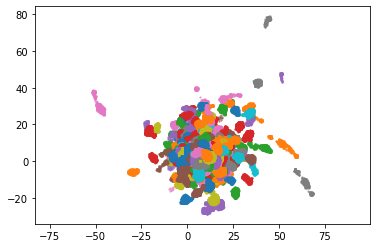

In [47]:
# Visualize embedding
vame.visualization(config, label=None)

In [37]:
# Create motif videos
vame.motif_videos(config, videoType='.avi')

  0%|                                                                                                                                                                                                              | 0/51 [00:00<?, ?it/s]

Cluster size is: 15 
Motif videos getting created for 04_02_2021_10_34_47_miniscope_DG_210202_a_succ ...
Cluster: 0


 23%|█████████████████████████████████████████████                                                                                                                                                         | 5/22 [00:00<00:00, 43.98it/s]

Cluster: 1


  7%|█████████████▏                                                                                                                                                                                        | 4/60 [00:00<00:01, 33.70it/s]

Cluster: 2


 22%|███████████████████████████████████████████                                                                                                                                                           | 5/23 [00:00<00:00, 42.49it/s]

Cluster: 3


 24%|███████████████████████████████████████████████▏                                                                                                                                                      | 5/21 [00:00<00:00, 41.71it/s]

Cluster: 4


  0%|                                                                                                                                                                                                              | 0/32 [00:00<?, ?it/s]

Cluster: 5
Cluster: 6


  2%|████▋                                                                                                                                                                                                | 4/166 [00:00<00:05, 28.85it/s]

Cluster: 7


 15%|█████████████████████████████▋                                                                                                                                                                        | 3/20 [00:00<00:00, 28.21it/s]

Cluster: 8


 14%|███████████████████████████▎                                                                                                                                                                          | 4/29 [00:00<00:00, 36.46it/s]

Cluster: 9


 13%|█████████████████████████▌                                                                                                                                                                            | 4/31 [00:00<00:00, 36.13it/s]

Cluster: 10


  7%|█████████████▍                                                                                                                                                                                        | 4/59 [00:00<00:01, 35.81it/s]

Cluster: 11


 17%|█████████████████████████████████                                                                                                                                                                     | 4/24 [00:00<00:00, 37.48it/s]

Cluster: 12


 18%|████████████████████████████████████                                                                                                                                                                  | 4/22 [00:00<00:00, 31.58it/s]

Cluster: 13


 31%|█████████████████████████████████████████████████████████████▉                                                                                                                                        | 5/16 [00:00<00:00, 40.76it/s]

Cluster: 14


  0%|                                                                                                                                                                                                              | 0/14 [00:00<?, ?it/s]

Motif videos getting created for 04_02_2021_10_30_38_miniscope_DG_210202_a_succ ...
Cluster: 0


 17%|██████████████████████████████████▍                                                                                                                                                                   | 4/23 [00:00<00:00, 36.80it/s]

Cluster: 1


 30%|███████████████████████████████████████████████████████████▍                                                                                                                                          | 3/10 [00:00<00:00, 24.85it/s]

Cluster: 2
Cluster: 3


 40%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 4/10 [00:00<00:00, 34.88it/s]

Cluster: 4


  1%|██▉                                                                                                                                                                                                  | 2/137 [00:00<00:06, 19.31it/s]

Cluster: 5


 11%|████████████████████▊                                                                                                                                                                                 | 2/19 [00:00<00:00, 19.28it/s]

Cluster: 6


  2%|███▌                                                                                                                                                                                                 | 3/167 [00:00<00:05, 27.35it/s]

Cluster: 7


  4%|███████▌                                                                                                                                                                                             | 4/104 [00:00<00:02, 36.13it/s]

Cluster: 8


  7%|██████████████▏                                                                                                                                                                                       | 3/42 [00:00<00:01, 28.65it/s]

Cluster: 9


 21%|█████████████████████████████████████████▋                                                                                                                                                            | 4/19 [00:00<00:00, 36.12it/s]

Cluster: 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 34.51it/s]
0it [00:00, ?it/s]
 12%|██████████████████████▊                                                                                                                                                                               | 3/26 [00:00<00:01, 22.62it/s]

Cluster: 11
Cluster: 12


  6%|████████████▍                                                                                                                                                                                         | 3/48 [00:00<00:01, 27.60it/s]

Cluster: 13


 36%|████████████████████████████████████████████████████████████████████████                                                                                                                              | 4/11 [00:00<00:00, 37.14it/s]

Cluster: 14


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 29.97it/s]
0it [00:00, ?it/s]
  3%|██████▏                                                                                                                                                                                               | 1/32 [00:00<00:03,  8.10it/s]

Motif videos getting created for 04_02_2021_10_25_41_miniscope_DG_210202_a_succ ...
Cluster: 0
Cluster: 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 30.23it/s]
0it [00:00, ?it/s]
 14%|███████████████████████████▎                                                                                                                                                                          | 4/29 [00:00<00:00, 38.94it/s]

Cluster: 2
Cluster: 3


 17%|█████████████████████████████████                                                                                                                                                                     | 4/24 [00:00<00:00, 34.28it/s]

Cluster: 4


  9%|█████████████████▌                                                                                                                                                                                    | 4/45 [00:00<00:01, 34.88it/s]

Cluster: 5


 22%|███████████████████████████████████████████                                                                                                                                                           | 5/23 [00:00<00:00, 41.73it/s]

Cluster: 6


  0%|                                                                                                                                                                                                              | 0/14 [00:00<?, ?it/s]

Cluster: 7
Cluster: 8


 36%|████████████████████████████████████████████████████████████████████████                                                                                                                              | 4/11 [00:00<00:00, 36.13it/s]

Cluster: 9


 18%|████████████████████████████████████                                                                                                                                                                  | 4/22 [00:00<00:00, 33.98it/s]

Cluster: 10


  0%|                                                                                                                                                                                                               | 0/7 [00:00<?, ?it/s]

Cluster: 11
Cluster: 12


  9%|██████████████████                                                                                                                                                                                    | 3/33 [00:00<00:01, 29.49it/s]

Cluster: 13


 25%|█████████████████████████████████████████████████▌                                                                                                                                                    | 5/20 [00:00<00:00, 38.56it/s]

Cluster: 14


  0%|                                                                                                                                                                                                              | 0/14 [00:00<?, ?it/s]

Motif videos getting created for 04_02_2021_10_21_22_miniscope_DG_210202_a_succ ...
Cluster: 0


 12%|████████████████████████▊                                                                                                                                                                             | 2/16 [00:00<00:00, 16.57it/s]

Cluster: 1


 33%|██████████████████████████████████████████████████████████████████▎                                                                                                                                    | 3/9 [00:00<00:00, 26.06it/s]

Cluster: 2


 13%|█████████████████████████▊                                                                                                                                                                            | 3/23 [00:00<00:00, 25.93it/s]

Cluster: 3


  0%|                                                                                                                                                                                                             | 0/111 [00:00<?, ?it/s]

Cluster: 4
Cluster: 5


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 91/111 [00:02<00:00, 34.64it/s]


KeyboardInterrupt: 

In [49]:
# Community analysis

vame.community(config, show_umap=False, cut_tree=None)

IndexError: index 27 is out of bounds for axis 0 with size 27

In [16]:
# Quantify behavior

# vame.behavior_quantification(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=30)

C:\Users\setup\.conda\envs\vame\lib\site-packages\vame-0.1-py3.7.egg\vame\analysis\behavior_structure.py:56: RuntimeWarning: invalid value encountered in true_divide
